# World Data League 2021
## Notebook Template

This notebook is one of the mandatory deliverables when you submit your solution (alongside the video pitch). Its structure follows the WDL evaluation criteria and it has dedicated cells where you can add descriptions. Make sure your code is readable as it will be the only technical support the jury will have to evaluate your work.

The notebook must:

*   💻 have all the code that you want the jury to evaluate
*   🧱 follow the predefined structure
*   📄 have markdown descriptions where you find necessary
*   👀 be saved with all the output that you want the jury to see
*   🏃‍♂️ be runnable


## Authors
Write the name (first and last) of the people on your team that are responsible for developing this solution.

 + Maria Javierre Moragues
 + Jorge Gómez Berenguer
 + Jorge Gómez-Lechón Verdia
 + Raquel García Meneses

## External links and resources
Paste here all the links to external resources that are necessary to understand and run your code. Add descriptions to make it clear how to use them during evaluation.

## Introduction
The challenge for the final is **"Improving the quality of life by reducing city
noise levels"**, in particular for a neighbourhood of Torino (Italy): San
Salvario. The goal was to help cities by predicting future noise levels and, if feasible, explain complaint trends that can be attributed to leisure noise levels. The objectives can be summed up as follows:
+ 1. Build a model that can predict noise in recreational nightlife, especially peaks of noise outside what is considered normal (outliers).
+ 2. Study the feasibility of predicting the complaints related to noise levels.
+ 3. Suggesting a framework of how these models can be integrated into the city’s decision making process and allocation of resources.

As, always, as a first step we have performed some preprocessing of the data. We have created a dataframe that contains variables that we have deemed important in order to train a model and we have discarded some other, as it is explained in the section **"Preprocessing"**.  We have included some new variables to the ones already given.

After, for the **first objective**, several models were built in order to be able to predict noise levels , in particular those corresponding to the nightlife of the neighbourhood. Furthermore, as outliers are important since they mean a really high noise level, and this in turn means risk of complaints, we have performed Isolation Forest in order to ,first, detect outliers and then a Random Forest model so classify new data as outlier / non-outlier. This has been done to identify days/months that are susceptible of being days where complaints are filled.

For the **second objective**, we have done a clustering process so as to detect patterns that are related to the complaints, that is to say that we meant to detect patterns that indicate a  possible filing of a complaint.

Lastly, we have proposed a solution to implement the insights gained from objectives 1 and 2 into a framework that can be used by the city to take actions to reduce noise levels.

## Development
Start coding here! 👩‍💻

Don't hesitate to create markdown cells to include descriptions of your work where you see fit, as well as commenting your code.

We know that you know exactly where to start when it comes to crunching data and building models, but don't forget that WDL is all about social impact...so take that into consideration as well.

In [ ]:
#Necessary for geo-data
!pip install geopandas

     |████████████████████████████████| 1.0MB 4.2MB/s 
     |████████████████████████████████| 6.6MB 8.4MB/s 
     |████████████████████████████████| 15.4MB 194kB/s 


In [ ]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from shapely import wkt
import numpy as np
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Reading Files**

In [ ]:
noise2021 = pd.read_csv("/content/drive/MyDrive/Finals/Data/noise_data/noise_data/san_salvario_2021.csv", encoding = 'utf8', engine = 'python', skiprows=8, delimiter=';')

In [ ]:
noise2020 = pd.read_csv("/content/drive/MyDrive/Finals/Data/noise_data/noise_data/san_salvario_2020.csv", encoding = 'utf8', engine = 'python', skiprows=8, delimiter=';')

In [ ]:
noise2019 = pd.read_csv("/content/drive/MyDrive/Finals/Data/noise_data/noise_data/san_salvario_2019.csv", encoding = 'utf8', engine = 'python', skiprows=8, delimiter=';')

In [ ]:
noise2018 = pd.read_csv("/content/drive/MyDrive/Finals/Data/noise_data/noise_data/san_salvario_2018.csv", encoding = 'utf8', engine = 'python', skiprows=8, delimiter=';')

In [ ]:
noise2017 = pd.read_csv("/content/drive/MyDrive/Finals/Data/noise_data/noise_data/san_salvario_2017.csv", encoding = 'utf8', engine = 'python', skiprows=8, delimiter=';')

In [ ]:
noise2016 = pd.read_csv("/content/drive/MyDrive/Finals/Data/noise_data/noise_data/san_salvario_2016.csv", encoding = 'utf8', engine = 'python', skiprows=8, delimiter=';')

In [ ]:
noiseTTO1_5 = pd.read_csv("/content/drive/MyDrive/Finals/Data/noise_data/noise_data/TTO-001_5minute.csv", encoding = 'utf8', engine = 'python', delimiter=',')

In [ ]:
noiseTTO1_h = pd.read_csv("/content/drive/MyDrive/Finals/Data/noise_data/noise_data/TTO-001_hourly.csv", encoding = 'utf8', engine = 'python', delimiter=',')

In [ ]:
noiseTTO2_5 = pd.read_csv("/content/drive/MyDrive/Finals/Data/noise_data/noise_data/TTO-002_5minute.csv", encoding = 'utf8', engine = 'python', delimiter=',')

In [ ]:
noiseTTO2_h = pd.read_csv("/content/drive/MyDrive/Finals/Data/noise_data/noise_data/TTO-002_hourly.csv", encoding = 'utf8', engine = 'python', delimiter=',')

In [ ]:
rain = pd.read_csv("/content/drive/MyDrive/Finals/Data/weather/weather/rain.csv", encoding = 'utf8', engine = 'python', skiprows=4, delimiter=';')

In [ ]:
snow_temp = pd.read_csv("/content/drive/MyDrive/Finals/Data/weather/weather/snow_temp.csv", encoding = 'utf8', engine = 'python', skiprows=5, delimiter=';')

In [ ]:
sensor_coor = pd.read_csv("/content/drive/MyDrive/Finals/Data/noise_sensor_list.csv", delimiter=';')

In [ ]:
festivos = pd.read_excel("/content/drive/MyDrive/Finals/Festivos nacionales.xlsx")

In [ ]:
covid = pd.read_excel("/content/drive/MyDrive/Finals/Restricciones COVID.xlsx")

In [ ]:
SIM_1 = pd.read_csv("/content/drive/MyDrive/Finals/Data/sim_count/sim_count/SIM_count_04_100618.csv", delimiter=';')

In [ ]:
SIM_2 = pd.read_csv("/content/drive/MyDrive/Finals/Data/sim_count/sim_count/SIM_count_09_151017.csv", delimiter=';')

In [ ]:
SIM_3 = pd.read_csv("/content/drive/MyDrive/Finals/Data/sim_count/sim_count/SIM_count_15_210118.csv", delimiter=';')

In [ ]:
SIM_4 = pd.read_csv("/content/drive/MyDrive/Finals/Data/sim_count/sim_count/SIM_count_18_241217.csv", delimiter=';')

In [ ]:
SIM_5 = pd.read_csv("/content/drive/MyDrive/Finals/Data/sim_count/sim_count/SIM_count_19_250318.csv", delimiter=';')

In [ ]:
path = '/content/drive/MyDrive/Finals/Data/sim_count/sim_count/SIM Count - 20210430 - 20210615' # use your path
all_files = glob.glob(path + "/*.csv")

In [ ]:
path = '/content/drive/MyDrive/Finals/Data/sim_count/sim_count/SIM Count - 20200430 - 20200615' # use your path
all_files = glob.glob(path + "/*.csv")

In [ ]:
business = pd.read_csv("/content/drive/MyDrive/Finals/Data/Harvesine_sensor_businesses.csv")
business['sensor'] = ['C1','C2','C3','C4','C5','OTT1','OTT2']

In [ ]:
censo = pd.read_csv('/content/drive/MyDrive/Finals/Data/Harvesine_sensor_census.csv')
censo['sensor'] = ['C1','C2','C3','C4','C5','OTT1','OTT2']

## **Data Processing**

### Processing the businesses database

Processing and cleaning the businesses database. Focus on converting WKT CRS formats into cartesian to allow for geo-location capabilities as well as distance calculations.


The 'businesses' database has proven a practical set of features for the first and second goals. However, the density of companies (and types) is not aligned with predicting noise levels if not correctly scaled. The scale proposed is adjusting to distance, making location a requirement.

The location data is given in WTK CRS format. To convert the data to cartesian, the team has leveraged the crs code "3003" to map to crs "4326". 
The output of the processing is the businesses database with the corrected location data.

In [ ]:
#Reading businesses data
path = '/content/drive/MyDrive/WDL/TorinoPOI.csv'
fs = pd.read_csv(path, ';')
fs

,WKT,ADDRESS,OPEN YEAR,OPEN MONTH,TYPE,Description,Merchandise Type
0,POINT (1396322.217 4990301.69),VIA CLAUDIO LUIGI BERTHOLLET 24,1977,1,EXTRALIMENTARI,PICCOLE STRUTTURE,Extralimentari
1,POINT (1396322.217 4990301.69),VIA CLAUDIO LUIGI BERTHOLLET 24,1985,6,ALIMENTARI,PICCOLE STRUTTURE,Panificio
2,POINT (1396303.762 4990325.001),VIA CLAUDIO LUIGI BERTHOLLET 25/F,2017,9,ALTRO,DIA di somministrazione,Nessuna
3,POINT (1396434.395 4990540.6),CORSO VITTORIO EMANUELE II 21/A,2013,10,ALTRO,DIA di somministrazione,Nessuna
4,POINT (1396434.395 4990540.6),CORSO VITTORIO EMANUELE II 21/A,2009,2,ALTRO,DIA di somministrazione,Nessuna
...,...,...,...,...,...,...,...
823,POINT (1396561.148 4990473.514),CORSO VITTORIO EMANUELE II 9,2016,9,ALIMENTARI,PICCOLE STRUTTURE,217
824,POINT (1396561.148 4990473.514),CORSO VITTORIO EMANUELE II 9,2016,7,EXTRALIMENTARI,PICCOLE STRUTTURE,208
825,POINT (1396561.148 4990473.514),CORSO VITTORIO EMANUELE II 9,1993,4,EXTRALIMENTARI,PICCOLE STRUTTURE,Extralimentari
826,POINT (1396319.554 4990303.098),VIA CLAUDIO LUIGI BERTHOLLET 24/C,2001,12,EXTRALIMENTARI,PICCOLE STRUTTURE,Abbigliamento


In [ ]:
#Transforming locations from WKT to standard coordinates
from shapely import wkt
import geopandas as gpd
fs['WKT'] = gpd.GeoSeries.from_wkt(fs['WKT'])
fs
gdf = gpd.GeoDataFrame(fs, geometry = 'WKT', crs = 3003 )
gdf = gdf.to_crs(4326)

,WKT,ADDRESS,OPEN YEAR,OPEN MONTH,TYPE,Description,Merchandise Type
0,POINT (1396322.217 4990301.690),VIA CLAUDIO LUIGI BERTHOLLET 24,1977,1,EXTRALIMENTARI,PICCOLE STRUTTURE,Extralimentari
1,POINT (1396322.217 4990301.690),VIA CLAUDIO LUIGI BERTHOLLET 24,1985,6,ALIMENTARI,PICCOLE STRUTTURE,Panificio
2,POINT (1396303.762 4990325.001),VIA CLAUDIO LUIGI BERTHOLLET 25/F,2017,9,ALTRO,DIA di somministrazione,Nessuna
3,POINT (1396434.395 4990540.600),CORSO VITTORIO EMANUELE II 21/A,2013,10,ALTRO,DIA di somministrazione,Nessuna
4,POINT (1396434.395 4990540.600),CORSO VITTORIO EMANUELE II 21/A,2009,2,ALTRO,DIA di somministrazione,Nessuna
...,...,...,...,...,...,...,...
823,POINT (1396561.148 4990473.514),CORSO VITTORIO EMANUELE II 9,2016,9,ALIMENTARI,PICCOLE STRUTTURE,217
824,POINT (1396561.148 4990473.514),CORSO VITTORIO EMANUELE II 9,2016,7,EXTRALIMENTARI,PICCOLE STRUTTURE,208
825,POINT (1396561.148 4990473.514),CORSO VITTORIO EMANUELE II 9,1993,4,EXTRALIMENTARI,PICCOLE STRUTTURE,Extralimentari
826,POINT (1396319.554 4990303.098),VIA CLAUDIO LUIGI BERTHOLLET 24/C,2001,12,EXTRALIMENTARI,PICCOLE STRUTTURE,Abbigliamento


In [ ]:
#Parsing coordinates
gdf['longitude'] = gdf.WKT.x
gdf['latitude'] = gdf.WKT.y

In [ ]:
#Saving the business database with coordinates
gdf.to_csv('/content/drive/MyDrive/Finals/Data/businesses_coordinates_JGL.csv')

### Processing the census database

The database provides population and demographic information from a geographic block perspective. The neighborhood assessed contains several of these granular blocks. 

The data processing is concentrated in correctly reading the 'shp' file and converting locations from WKT Crs format to cartesian.

Centroid points are calculated to facilitate distance calculations. These will serve as useful for converting the database into a ready-to-use feature set.


The geopandas package has been leveraged to process the census data.

In [ ]:
#Reading the shapefile with geopandas
import geopandas as gpd
shapefile = gpd.read_file("/content/drive/MyDrive/Finals/Data/census_data/census_data/sezioni_censimento_geo_CAP.shx")
print(shapefile)

    SEZCENS  ...                                           geometry
0     326.0  ...  POLYGON ((1396082.920 4990558.645, 1396116.595...
1     328.0  ...  POLYGON ((1396230.062 4990481.191, 1396261.287...
2     336.0  ...  POLYGON ((1396319.969 4990427.448, 1396404.856...
3     338.0  ...  POLYGON ((1396509.732 4990327.177, 1396638.065...
4     343.0  ...  POLYGON ((1396272.570 4990334.580, 1396356.838...
5     346.0  ...  POLYGON ((1396110.590 4990337.667, 1396159.829...
6     356.0  ...  POLYGON ((1396289.940 4990160.821, 1396390.936...
7     322.0  ...  POLYGON ((1396389.050 4990563.934, 1396399.090...
8     323.0  ...  POLYGON ((1396486.289 4990539.884, 1396593.428...
9     324.0  ...  POLYGON ((1396593.428 4990483.221, 1396714.465...
10    325.0  ...  POLYGON ((1396064.116 4990652.553, 1396116.595...
11    327.0  ...  POLYGON ((1396145.295 4990525.790, 1396175.238...
12    352.0  ...  POLYGON ((1395953.380 4990145.294, 1395989.994...
13    359.0  ...  POLYGON ((1396134.405 4990061.

In [ ]:
shapefile

,SEZCENS,NCIRCO,DENCIM,LOCALITA,DISTRASS,PARROCCH,TIPOSEZ,ASL,ZONASTAT,NRESID,NFAMIGL,NMASCHI,NFEMM,NSTRAN,AN_0_14,AN_15_64,OLT_65_A,SUPERF,geometry
0,326.0,8.0,Monumentale,TORINO,08A,Santi Pietro e Paolo Apostoli,0.0,ASL TO1,09,181.0,94.0,95.0,86.0,42.0,23.0,121.0,37.0,5593.24,"POLYGON ((1396082.920 4990558.645, 1396116.595..."
1,328.0,8.0,Monumentale,TORINO,08A,Santi Pietro e Paolo Apostoli,0.0,ASL TO1,09,252.0,144.0,123.0,129.0,110.0,29.0,167.0,56.0,8403.30,"POLYGON ((1396230.062 4990481.191, 1396261.287..."
2,336.0,8.0,Monumentale,TORINO,08A,Santi Pietro e Paolo Apostoli,0.0,ASL TO1,09,229.0,126.0,112.0,117.0,26.0,26.0,149.0,54.0,9976.84,"POLYGON ((1396319.969 4990427.448, 1396404.856..."
3,338.0,8.0,Monumentale,TORINO,08A,Santi Pietro e Paolo Apostoli,0.0,ASL TO1,09,294.0,160.0,141.0,153.0,27.0,45.0,192.0,57.0,15116.92,"POLYGON ((1396509.732 4990327.177, 1396638.065..."
4,343.0,8.0,Monumentale,TORINO,08A,Santi Pietro e Paolo Apostoli,0.0,ASL TO1,09,253.0,150.0,121.0,132.0,72.0,29.0,168.0,56.0,6922.80,"POLYGON ((1396272.570 4990334.580, 1396356.838..."
5,346.0,8.0,Monumentale,TORINO,08A,Santi Pietro e Paolo Apostoli,0.0,ASL TO1,09,172.0,86.0,90.0,82.0,21.0,18.0,123.0,31.0,4052.06,"POLYGON ((1396110.590 4990337.667, 1396159.829..."
6,356.0,8.0,Monumentale,TORINO,08A,Santi Pietro e Paolo Apostoli,0.0,ASL TO1,09,339.0,196.0,163.0,176.0,70.0,31.0,229.0,79.0,9174.29,"POLYGON ((1396289.940 4990160.821, 1396390.936..."
7,322.0,8.0,Monumentale,TORINO,08A,Santi Pietro e Paolo Apostoli,0.0,ASL TO1,09,113.0,65.0,55.0,58.0,15.0,15.0,77.0,21.0,9446.12,"POLYGON ((1396389.050 4990563.934, 1396399.090..."
8,323.0,8.0,Monumentale,TORINO,08A,Santi Pietro e Paolo Apostoli,0.0,ASL TO1,09,84.0,50.0,43.0,41.0,8.0,10.0,53.0,21.0,11706.68,"POLYGON ((1396486.289 4990539.884, 1396593.428..."
9,324.0,8.0,Monumentale,TORINO,08A,Santi Pietro e Paolo Apostoli,0.0,ASL TO1,09,177.0,107.0,82.0,95.0,15.0,13.0,91.0,73.0,14107.72,"POLYGON ((1396593.428 4990483.221, 1396714.465..."


In [ ]:
#Reading the second shapefile with geopandas
import geopandas as gpd
shapefile2 = gpd.read_file("/content/drive/MyDrive/Finals/Data/census_data/census_data/Torino_ACE81_3003.shp")
shapefile2

,COD_REG,COD_ISTAT,PRO_COM,SEZ2011,SEZ,COD_STAGNO,COD_FIUME,COD_LAGO,COD_LAGUNA,COD_VAL_P,COD_ZONA_C,COD_IS_AMM,COD_IS_LAC,COD_IS_MAR,COD_AREA_S,COD_MONT_D,LOC2011,COD_LOC,TIPO_LOC,COM_ASC,COD_ASC,ACE,Shape_Leng,Shape_Area,geometry
0,1.0,1001272.0,1272.0,12720003790,3790.0,0.0,20019.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127210001.0,10001.0,1.0,1272008.0,8,81,601.187894,17122.466063,"POLYGON ((1397684.098 4990958.745, 1397676.338..."
1,1.0,1001272.0,1272.0,12720000331,331.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127210001.0,10001.0,1.0,1272008.0,8,81,451.345452,11664.272996,"POLYGON ((1396544.848 4990399.869, 1396674.057..."
2,1.0,1001272.0,1272.0,12720003788,3788.0,0.0,20019.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127210001.0,10001.0,1.0,1272008.0,8,81,1192.624459,27377.568756,"POLYGON ((1397381.695 4990677.529, 1397368.147..."
3,1.0,1001272.0,1272.0,12720002472,2472.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127210001.0,10001.0,1.0,1272008.0,8,81,2057.740794,43228.550156,"POLYGON ((1396824.866 4989610.669, 1396722.418..."
4,1.0,1001272.0,1272.0,12720000321,321.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127210001.0,10001.0,1.0,1272008.0,8,81,400.517124,10047.172479,"POLYGON ((1396298.448 4990620.419, 1396306.367..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1.0,1001272.0,1272.0,12720000330,330.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127210001.0,10001.0,1.0,1272008.0,8,81,398.382901,9530.363286,"POLYGON ((1396438.876 4990455.956, 1396544.848..."
58,1.0,1001272.0,1272.0,12720000336,336.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127210001.0,10001.0,1.0,1272008.0,8,81,399.929223,9976.741723,"POLYGON ((1396317.291 4990429.697, 1396402.180..."
59,1.0,1001272.0,1272.0,12720000341,341.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127210001.0,10001.0,1.0,1272008.0,8,81,260.951988,4101.087636,"POLYGON ((1396125.185 4990406.156, 1396128.922..."
60,1.0,1001272.0,1272.0,12720000352,352.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127210001.0,10001.0,1.0,1272008.0,8,81,564.433979,17915.769888,"POLYGON ((1395950.695 4990147.549, 1395987.310..."


In [ ]:
#Converting the geometry of the first shapefile to cartesian through CRS 4326
shapefile = shapefile.to_crs(4326)
shapefile

,SEZCENS,NCIRCO,DENCIM,LOCALITA,DISTRASS,PARROCCH,TIPOSEZ,ASL,ZONASTAT,NRESID,NFAMIGL,NMASCHI,NFEMM,NSTRAN,AN_0_14,AN_15_64,OLT_65_A,SUPERF,geometry
0,326.0,8.0,Monumentale,TORINO,08A,Santi Pietro e Paolo Apostoli,0.0,ASL TO1,09,181.0,94.0,95.0,86.0,42.0,23.0,121.0,37.0,5593.24,"POLYGON ((7.67979 45.06068, 7.68021 45.06128, ..."
1,328.0,8.0,Monumentale,TORINO,08A,Santi Pietro e Paolo Apostoli,0.0,ASL TO1,09,252.0,144.0,123.0,129.0,110.0,29.0,167.0,56.0,8403.30,"POLYGON ((7.68168 45.06000, 7.68206 45.06055, ..."
2,336.0,8.0,Monumentale,TORINO,08A,Santi Pietro e Paolo Apostoli,0.0,ASL TO1,09,229.0,126.0,112.0,117.0,26.0,26.0,149.0,54.0,9976.84,"POLYGON ((7.68283 45.05953, 7.68392 45.05914, ..."
3,338.0,8.0,Monumentale,TORINO,08A,Santi Pietro e Paolo Apostoli,0.0,ASL TO1,09,294.0,160.0,141.0,153.0,27.0,45.0,192.0,57.0,15116.92,"POLYGON ((7.68526 45.05866, 7.68690 45.05807, ..."
4,343.0,8.0,Monumentale,TORINO,08A,Santi Pietro e Paolo Apostoli,0.0,ASL TO1,09,253.0,150.0,121.0,132.0,72.0,29.0,168.0,56.0,6922.80,"POLYGON ((7.68225 45.05869, 7.68333 45.05830, ..."
5,346.0,8.0,Monumentale,TORINO,08A,Santi Pietro e Paolo Apostoli,0.0,ASL TO1,09,172.0,86.0,90.0,82.0,21.0,18.0,123.0,31.0,4052.06,"POLYGON ((7.68019 45.05870, 7.68082 45.05847, ..."
6,356.0,8.0,Monumentale,TORINO,08A,Santi Pietro e Paolo Apostoli,0.0,ASL TO1,09,339.0,196.0,163.0,176.0,70.0,31.0,229.0,79.0,9174.29,"POLYGON ((7.68250 45.05713, 7.68380 45.05667, ..."
7,322.0,8.0,Monumentale,TORINO,08A,Santi Pietro e Paolo Apostoli,0.0,ASL TO1,09,113.0,65.0,55.0,58.0,15.0,15.0,77.0,21.0,9446.12,"POLYGON ((7.68368 45.06077, 7.68380 45.06097, ..."
8,323.0,8.0,Monumentale,TORINO,08A,Santi Pietro e Paolo Apostoli,0.0,ASL TO1,09,84.0,50.0,43.0,41.0,8.0,10.0,53.0,21.0,11706.68,"POLYGON ((7.68492 45.06057, 7.68629 45.06008, ..."
9,324.0,8.0,Monumentale,TORINO,08A,Santi Pietro e Paolo Apostoli,0.0,ASL TO1,09,177.0,107.0,82.0,95.0,15.0,13.0,91.0,73.0,14107.72,"POLYGON ((7.68629 45.06008, 7.68784 45.05952, ..."


In [ ]:
#Calculate the centroid point to operationalize calculations based on census data
shapefile['centroid'] = shapefile['geometry'].centroid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [ ]:
#Extract coordinate values from the centroid point in the geometry
shapefile['longitude'] = shapefile.centroid.x
shapefile['latitude'] = shapefile.centroid.y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Save final database
shapefile.to_csv('/content/drive/MyDrive/Finals/Data/census_JGL.csv')

### Identifying complaints locations based on GOOGLE API

Complaints data was provided with a conventional address. The Google API geocoding capabilities were leveraged for translating addressess into cartesian coordinates. The solution involved data processing for minimizing the number of requests. A set of iterables were developed to automate the execution. The procedure was employed for years: 2016, 2017, 2018 and 2019.

The resulting databases were aggregated into a comprehensive complaints databases, tailored to the geographic scope.

This process resulted essential for modeling the complaints behaviour, as a consequence of noise levels and population demographics.

#### **2016:** Identifying complaints coordiantes in 2016 via Google API

In [ ]:
##Reading the 2016 January to June complaints csv database
complaints_2016_JJ = pd.read_csv('/content/drive/MyDrive/Finals/Data/police_complaints/police_complaints/OpenDataContact_Gennaio_Giugno_2016.csv', sep =',')
complaints_2016_JJ

,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora
0,Allarme Sociale,Altro,6.0,AEROPORTO/(STRADA DELL') ...,NaN,02/01/2016,NaN
1,Allarme Sociale,Altro,8.0,MADAMA CRISTINA/(PIAZZA) ...,NaN,13/01/2016,NaN
2,Allarme Sociale,Altro,2.0,RENI/GUIDO (VIA) ...,NaN,15/01/2016,NaN
3,Allarme Sociale,Altro,2.0,TRIPOLI/(VIA) ...,NaN,27/01/2016,NaN
4,Allarme Sociale,Altro,7.0,S. GIULIA/(PIAZZA) ...,NaN,03/02/2016,18.45
...,...,...,...,...,...,...,...
1118,Qualit� Urbana,Veicoli abbandonati,1.0,SACCHI/PAOLO (VIA) ...,NaN,22/01/2016,9.47
1119,Qualit� Urbana,Veicoli abbandonati,4.0,MONTANO/MASSIMO (VIA) ...,NaN,25/01/2016,12.57
1120,Qualit� Urbana,Veicoli abbandonati,1.0,REGINA MARGHERITA/(CORSO) ...,Area Verde,04/03/2016,11.36
1121,Qualit� Urbana,Veicoli abbandonati,4.0,SACCARELLI/GASPARE (VIA) ...,NaN,20/05/2016,NaN


In [ ]:
#Filter data to obtain district 8, and drop values to obtain the distinc addresses
complaints_2016_JJ_distinct = complaints_2016_JJ[complaints_2016_JJ['Circoscrizione'] == 8.0]['Localita'].drop_duplicates()
complaints_2016_JJ_distinct.count()

51

In [ ]:
#Iterable for automatically geocoding addresses given the distinct values obtained previously
import requests
complaints_coordinates_2016_JJ= pd.DataFrame()
for i in complaints_2016_JJ_distinct:
  print(i)
  response = requests.get('https://maps.googleapis.com/maps/api/geocode/json?address=' + i +'+Torino&key=PRIVATEAPIKEY')
  data = response.json()
  for p in data['results']:
    for a in p:
      if a == 'geometry':
        for b in p[a]:
          if b == 'location':
            for c in p[a][b]:
              if c == 'lat':
                lat = p[a][b][c]
              if c == 'lng':
                lng = p[a][b][c]
                print(lat, lng)

  complaints_coordinates_2016_JJ.loc[i, 'Area'] = i
  complaints_coordinates_2016_JJ.loc[i, 'lat'] = lat
  complaints_coordinates_2016_JJ.loc[i, 'lng'] = lng


complaints_coordinates_2016_JJ

MADAMA CRISTINA/(PIAZZA)                                              
45.0589033 7.6842066
S. ANSELMO/(VIA)                                                      
45.05942 7.681091
NIZZA/(VIA)                                                           
40.759987 -73.9912338
LUGARO/ERNESTO (VIA)                                                  
45.04941 7.671124799999999
BRAMANTE/(CORSO)                                                      
45.04531170000001 7.6651526
ORMEA/(VIA)                                                           
44.1482868 7.910491499999999
RIBET/GIOVANNI (VIA)                                                  
45.05488219999999 7.6757066
MARTIRI DELLA LIBERTA'/(VIA)                                          
45.0621024 7.701537000000001
TADINI/(STRADA DEI)                                                   
BIDONE/GIORGIO (VIA)                                                  
45.0524963 7.6792224
SEI VILLE/(STRADA ALLE)                                            

,Area,lat,lng
MADAMA CRISTINA/(PIAZZA),MADAMA CRISTINA/(PIAZZA) ...,45.058903,7.684207
S. ANSELMO/(VIA),S. ANSELMO/(VIA) ...,45.059420,7.681091
NIZZA/(VIA),NIZZA/(VIA) ...,40.759987,-73.991234
LUGARO/ERNESTO (VIA),LUGARO/ERNESTO (VIA) ...,45.049410,7.671125
BRAMANTE/(CORSO),BRAMANTE/(CORSO) ...,45.045312,7.665153
ORMEA/(VIA),ORMEA/(VIA) ...,44.148287,7.910491
RIBET/GIOVANNI (VIA),RIBET/GIOVANNI (VIA) ...,45.054882,7.675707
MARTIRI DELLA LIBERTA'/(VIA),MARTIRI DELLA LIBERTA'/(VIA) ...,45.062102,7.701537
TADINI/(STRADA DEI),TADINI/(STRADA DEI) ...,45.062102,7.701537
BIDONE/GIORGIO (VIA),BIDONE/GIORGIO (VIA) ...,45.052496,7.679222


In [ ]:
#Join coordinates to the original complaints database
complaints_2016_JJ = complaints_2016_JJ.merge(complaints_coordinates_2016_JJ, how= 'left', left_on ='Localita', right_on = 'Area')
complaints_2016_JJ

,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora,Area,lat,lng
0,Allarme Sociale,Altro,6.0,AEROPORTO/(STRADA DELL') ...,NaN,02/01/2016,NaN,NaN,NaN,NaN
1,Allarme Sociale,Altro,8.0,MADAMA CRISTINA/(PIAZZA) ...,NaN,13/01/2016,NaN,MADAMA CRISTINA/(PIAZZA) ...,45.058903,7.684207
2,Allarme Sociale,Altro,2.0,RENI/GUIDO (VIA) ...,NaN,15/01/2016,NaN,NaN,NaN,NaN
3,Allarme Sociale,Altro,2.0,TRIPOLI/(VIA) ...,NaN,27/01/2016,NaN,NaN,NaN,NaN
4,Allarme Sociale,Altro,7.0,S. GIULIA/(PIAZZA) ...,NaN,03/02/2016,18.45,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1118,Qualit� Urbana,Veicoli abbandonati,1.0,SACCHI/PAOLO (VIA) ...,NaN,22/01/2016,9.47,NaN,NaN,NaN
1119,Qualit� Urbana,Veicoli abbandonati,4.0,MONTANO/MASSIMO (VIA) ...,NaN,25/01/2016,12.57,NaN,NaN,NaN
1120,Qualit� Urbana,Veicoli abbandonati,1.0,REGINA MARGHERITA/(CORSO) ...,Area Verde,04/03/2016,11.36,NaN,NaN,NaN
1121,Qualit� Urbana,Veicoli abbandonati,4.0,SACCARELLI/GASPARE (VIA) ...,NaN,20/05/2016,NaN,NaN,NaN,NaN


In [ ]:
#Filter again to subset the district 8 complaints
complaints_2016_JJ = complaints_2016_JJ[complaints_2016_JJ['Circoscrizione'] == 8.0]

In [ ]:
#Obatin the NaN values in Ora which indicate those cases not measured (the target night hours)
complaints_2016_JJ = complaints_2016_JJ[complaints_2016_JJ['Ora'].isnull()]
complaints_2016_JJ

,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora,Area,lat,lng
1,Allarme Sociale,Altro,8.0,MADAMA CRISTINA/(PIAZZA) ...,NaN,13/01/2016,NaN,MADAMA CRISTINA/(PIAZZA) ...,45.058903,7.684207
13,Allarme Sociale,Altro,8.0,S. ANSELMO/(VIA) ...,NaN,03/03/2016,NaN,S. ANSELMO/(VIA) ...,45.059420,7.681091
35,Allarme Sociale,Altro,8.0,MADAMA CRISTINA/(PIAZZA) ...,NaN,30/05/2016,NaN,MADAMA CRISTINA/(PIAZZA) ...,45.058903,7.684207
63,Convivenza Civile,Altro,8.0,LUGARO/ERNESTO (VIA) ...,NaN,07/01/2016,NaN,LUGARO/ERNESTO (VIA) ...,45.049410,7.671125
90,Convivenza Civile,Altro,8.0,BRAMANTE/(CORSO) ...,NaN,22/01/2016,NaN,BRAMANTE/(CORSO) ...,45.045312,7.665153
...,...,...,...,...,...,...,...,...,...,...
1058,Qualit� Urbana,Decoro e degrado urbano,8.0,LANZA/GIOVANNI (CORSO) ...,NaN,30/05/2016,NaN,LANZA/GIOVANNI (CORSO) ...,45.055759,7.697059
1061,Qualit� Urbana,Decoro e degrado urbano,8.0,GRAN MADRE DI DIO/(PIAZZA) ...,NaN,01/06/2016,NaN,GRAN MADRE DI DIO/(PIAZZA) ...,45.062354,7.699221
1064,Qualit� Urbana,Decoro e degrado urbano,8.0,VITTORIO EMANUELE II/(CORSO) ...,NaN,04/06/2016,NaN,VITTORIO EMANUELE II/(CORSO) ...,45.065600,7.670911
1075,Qualit� Urbana,Decoro e degrado urbano,8.0,NIZZA/(VIA) ...,NaN,10/06/2016,NaN,NIZZA/(VIA) ...,40.759987,-73.991234


In [ ]:
#Save the output database
complaints_2016_JJ.to_csv('/content/drive/MyDrive/Finals/Data/complaints_2016_JJ.csv')

In [ ]:
#Next we proceed in the same fashion for data between July and December

In [ ]:
####Reading the 2016 July to December complaints csv database
complaints_2016_JD = pd.read_csv('/content/drive/MyDrive/Finals/Data/police_complaints/police_complaints/Contact_Luglio_Dicembre_2016.csv', sep =',')
complaints_2016_JD

,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora
0,Allarme Sociale,Altro,1.0,BARBAROUX/GIUSEPPE (VIA) ...,NaN,12/07/2016,NaN
1,Allarme Sociale,Altro,8.0,ORMEA/(VIA) ...,NaN,12/07/2016,NaN
2,Allarme Sociale,Altro,8.0,ORMEA/(VIA) ...,NaN,12/07/2016,NaN
3,Allarme Sociale,Altro,1.0,DE NICOLA/ENRICO (CORSO) ...,Area Verde,15/07/2016,NaN
4,Allarme Sociale,Altro,8.0,ORMEA/(VIA) ...,NaN,18/07/2016,NaN
...,...,...,...,...,...,...,...
1132,Qualit� Urbana,Decoro e degrado urbano,5.0,STRADELLA/(VIA) ...,NaN,26/12/2016,NaN
1133,Qualit� Urbana,Decoro e degrado urbano,7.0,BRESCIA/(CORSO) ...,NaN,27/12/2016,NaN
1134,Qualit� Urbana,Decoro e degrado urbano,2.0,FILADELFIA/(VIA) ...,Area Verde,28/12/2016,NaN
1135,Qualit� Urbana,Decoro e degrado urbano,5.0,CHIESA DELLA SALUTE/(VIA) ...,NaN,29/12/2016,NaN


In [ ]:
#Obtain distinct complaints adresses
complaints_2016_JD_distinct = complaints_2016_JD[complaints_2016_JD['Circoscrizione'] == 8.0]['Localita'].drop_duplicates()
complaints_2016_JD_distinct.count()

56

In [ ]:
#Iterable for automatically geocoding addresses
import requests
complaints_coordinates_2016_JD= pd.DataFrame()
for i in complaints_2016_JD_distinct:
  print(i)
  response = requests.get('https://maps.googleapis.com/maps/api/geocode/json?address=' + i +'+Torino&key=PRIVATEAPIKEY')
  data = response.json()
  for p in data['results']:
    for a in p:
      if a == 'geometry':
        for b in p[a]:
          if b == 'location':
            for c in p[a][b]:
              if c == 'lat':
                lat = p[a][b][c]
              if c == 'lng':
                lng = p[a][b][c]
                print(lat, lng)

  complaints_coordinates_2016_JD.loc[i, 'Area'] = i
  complaints_coordinates_2016_JD.loc[i, 'lat'] = lat
  complaints_coordinates_2016_JD.loc[i, 'lng'] = lng


complaints_coordinates_2016_JD

ORMEA/(VIA)                                                           
44.1482868 7.910491499999999
BERTHOLLET/CLAUDIO LUIGI (VIA)                                        
45.05872340000001 7.6822488
CAMPANA/FEDERICO (VIA)                                                
45.0547857 7.6795614
GALLIARI/BERNARDINO (VIA)                                             
45.0595243 7.682849499999999
CELLINI/BENVENUTO (VIA)                                               
45.0436108 7.6743541
DEL CARRETTO/LUISA (VIA)                                              
45.0623756 7.708757999999999
ASTI/(VIA)                                                            
44.90075119999999 8.2064257
PETRARCA/FRANCESCO (VIA)                                              
45.0489092 7.678133900000001
FOA'/PIO (VIA)                                                        
45.043383 7.6763296
CALVO/EDOARDO (VIA)                                                   
45.0520132 7.6752913
MADAMA CRISTINA/(VIA)              

,Area,lat,lng
ORMEA/(VIA),ORMEA/(VIA) ...,44.148287,7.910491
BERTHOLLET/CLAUDIO LUIGI (VIA),BERTHOLLET/CLAUDIO LUIGI (VIA) ...,45.058723,7.682249
CAMPANA/FEDERICO (VIA),CAMPANA/FEDERICO (VIA) ...,45.054786,7.679561
GALLIARI/BERNARDINO (VIA),GALLIARI/BERNARDINO (VIA) ...,45.059524,7.682849
CELLINI/BENVENUTO (VIA),CELLINI/BENVENUTO (VIA) ...,45.043611,7.674354
DEL CARRETTO/LUISA (VIA),DEL CARRETTO/LUISA (VIA) ...,45.062376,7.708758
ASTI/(VIA),ASTI/(VIA) ...,44.900751,8.206426
PETRARCA/FRANCESCO (VIA),PETRARCA/FRANCESCO (VIA) ...,45.048909,7.678134
FOA'/PIO (VIA),FOA'/PIO (VIA) ...,45.043383,7.676330
CALVO/EDOARDO (VIA),CALVO/EDOARDO (VIA) ...,45.052013,7.675291


In [ ]:
#Merging output coordinates to the original database
complaints_2016_JD = complaints_2016_JD.merge(complaints_coordinates_2016_JD, how= 'left', left_on ='Localita', right_on = 'Area')
complaints_2016_JD

,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora,Area,lat,lng
0,Allarme Sociale,Altro,1.0,BARBAROUX/GIUSEPPE (VIA) ...,NaN,12/07/2016,NaN,NaN,NaN,NaN
1,Allarme Sociale,Altro,8.0,ORMEA/(VIA) ...,NaN,12/07/2016,NaN,ORMEA/(VIA) ...,44.148287,7.910491
2,Allarme Sociale,Altro,8.0,ORMEA/(VIA) ...,NaN,12/07/2016,NaN,ORMEA/(VIA) ...,44.148287,7.910491
3,Allarme Sociale,Altro,1.0,DE NICOLA/ENRICO (CORSO) ...,Area Verde,15/07/2016,NaN,NaN,NaN,NaN
4,Allarme Sociale,Altro,8.0,ORMEA/(VIA) ...,NaN,18/07/2016,NaN,ORMEA/(VIA) ...,44.148287,7.910491
...,...,...,...,...,...,...,...,...,...,...
1132,Qualit� Urbana,Decoro e degrado urbano,5.0,STRADELLA/(VIA) ...,NaN,26/12/2016,NaN,NaN,NaN,NaN
1133,Qualit� Urbana,Decoro e degrado urbano,7.0,BRESCIA/(CORSO) ...,NaN,27/12/2016,NaN,NaN,NaN,NaN
1134,Qualit� Urbana,Decoro e degrado urbano,2.0,FILADELFIA/(VIA) ...,Area Verde,28/12/2016,NaN,NaN,NaN,NaN
1135,Qualit� Urbana,Decoro e degrado urbano,5.0,CHIESA DELLA SALUTE/(VIA) ...,NaN,29/12/2016,NaN,NaN,NaN,NaN


In [ ]:
#Filtering for district 8
complaints_2016_JD = complaints_2016_JD[complaints_2016_JD['Circoscrizione'] == 8.0]

In [ ]:
#Prioritize null hours, as these are expected to be the night-shift
complaints_2016_JD = complaints_2016_JD[complaints_2016_JD['Ora'].isnull()]
complaints_2016_JD

,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora,Area,lat,lng
1,Allarme Sociale,Altro,8.0,ORMEA/(VIA) ...,NaN,12/07/2016,NaN,ORMEA/(VIA) ...,44.148287,7.910491
2,Allarme Sociale,Altro,8.0,ORMEA/(VIA) ...,NaN,12/07/2016,NaN,ORMEA/(VIA) ...,44.148287,7.910491
4,Allarme Sociale,Altro,8.0,ORMEA/(VIA) ...,NaN,18/07/2016,NaN,ORMEA/(VIA) ...,44.148287,7.910491
8,Allarme Sociale,Altro,8.0,ORMEA/(VIA) ...,Area Verde,26/07/2016,NaN,ORMEA/(VIA) ...,44.148287,7.910491
19,Allarme Sociale,Altro,8.0,BERTHOLLET/CLAUDIO LUIGI (VIA) ...,NaN,09/09/2016,NaN,BERTHOLLET/CLAUDIO LUIGI (VIA) ...,45.058723,7.682249
...,...,...,...,...,...,...,...,...,...,...
1029,Qualit� Urbana,Decoro e degrado urbano,8.0,MADAMA CRISTINA/(VIA) ...,NaN,19/10/2016,NaN,MADAMA CRISTINA/(VIA) ...,45.051477,7.678524
1031,Qualit� Urbana,Decoro e degrado urbano,8.0,SALUZZO/(VIA) ...,NaN,20/10/2016,NaN,SALUZZO/(VIA) ...,44.648312,7.491573
1049,Qualit� Urbana,Decoro e degrado urbano,8.0,CAMPANA/FEDERICO (VIA) ...,NaN,02/11/2016,NaN,CAMPANA/FEDERICO (VIA) ...,45.054786,7.679561
1088,Qualit� Urbana,Decoro e degrado urbano,8.0,MONCALIERI/(CORSO) ...,NaN,24/11/2016,NaN,MONCALIERI/(CORSO) ...,44.996812,7.681773


In [ ]:
#Saving the database
complaints_2016_JD.to_csv('/content/drive/MyDrive/Finals/Data/complaints_2016_JD.csv')

#### **2017:** Identifying complaints coordiantes in 2017 via Google API


In [ ]:
##2017 JJ
complaints_2017_JJ = pd.read_csv('/content/drive/MyDrive/Finals/Data/police_complaints/police_complaints/Contact_Gennaio_Giugno_2017.csv', sep =',')
complaints_2017_JJ

,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora
0,Allarme Sociale,Altro,6.0,MONTANARO/(VIA),NaN,03/01/2017,NaN
1,Allarme Sociale,Altro,1.0,PRINCIPE ODDONE/(CORSO),NaN,09/01/2017,NaN
2,Allarme Sociale,Altro,8.0,DOGLIOTTI/ACHILLE MARIO (CORSO),NaN,09/01/2017,13.38
3,Allarme Sociale,Altro,8.0,ORMEA/(VIA),NaN,11/01/2017,NaN
4,Allarme Sociale,Altro,8.0,NIZZA/(PIAZZA),NaN,12/01/2017,15.28
...,...,...,...,...,...,...,...
1214,Qualit� Urbana,Decoro e degrado urbano,5.0,ALTESSANO/(STRADA DI),Area Verde,30/06/2017,NaN
1215,Qualit� Urbana,Veicoli abbandonati,3.0,VILLA GIUSTI/(VIA),NaN,18/01/2017,13.41
1216,Qualit� Urbana,Veicoli abbandonati,4.0,FABRIZI/NICOLA (VIA),NaN,03/03/2017,NaN
1217,Qualit� Urbana,Veicoli abbandonati,9.0,FILADELFIA/(VIA),NaN,29/04/2017,NaN


In [ ]:
complaints_2017_JJ_distinct = complaints_2017_JJ[complaints_2017_JJ['Circoscrizione'] == 8.0]['Localita'].drop_duplicates()
complaints_2017_JJ_distinct.count()

55

In [ ]:
import requests
complaints_coordinates_2017_JJ= pd.DataFrame()
for i in complaints_2017_JJ_distinct:
  print(i)
  response = requests.get('https://maps.googleapis.com/maps/api/geocode/json?address=' + i +'+Torino&key=PRIVATEAPIKEY')
  data = response.json()
  for p in data['results']:
    for a in p:
      if a == 'geometry':
        for b in p[a]:
          if b == 'location':
            for c in p[a][b]:
              if c == 'lat':
                lat = p[a][b][c]
              if c == 'lng':
                lng = p[a][b][c]
                print(lat, lng)

  complaints_coordinates_2017_JJ.loc[i, 'Area'] = i
  complaints_coordinates_2017_JJ.loc[i, 'lat'] = lat
  complaints_coordinates_2017_JJ.loc[i, 'lng'] = lng


complaints_coordinates_2017_JJ

DOGLIOTTI/ACHILLE MARIO (CORSO)
45.0382405 7.676113399999999
ORMEA/(VIA)
44.1482868 7.910491499999999
NIZZA/(PIAZZA)
40.759987 -73.9912338
BELFIORE/(VIA)
45.3822147 11.2095742
GALLIARI/BERNARDINO (VIA)
45.0595243 7.682849499999999
MATTIOLI/PIER ANDREA (VIALE)
45.0551688 7.685774999999999
TIZIANO VECELLIO/(VIA)
40.7794366 -73.963244
PELLICO/SILVIO (VIA)
45.0577111 7.6829273
SALUZZO/(VIA)
44.6483121 7.491573
D'AZEGLIO/MASSIMO (CORSO)
45.0503879 7.6816993
CELLINI/BENVENUTO (VIA)
45.0436108 7.6743541
SALUZZO/(LARGO)
45.0583129 7.679066499999999
BRAMANTE/(CORSO)
45.04531170000001 7.6651526
GIOTTO/(VIA)
40.8139693 -74.21948239999999
BIDONE/GIORGIO (VIA)
45.0524963 7.6792224
NIZZA/(VIA)
40.759987 -73.9912338
DANTE/(CORSO)
MORGARI/ODDINO (VIA)
45.0542245 7.6793331
BARETTI/GIUSEPPE (VIA)
45.0575302 7.681442399999999
BOIARDO/MATTEO MARIA (VIALE)
45.04836700000001 7.683391099999999
S. VITO REVIGLIASCO/(STRADA)
45.0501885 7.690623
GIACOSA/GIUSEPPE (VIA)
45.0554208 7.6799766
MONCALIERI/(CORSO)
44.9

,Area,lat,lng
DOGLIOTTI/ACHILLE MARIO (CORSO),DOGLIOTTI/ACHILLE MARIO (CORSO),45.038241,7.676113
ORMEA/(VIA),ORMEA/(VIA),44.148287,7.910491
NIZZA/(PIAZZA),NIZZA/(PIAZZA),40.759987,-73.991234
BELFIORE/(VIA),BELFIORE/(VIA),45.382215,11.209574
GALLIARI/BERNARDINO (VIA),GALLIARI/BERNARDINO (VIA),45.059524,7.682849
MATTIOLI/PIER ANDREA (VIALE),MATTIOLI/PIER ANDREA (VIALE),45.055169,7.685775
TIZIANO VECELLIO/(VIA),TIZIANO VECELLIO/(VIA),40.779437,-73.963244
PELLICO/SILVIO (VIA),PELLICO/SILVIO (VIA),45.057711,7.682927
SALUZZO/(VIA),SALUZZO/(VIA),44.648312,7.491573
D'AZEGLIO/MASSIMO (CORSO),D'AZEGLIO/MASSIMO (CORSO),45.050388,7.681699


In [ ]:
complaints_2017_JJ = complaints_2017_JJ.merge(complaints_coordinates_2017_JJ, how= 'left', left_on ='Localita', right_on = 'Area')
complaints_2017_JJ

,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora,Area,lat,lng
0,Allarme Sociale,Altro,6.0,MONTANARO/(VIA),NaN,03/01/2017,NaN,NaN,NaN,NaN
1,Allarme Sociale,Altro,1.0,PRINCIPE ODDONE/(CORSO),NaN,09/01/2017,NaN,NaN,NaN,NaN
2,Allarme Sociale,Altro,8.0,DOGLIOTTI/ACHILLE MARIO (CORSO),NaN,09/01/2017,13.38,DOGLIOTTI/ACHILLE MARIO (CORSO),45.038241,7.676113
3,Allarme Sociale,Altro,8.0,ORMEA/(VIA),NaN,11/01/2017,NaN,ORMEA/(VIA),44.148287,7.910491
4,Allarme Sociale,Altro,8.0,NIZZA/(PIAZZA),NaN,12/01/2017,15.28,NIZZA/(PIAZZA),40.759987,-73.991234
...,...,...,...,...,...,...,...,...,...,...
1214,Qualit� Urbana,Decoro e degrado urbano,5.0,ALTESSANO/(STRADA DI),Area Verde,30/06/2017,NaN,NaN,NaN,NaN
1215,Qualit� Urbana,Veicoli abbandonati,3.0,VILLA GIUSTI/(VIA),NaN,18/01/2017,13.41,NaN,NaN,NaN
1216,Qualit� Urbana,Veicoli abbandonati,4.0,FABRIZI/NICOLA (VIA),NaN,03/03/2017,NaN,NaN,NaN,NaN
1217,Qualit� Urbana,Veicoli abbandonati,9.0,FILADELFIA/(VIA),NaN,29/04/2017,NaN,NaN,NaN,NaN


In [ ]:
complaints_2017_JJ = complaints_2017_JJ[complaints_2017_JJ['Circoscrizione'] == 8.0]

In [ ]:
complaints_2017_JJ = complaints_2017_JJ[complaints_2017_JJ['Ora'].isnull()]
complaints_2017_JJ

,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora,Area,lat,lng
3,Allarme Sociale,Altro,8.0,ORMEA/(VIA),NaN,11/01/2017,NaN,ORMEA/(VIA),44.148287,7.910491
8,Allarme Sociale,Altro,8.0,GALLIARI/BERNARDINO (VIA),NaN,30/01/2017,NaN,GALLIARI/BERNARDINO (VIA),45.059524,7.682849
18,Allarme Sociale,Altro,8.0,SALUZZO/(VIA),NaN,17/02/2017,NaN,SALUZZO/(VIA),44.648312,7.491573
22,Allarme Sociale,Altro,8.0,ORMEA/(VIA),Area Verde,20/02/2017,NaN,ORMEA/(VIA),44.148287,7.910491
34,Allarme Sociale,Altro,8.0,D'AZEGLIO/MASSIMO (CORSO),NaN,09/05/2017,NaN,D'AZEGLIO/MASSIMO (CORSO),45.050388,7.681699
...,...,...,...,...,...,...,...,...,...,...
1149,Qualit� Urbana,Decoro e degrado urbano,8.0,MURATORI/LODOVICO ANTONIO (VIA),Area Verde,24/05/2017,NaN,MURATORI/LODOVICO ANTONIO (VIA),45.045212,7.669764
1162,Qualit� Urbana,Decoro e degrado urbano,8.0,CEPPI/CARLO (VIALE),NaN,30/05/2017,NaN,CEPPI/CARLO (VIALE),45.051583,7.684587
1165,Qualit� Urbana,Decoro e degrado urbano,8.0,D'AZEGLIO/MASSIMO (CORSO),NaN,31/05/2017,NaN,D'AZEGLIO/MASSIMO (CORSO),45.050388,7.681699
1177,Qualit� Urbana,Decoro e degrado urbano,8.0,BELFIORE/(VIA),NaN,08/06/2017,NaN,BELFIORE/(VIA),45.382215,11.209574


In [ ]:
complaints_2017_JJ.to_csv('/content/drive/MyDrive/Finals/Data/complaints_2017_JJ.csv')

In [ ]:
##2017 JD
complaints_2017_JD = pd.read_csv('/content/drive/MyDrive/Finals/Data/police_complaints/police_complaints/OpenDataContact_Luglio_Dicembre_2017.csv', encoding="ISO-8859-1")
complaints_2017_JD

,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora
0,Allarme Sociale,Altro,5.0,PIANEZZA/(VIA),NaN,07/07/2017,NaN
1,Allarme Sociale,Altro,4.0,FRANCIA/(CORSO),NaN,11/07/2017,NaN
2,Allarme Sociale,Altro,5.0,VILLAR/(VIA),NaN,12/07/2017,NaN
3,Allarme Sociale,Altro,1.0,GARIBALDI/GIUSEPPE (VIA),NaN,15/07/2017,NaN
4,Allarme Sociale,Altro,3.0,MONTE CUCCO/(CORSO),NaN,17/07/2017,12.33
...,...,...,...,...,...,...,...
1050,Qualità Urbana,Decoro e degrado urbano,2.0,BENE VAGIENNA/(VIA),NaN,27/12/2017,NaN
1051,Qualità Urbana,Decoro e degrado urbano,5.0,PARENZO/(VIA),NaN,28/12/2017,NaN
1052,Qualità Urbana,Decoro e degrado urbano,7.0,OSLAVIA/(VIA),NaN,31/12/2017,NaN
1053,Qualità Urbana,Veicoli abbandonati,5.0,LISA/GINO (VIA),NaN,02/10/2017,13.24


In [ ]:
complaints_2017_JD_distinct = complaints_2017_JD[complaints_2017_JD['Circoscrizione'] == 8.0]['Localita'].drop_duplicates()
complaints_2017_JD_distinct.count()

55

In [ ]:
import requests
complaints_coordinates_2017_JD= pd.DataFrame()
for i in complaints_2017_JD_distinct:
  print(i)
  response = requests.get('https://maps.googleapis.com/maps/api/geocode/json?address=' + i +'+Torino&key=PRIVATEAPIKEY')
  data = response.json()
  for p in data['results']:
    for a in p:
      if a == 'geometry':
        for b in p[a]:
          if b == 'location':
            for c in p[a][b]:
              if c == 'lat':
                lat = p[a][b][c]
              if c == 'lng':
                lng = p[a][b][c]
                print(lat, lng)

  complaints_coordinates_2017_JD.loc[i, 'Area'] = i
  complaints_coordinates_2017_JD.loc[i, 'lat'] = lat
  complaints_coordinates_2017_JD.loc[i, 'lng'] = lng


complaints_coordinates_2017_JD

ASTI/(VIA)
44.90075119999999 8.2064257
BARETTI/GIUSEPPE (VIA)
45.0575302 7.681442399999999
FOSCOLO/UGO (VIA)
45.04780299999999 7.6759223
VILLA DELLA REGINA/(VIA)
45.0579834 7.7083168
PRINCIPE TOMMASO/(VIA)
45.0489885 7.646462199999999
MONCALIERI/(CORSO)
44.9968118 7.6817727
CEPPI/CARLO (VIALE)
45.0515827 7.6845867
MADAMA CRISTINA/(PIAZZA)
45.0514772 7.678524100000001
MONTE DEI CAPPUCCINI/(PIAZZALE)
45.0597019 7.6976136
SALUZZO/(VIA)
44.6483121 7.491573
DONIZETTI/GAETANO (VIA)
45.0499996 7.6774899
PARROCCHIA/(VIA ALLA)
45.0481262 7.623340199999999
CASALE/(CORSO)
45.0749839 7.730612499999999
MORGARI/ODDINO (VIA)
45.0542245 7.6793331
S. VITO REVIGLIASCO/(STRADA)
45.0501885 7.690623
CELLINI/BENVENUTO (VIA)
45.0436108 7.6743541
D'AZEGLIO/MASSIMO (CORSO)
45.0503879 7.6816993
ROMANI/FELICE (VIA)
45.0629398 7.703566200000001
MARCONI/GUGLIELMO (CORSO)
45.0561592 7.6805029
FIOCCARDO/(STRADA DEL)
45.02869680000001 7.6884481
LOMBROSO/CESARE (VIA)
45.0565065 7.682045500000001
CANOVA/ANTONIO (VIA)
4

,Area,lat,lng
ASTI/(VIA),ASTI/(VIA),44.900751,8.206426
BARETTI/GIUSEPPE (VIA),BARETTI/GIUSEPPE (VIA),45.057530,7.681442
FOSCOLO/UGO (VIA),FOSCOLO/UGO (VIA),45.047803,7.675922
VILLA DELLA REGINA/(VIA),VILLA DELLA REGINA/(VIA),45.057983,7.708317
PRINCIPE TOMMASO/(VIA),PRINCIPE TOMMASO/(VIA),45.048989,7.646462
MONCALIERI/(CORSO),MONCALIERI/(CORSO),44.996812,7.681773
CEPPI/CARLO (VIALE),CEPPI/CARLO (VIALE),45.051583,7.684587
MADAMA CRISTINA/(PIAZZA),MADAMA CRISTINA/(PIAZZA),45.051477,7.678524
MONTE DEI CAPPUCCINI/(PIAZZALE),MONTE DEI CAPPUCCINI/(PIAZZALE),45.059702,7.697614
SALUZZO/(VIA),SALUZZO/(VIA),44.648312,7.491573


In [ ]:
complaints_2017_JD = complaints_2017_JD.merge(complaints_coordinates_2017_JD, how= 'left', left_on ='Localita', right_on = 'Area')
complaints_2017_JD

,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora,Area,lat,lng
0,Allarme Sociale,Altro,5.0,PIANEZZA/(VIA),NaN,07/07/2017,NaN,NaN,NaN,NaN
1,Allarme Sociale,Altro,4.0,FRANCIA/(CORSO),NaN,11/07/2017,NaN,NaN,NaN,NaN
2,Allarme Sociale,Altro,5.0,VILLAR/(VIA),NaN,12/07/2017,NaN,NaN,NaN,NaN
3,Allarme Sociale,Altro,1.0,GARIBALDI/GIUSEPPE (VIA),NaN,15/07/2017,NaN,NaN,NaN,NaN
4,Allarme Sociale,Altro,3.0,MONTE CUCCO/(CORSO),NaN,17/07/2017,12.33,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1050,Qualità Urbana,Decoro e degrado urbano,2.0,BENE VAGIENNA/(VIA),NaN,27/12/2017,NaN,NaN,NaN,NaN
1051,Qualità Urbana,Decoro e degrado urbano,5.0,PARENZO/(VIA),NaN,28/12/2017,NaN,NaN,NaN,NaN
1052,Qualità Urbana,Decoro e degrado urbano,7.0,OSLAVIA/(VIA),NaN,31/12/2017,NaN,NaN,NaN,NaN
1053,Qualità Urbana,Veicoli abbandonati,5.0,LISA/GINO (VIA),NaN,02/10/2017,13.24,NaN,NaN,NaN


In [ ]:
complaints_2017_JD = complaints_2017_JD[complaints_2017_JD['Circoscrizione'] == 8.0]

In [ ]:
complaints_2017_JD = complaints_2017_JD[complaints_2017_JD['Ora'].isnull()]
complaints_2017_JD

,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora,Area,lat,lng
24,Convivenza Civile,Altro,8.0,ASTI/(VIA),NaN,04/07/2017,NaN,ASTI/(VIA),44.900751,8.206426
36,Convivenza Civile,Altro,8.0,BARETTI/GIUSEPPE (VIA),NaN,07/07/2017,NaN,BARETTI/GIUSEPPE (VIA),45.057530,7.681442
40,Convivenza Civile,Altro,8.0,FOSCOLO/UGO (VIA),NaN,10/07/2017,NaN,FOSCOLO/UGO (VIA),45.047803,7.675922
41,Convivenza Civile,Altro,8.0,VILLA DELLA REGINA/(VIA),NaN,10/07/2017,NaN,VILLA DELLA REGINA/(VIA),45.057983,7.708317
44,Convivenza Civile,Altro,8.0,PRINCIPE TOMMASO/(VIA),NaN,11/07/2017,NaN,PRINCIPE TOMMASO/(VIA),45.048989,7.646462
...,...,...,...,...,...,...,...,...,...,...
1008,Qualità Urbana,Decoro e degrado urbano,8.0,MONCALIERI/(CORSO),NaN,16/11/2017,NaN,MONCALIERI/(CORSO),44.996812,7.681773
1026,Qualità Urbana,Decoro e degrado urbano,8.0,BRAMANTE/(CORSO),NaN,04/12/2017,NaN,BRAMANTE/(CORSO),45.045312,7.665153
1032,Qualità Urbana,Decoro e degrado urbano,8.0,VIOLA/(STRADA DELLA),NaN,07/12/2017,NaN,VIOLA/(STRADA DELLA),45.037783,7.557192
1036,Qualità Urbana,Decoro e degrado urbano,8.0,RONCHI AI CUNIOLI ALTI/(STRADA DAI),NaN,12/12/2017,NaN,RONCHI AI CUNIOLI ALTI/(STRADA DAI),45.037228,7.672006


In [ ]:
complaints_2017_JD.to_csv('/content/drive/MyDrive/Finals/Data/complaints_2017_JD.csv')

#### **2018:** Identifying complaints coordiantes in 2018 via Google API

In [ ]:
complaints = pd.read_excel('/content/drive/MyDrive/Finals/Data/police_complaints/police_complaints/OpenDataContact_Gennaio_Giugno_2018.xlsx')

In [ ]:
complaints

,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora
0,Allarme Sociale,Altro,6.0,BELMONTE/(VIA),NaN,01/02/2018,NaN
1,Allarme Sociale,Altro,6.0,DONATORE DI SANGUE/(PIAZZA DEL),NaN,12/02/2018,NaN
2,Allarme Sociale,Altro,4.0,CIBRARIO/LUIGI (VIA),NaN,26/02/2018,NaN
3,Allarme Sociale,Altro,1.0,ROMA/(VIA),NaN,02/03/2018,NaN
4,Allarme Sociale,Altro,4.0,ZUMAGLIA/(VIA),NaN,05/03/2018,NaN
...,...,...,...,...,...,...,...
1168,Qualità Urbana,Decoro e degrado urbano,9.0,FLECCHIA/GIOVANNI (VIA),NaN,27/06/2018,NaN
1169,Qualità Urbana,Decoro e degrado urbano,2.0,PERTINACE/PUBLIO ELVIO (VIA),NaN,29/06/2018,NaN
1170,Qualità Urbana,Decoro e degrado urbano,4.0,CAPELLI/CARLO (VIA),NaN,29/06/2018,NaN
1171,Qualità Urbana,Veicoli abbandonati,6.0,LEINI'/(VIA),NaN,11/04/2018,NaN


In [ ]:
complaints = complaints[complaints['Circoscrizione'] == 8.0]
complaints

,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora
21,Convivenza Civile,Altro,8.0,NIZZA/(VIA),NaN,02/01/2018,NaN
35,Convivenza Civile,Altro,8.0,D'AZEGLIO/MASSIMO (CORSO),NaN,15/01/2018,NaN
38,Convivenza Civile,Altro,8.0,S. LUCIA/(STRADA),NaN,17/01/2018,NaN
40,Convivenza Civile,Altro,8.0,NIZZA/(VIA),NaN,19/01/2018,NaN
45,Convivenza Civile,Altro,8.0,SALINO/(STRADA DEL),NaN,20/01/2018,NaN
...,...,...,...,...,...,...,...
1113,Qualità Urbana,Decoro e degrado urbano,8.0,MONFERRATO/(VIA),NaN,01/06/2018,NaN
1132,Qualità Urbana,Decoro e degrado urbano,8.0,MARCONI/GUGLIELMO (CORSO),NaN,11/06/2018,NaN
1135,Qualità Urbana,Decoro e degrado urbano,8.0,SALUZZO/(VIA),NaN,12/06/2018,NaN
1140,Qualità Urbana,Decoro e degrado urbano,8.0,LOMBROSO/CESARE (VIA),NaN,13/06/2018,12.46


In [ ]:
complaints_distinct = complaints['Localita'].drop_duplicates()
complaints_distinct

complaints_coordinates = pd.DataFrame()

In [ ]:
import requests

complaints_coordinates = pd.DataFrame()
for i in complaints_distinct:
  print(i)
  response = requests.get('https://maps.googleapis.com/maps/api/geocode/json?address=' + i +'+Torino&key=PRIVATEAPIKEY')
  data = response.json()
  for p in data['results']:
    for a in p:
      if a == 'geometry':
        for b in p[a]:
          if b == 'location':
            for c in p[a][b]:
              if c == 'lat':
                lat = p[a][b][c]
              if c == 'lng':
                lng = p[a][b][c]
                print(lat, lng)

  complaints_coordinates.loc[i, 'Area'] = i
  complaints_coordinates.loc[i, 'lat'] = lat
  complaints_coordinates.loc[i, 'lng'] = lng


complaints_coordinates

NIZZA/(VIA)
40.759987 -73.9912338
D'AZEGLIO/MASSIMO (CORSO)
45.0503879 7.6816993
S. LUCIA/(STRADA)
45.0289543 7.6844036
SALINO/(STRADA DEL)
FREGUGLIA/CARLO (PIAZZA)
45.0292472 7.6877756
CANOVA/ANTONIO (VIA)
45.0443113 7.674632700000001
VOLTURNO/(VIA)
42.2632947 -71.79116239999999
BRAMANTE/(CORSO)
45.04531170000001 7.6651526
MARCONI/GUGLIELMO (CORSO)
45.0561592 7.6805029
PELLICO/SILVIO (VIA)
45.0577111 7.6829273
CRIMEA/(PIAZZA)
45.05652449999999 7.6962005
THOVEZ/ENRICO (VIALE)
45.0538081 7.701706499999999
PETITTI/ILARIONE (VIA)
45.04633 7.673327
GALLIARI/BERNARDINO (VIA)
45.0595243 7.682849499999999
SANTAROSA/SANTORRE (VIA)
45.0622885 7.7016974
SELLA/QUINTINO (CORSO)
45.064856 7.713273999999999
LANZA/GIOVANNI (CORSO)
45.05575899999999 7.6970594
CAVORETTO/(STRADA DI)
45.031521 7.692434999999999
45.0289543 7.6844036
SOMMEILLER/GERMANO (CORSO)
45.05504000000001 7.6716985
CARDINALE MAURIZIO/(VIA)
45.0639985 7.703801599999999
SANTENA/(VIA)
44.9572667 7.775997599999999
S. VITO REVIGLIASCO/(ST

,Area,lat,lng
NIZZA/(VIA),NIZZA/(VIA),40.759987,-73.991234
D'AZEGLIO/MASSIMO (CORSO),D'AZEGLIO/MASSIMO (CORSO),45.050388,7.681699
S. LUCIA/(STRADA),S. LUCIA/(STRADA),45.028954,7.684404
SALINO/(STRADA DEL),SALINO/(STRADA DEL),45.028954,7.684404
FREGUGLIA/CARLO (PIAZZA),FREGUGLIA/CARLO (PIAZZA),45.029247,7.687776
CANOVA/ANTONIO (VIA),CANOVA/ANTONIO (VIA),45.044311,7.674633
VOLTURNO/(VIA),VOLTURNO/(VIA),42.263295,-71.791162
BRAMANTE/(CORSO),BRAMANTE/(CORSO),45.045312,7.665153
MARCONI/GUGLIELMO (CORSO),MARCONI/GUGLIELMO (CORSO),45.056159,7.680503
PELLICO/SILVIO (VIA),PELLICO/SILVIO (VIA),45.057711,7.682927


In [ ]:
complaints_coordinates.to_csv('/content/drive/MyDrive/Finals/complaints_locs_coordinates.csv')

In [ ]:
complaints = complaints.merge(complaints_coordinates, how= 'left', left_on ='Localita', right_on = 'Area')
complaints


,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora,Area,lat,lng
0,Convivenza Civile,Altro,8.0,NIZZA/(VIA),NaN,02/01/2018,NaN,NIZZA/(VIA),40.759987,-73.991234
1,Convivenza Civile,Altro,8.0,D'AZEGLIO/MASSIMO (CORSO),NaN,15/01/2018,NaN,D'AZEGLIO/MASSIMO (CORSO),45.050388,7.681699
2,Convivenza Civile,Altro,8.0,S. LUCIA/(STRADA),NaN,17/01/2018,NaN,S. LUCIA/(STRADA),45.028954,7.684404
3,Convivenza Civile,Altro,8.0,NIZZA/(VIA),NaN,19/01/2018,NaN,NIZZA/(VIA),40.759987,-73.991234
4,Convivenza Civile,Altro,8.0,SALINO/(STRADA DEL),NaN,20/01/2018,NaN,SALINO/(STRADA DEL),45.028954,7.684404
...,...,...,...,...,...,...,...,...,...,...
99,Qualità Urbana,Decoro e degrado urbano,8.0,MONFERRATO/(VIA),NaN,01/06/2018,NaN,MONFERRATO/(VIA),44.817559,8.704663
100,Qualità Urbana,Decoro e degrado urbano,8.0,MARCONI/GUGLIELMO (CORSO),NaN,11/06/2018,NaN,MARCONI/GUGLIELMO (CORSO),45.056159,7.680503
101,Qualità Urbana,Decoro e degrado urbano,8.0,SALUZZO/(VIA),NaN,12/06/2018,NaN,SALUZZO/(VIA),44.648312,7.491573
102,Qualità Urbana,Decoro e degrado urbano,8.0,LOMBROSO/CESARE (VIA),NaN,13/06/2018,12.46,LOMBROSO/CESARE (VIA),45.056506,7.682046


In [ ]:
# desfiltrar las horas no de madrugada
import numpy as np
complaints = complaints[complaints['Ora'].isnull()]

In [ ]:
complaints.to_csv('/content/drive/MyDrive/Finals/Data/complaints_2018_JJ.csv')

In [ ]:
complaints_2018_JD = pd.read_csv('/content/drive/MyDrive/Finals/Data/police_complaints/police_complaints/OpenDataContact_Luglio_Dicembre_2018.csv')
complaints_2018_JD

,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora
0,Allarme Sociale,Altro,8.0,D'AZEGLIO/MASSIMO (CORSO) ...,NaN,16/07/2018,NaN
1,Allarme Sociale,Altro,1.0,REGINA MARGHERITA/(CORSO) ...,NaN,17/07/2018,NaN
2,Allarme Sociale,Altro,10.0,DUINO/(VIA) ...,NaN,14/09/2018,NaN
3,Allarme Sociale,Altro,NaN,NaN,NaN,02/10/2018,9.40
4,Allarme Sociale,Altro,9.0,CARDUCCI/GIOSUE' (PIAZZA) ...,NaN,27/11/2018,11.53
...,...,...,...,...,...,...,...
990,Qualità Urbana,Decoro e degrado urbano,6.0,VERCELLI/(CORSO) ...,NaN,31/12/2018,11.08
991,Qualità Urbana,Veicoli abbandonati,4.0,BOSELLI/PAOLO (VIA) ...,NaN,17/09/2018,NaN
992,Qualità Urbana,Veicoli abbandonati,4.0,PIFFETTI/PIETRO (VIA) ...,NaN,22/09/2018,14.01
993,Qualità Urbana,Veicoli abbandonati,6.0,FOSSATA/(VIA) ...,NaN,22/09/2018,9.55


In [ ]:
for i in complaints_2018_JD:
  print(i)

D'AZEGLIO/MASSIMO (CORSO)                                             
BRAMANTE/(CORSO)                                                      
MADAMA CRISTINA/(VIA)                                                 
TIZIANO VECELLIO/(VIA)                                                
GIACOSA/GIUSEPPE (VIA)                                                
MONCALIERI/(CORSO)                                                    
PICCO/ALBERTO (CORSO)                                                 
VALPERGA/CALUSO (VIA)                                                 
ORMEA/(VIA)                                                           
VAL PATTONERA/(STRADA)                                                
PETITTI/ILARIONE (VIA)                                                
BIDONE/GIORGIO (VIA)                                                  
SALINO/(STRADA DEL)                                                   
S. VITO REVIGLIASCO/(STRADA)                                          
BOIARD

In [ ]:
complaints_coordinates_2018_JD = pd.DataFrame()
for i in complaints_2018_JD:
  print(i)
  response = requests.get('https://maps.googleapis.com/maps/api/geocode/json?address=' + i +'+Torino&key=PRIVATEAPIKEY')
  data = response.json()
  for p in data['results']:
    for a in p:
      if a == 'geometry':
        for b in p[a]:
          if b == 'location':
            for c in p[a][b]:
              if c == 'lat':
                lat = p[a][b][c]
              if c == 'lng':
                lng = p[a][b][c]
                print(lat, lng)

  complaints_coordinates_2018_JD.loc[i, 'Area'] = i
  complaints_coordinates_2018_JD.loc[i, 'lat'] = lat
  complaints_coordinates_2018_JD.loc[i, 'lng'] = lng


complaints_coordinates_2018_JD

D'AZEGLIO/MASSIMO (CORSO)                                             
45.0503879 7.6816993
BRAMANTE/(CORSO)                                                      
45.04531170000001 7.6651526
MADAMA CRISTINA/(VIA)                                                 
45.0514772 7.678524100000001
TIZIANO VECELLIO/(VIA)                                                
40.7794366 -73.963244
GIACOSA/GIUSEPPE (VIA)                                                
45.0554208 7.6799766
MONCALIERI/(CORSO)                                                    
44.9968118 7.6817727
PICCO/ALBERTO (CORSO)                                                 
45.0613112 7.709815499999999
VALPERGA/CALUSO (VIA)                                                 
45.0533288 7.6789833
ORMEA/(VIA)                                                           
44.1482868 7.910491499999999
VAL PATTONERA/(STRADA)                                                
45.036207 7.6942014
PETITTI/ILARIONE (VIA)                           

,Area,lat,lng
D'AZEGLIO/MASSIMO (CORSO),D'AZEGLIO/MASSIMO (CORSO) ...,45.050388,7.681699
BRAMANTE/(CORSO),BRAMANTE/(CORSO) ...,45.045312,7.665153
MADAMA CRISTINA/(VIA),MADAMA CRISTINA/(VIA) ...,45.051477,7.678524
TIZIANO VECELLIO/(VIA),TIZIANO VECELLIO/(VIA) ...,40.779437,-73.963244
GIACOSA/GIUSEPPE (VIA),GIACOSA/GIUSEPPE (VIA) ...,45.055421,7.679977
MONCALIERI/(CORSO),MONCALIERI/(CORSO) ...,44.996812,7.681773
PICCO/ALBERTO (CORSO),PICCO/ALBERTO (CORSO) ...,45.061311,7.709815
VALPERGA/CALUSO (VIA),VALPERGA/CALUSO (VIA) ...,45.053329,7.678983
ORMEA/(VIA),ORMEA/(VIA) ...,44.148287,7.910491
VAL PATTONERA/(STRADA),VAL PATTONERA/(STRADA) ...,45.036207,7.694201


In [ ]:
complaints_coordinates_2018_JD

,Area,lat,lng
D'AZEGLIO/MASSIMO (CORSO),D'AZEGLIO/MASSIMO (CORSO) ...,45.050388,7.681699
BRAMANTE/(CORSO),BRAMANTE/(CORSO) ...,45.045312,7.665153
MADAMA CRISTINA/(VIA),MADAMA CRISTINA/(VIA) ...,45.051477,7.678524
TIZIANO VECELLIO/(VIA),TIZIANO VECELLIO/(VIA) ...,40.779437,-73.963244
GIACOSA/GIUSEPPE (VIA),GIACOSA/GIUSEPPE (VIA) ...,45.055421,7.679977
MONCALIERI/(CORSO),MONCALIERI/(CORSO) ...,44.996812,7.681773
PICCO/ALBERTO (CORSO),PICCO/ALBERTO (CORSO) ...,45.061311,7.709815
VALPERGA/CALUSO (VIA),VALPERGA/CALUSO (VIA) ...,45.053329,7.678983
ORMEA/(VIA),ORMEA/(VIA) ...,44.148287,7.910491
VAL PATTONERA/(STRADA),VAL PATTONERA/(STRADA) ...,45.036207,7.694201


In [ ]:
complaints_2018_JD = pd.read_csv('/content/drive/MyDrive/Finals/Data/police_complaints/police_complaints/OpenDataContact_Luglio_Dicembre_2018.csv')
complaints_2018_JD = complaints_2018_JD[complaints_2018_JD['Circoscrizione'] == 8.0]
complaints_2018_JD

,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora
0,Allarme Sociale,Altro,8.0,D'AZEGLIO/MASSIMO (CORSO) ...,NaN,16/07/2018,NaN
14,Convivenza Civile,Altro,8.0,BRAMANTE/(CORSO) ...,NaN,05/07/2018,NaN
23,Convivenza Civile,Altro,8.0,MADAMA CRISTINA/(VIA) ...,NaN,11/07/2018,NaN
40,Convivenza Civile,Altro,8.0,TIZIANO VECELLIO/(VIA) ...,NaN,24/07/2018,NaN
41,Convivenza Civile,Altro,8.0,GIACOSA/GIUSEPPE (VIA) ...,NaN,24/07/2018,12.21
...,...,...,...,...,...,...,...
923,Qualità Urbana,Decoro e degrado urbano,8.0,S. ANSELMO/(VIA) ...,NaN,04/11/2018,NaN
929,Qualità Urbana,Decoro e degrado urbano,8.0,BROCCA/(VIA DELLA) ...,NaN,07/11/2018,10.19
939,Qualità Urbana,Decoro e degrado urbano,8.0,MICHELOTTI/IGNAZIO (PARCO) ...,NaN,19/11/2018,NaN
951,Qualità Urbana,Decoro e degrado urbano,8.0,ORNATO/LUIGI (VIA) ...,NaN,29/11/2018,NaN


In [ ]:
complaints_2018_JD = complaints_2018_JD.merge(complaints_coordinates_2018_JD, how= 'left', left_on ='Localita', right_on = 'Area')
complaints_2018_JD

,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora,Area,lat,lng
0,Allarme Sociale,Altro,8.0,D'AZEGLIO/MASSIMO (CORSO) ...,NaN,16/07/2018,NaN,D'AZEGLIO/MASSIMO (CORSO) ...,45.050388,7.681699
1,Convivenza Civile,Altro,8.0,BRAMANTE/(CORSO) ...,NaN,05/07/2018,NaN,BRAMANTE/(CORSO) ...,45.045312,7.665153
2,Convivenza Civile,Altro,8.0,MADAMA CRISTINA/(VIA) ...,NaN,11/07/2018,NaN,MADAMA CRISTINA/(VIA) ...,45.051477,7.678524
3,Convivenza Civile,Altro,8.0,TIZIANO VECELLIO/(VIA) ...,NaN,24/07/2018,NaN,TIZIANO VECELLIO/(VIA) ...,40.779437,-73.963244
4,Convivenza Civile,Altro,8.0,GIACOSA/GIUSEPPE (VIA) ...,NaN,24/07/2018,12.21,GIACOSA/GIUSEPPE (VIA) ...,45.055421,7.679977
...,...,...,...,...,...,...,...,...,...,...
78,Qualità Urbana,Decoro e degrado urbano,8.0,S. ANSELMO/(VIA) ...,NaN,04/11/2018,NaN,S. ANSELMO/(VIA) ...,45.059420,7.681091
79,Qualità Urbana,Decoro e degrado urbano,8.0,BROCCA/(VIA DELLA) ...,NaN,07/11/2018,10.19,BROCCA/(VIA DELLA) ...,45.056367,7.693273
80,Qualità Urbana,Decoro e degrado urbano,8.0,MICHELOTTI/IGNAZIO (PARCO) ...,NaN,19/11/2018,NaN,MICHELOTTI/IGNAZIO (PARCO) ...,45.067475,7.708298
81,Qualità Urbana,Decoro e degrado urbano,8.0,ORNATO/LUIGI (VIA) ...,NaN,29/11/2018,NaN,ORNATO/LUIGI (VIA) ...,45.064353,7.702858


In [ ]:
complaints_2018_JD = complaints_2018_JD[complaints_2018_JD['Ora'].isnull()]
complaints_2018_JD

,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora,Area,lat,lng
0,Allarme Sociale,Altro,8.0,D'AZEGLIO/MASSIMO (CORSO) ...,NaN,16/07/2018,NaN,D'AZEGLIO/MASSIMO (CORSO) ...,45.050388,7.681699
1,Convivenza Civile,Altro,8.0,BRAMANTE/(CORSO) ...,NaN,05/07/2018,NaN,BRAMANTE/(CORSO) ...,45.045312,7.665153
2,Convivenza Civile,Altro,8.0,MADAMA CRISTINA/(VIA) ...,NaN,11/07/2018,NaN,MADAMA CRISTINA/(VIA) ...,45.051477,7.678524
3,Convivenza Civile,Altro,8.0,TIZIANO VECELLIO/(VIA) ...,NaN,24/07/2018,NaN,TIZIANO VECELLIO/(VIA) ...,40.779437,-73.963244
5,Convivenza Civile,Altro,8.0,MONCALIERI/(CORSO) ...,NaN,30/07/2018,NaN,MONCALIERI/(CORSO) ...,44.996812,7.681773
6,Convivenza Civile,Altro,8.0,PICCO/ALBERTO (CORSO) ...,NaN,31/08/2018,NaN,PICCO/ALBERTO (CORSO) ...,45.061311,7.709815
7,Convivenza Civile,Altro,8.0,BRAMANTE/(CORSO) ...,NaN,01/10/2018,NaN,BRAMANTE/(CORSO) ...,45.045312,7.665153
8,Convivenza Civile,Altro,8.0,VALPERGA/CALUSO (VIA) ...,NaN,04/10/2018,NaN,VALPERGA/CALUSO (VIA) ...,45.053329,7.678983
9,Convivenza Civile,Altro,8.0,MONCALIERI/(CORSO) ...,Area Verde,11/10/2018,NaN,MONCALIERI/(CORSO) ...,44.996812,7.681773
10,Convivenza Civile,Altro,8.0,ORMEA/(VIA) ...,NaN,29/10/2018,NaN,ORMEA/(VIA) ...,44.148287,7.910491


In [ ]:
complaints_2018_JD.to_csv('/content/drive/MyDrive/Finals/Data/complaints_2018_JD.csv')

#### **2019:** Identifying complaints coordiantes in 2019 via Google API

In [ ]:
complaints_2019_JJ = pd.read_csv('/content/drive/MyDrive/Finals/Data/police_complaints/police_complaints/OpenDataContact_Gennaio_Giugno_2019.csv')
complaints_2019_JJ

,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora
0,Allarme Sociale,Altro,5.0,PIANEZZA/(STRADA) ...,NaN,16/01/2019,13.27
1,Allarme Sociale,Altro,1.0,CERNAIA/(VIA) ...,NaN,30/01/2019,NaN
2,Allarme Sociale,Altro,5.0,REISS ROMOLI/GUGLIELMO (VIA) ...,NaN,07/02/2019,NaN
3,Allarme Sociale,Altro,7.0,FIRENZE/(LUNGO DORA) ...,NaN,13/02/2019,9.54
4,Allarme Sociale,Altro,7.0,MEISINO/(STRADA DEL) ...,Area Verde,20/02/2019,11.21
...,...,...,...,...,...,...,...
1104,Qualità Urbana,Veicoli abbandonati,7.0,BENEVENTO/(VIA) ...,NaN,05/04/2019,10.09
1105,Qualità Urbana,Veicoli abbandonati,4.0,BOSELLI/PAOLO (VIA) ...,NaN,08/04/2019,NaN
1106,Qualità Urbana,Veicoli abbandonati,7.0,LA SALLE/S. GIOVANNI BATTISTA (VIA) ...,NaN,09/04/2019,16.32
1107,Qualità Urbana,Veicoli abbandonati,3.0,FREJUS/(VIA) ...,NaN,20/05/2019,NaN


In [ ]:
complaints_2019_JJ_distinct = complaints_2019_JJ[complaints_2019_JJ['Circoscrizione'] == 8.0]['Localita'].drop_duplicates()
complaints_2019_JJ_distinct

37      MADAMA CRISTINA/(VIA)                         ...
83      GALLIARI/BERNARDINO (VIA)                     ...
91      DANTE/(CORSO)                                 ...
101     NIZZA/(PIAZZA)                                ...
114     VAL SALICE/(STRADA)                           ...
120     MARCONI/GUGLIELMO (CORSO)                     ...
130     HERMADA/(PIAZZA)                              ...
138     COSMO/UMBERTO (VIA)                           ...
152     CHERASCO/(VIA)                                ...
153     MADAMA CRISTINA/(PIAZZA)                      ...
167     NIZZA/(VIA)                                   ...
172     BERTHOLLET/CLAUDIO LUIGI (VIA)                ...
189     MICHELOTTI/IGNAZIO (PARCO)                    ...
221     ORMEA/(VIA)                                   ...
229     MONCALIERI/(CORSO)                            ...
268     PRINCIPE TOMMASO/(VIA)                        ...
276     BRAMANTE/(CORSO)                              ...
293     S. ANS

In [ ]:
complaints_coordinates_2019_JJ= pd.DataFrame()
for i in complaints_2019_JJ_distinct:
  print(i)
  response = requests.get('https://maps.googleapis.com/maps/api/geocode/json?address=' + i +'+Torino&key=PRIVATEAPIKEY')
  data = response.json()
  for p in data['results']:
    for a in p:
      if a == 'geometry':
        for b in p[a]:
          if b == 'location':
            for c in p[a][b]:
              if c == 'lat':
                lat = p[a][b][c]
              if c == 'lng':
                lng = p[a][b][c]
                print(lat, lng)

  complaints_coordinates_2019_JJ.loc[i, 'Area'] = i
  complaints_coordinates_2019_JJ.loc[i, 'lat'] = lat
  complaints_coordinates_2019_JJ.loc[i, 'lng'] = lng


complaints_coordinates_2019_JJ

MADAMA CRISTINA/(VIA)                                                 
45.0514772 7.678524100000001
GALLIARI/BERNARDINO (VIA)                                             
45.0595243 7.682849499999999
DANTE/(CORSO)                                                         
NIZZA/(PIAZZA)                                                        
40.759987 -73.9912338
VAL SALICE/(STRADA)                                                   
MARCONI/GUGLIELMO (CORSO)                                             
45.0561592 7.6805029
HERMADA/(PIAZZA)                                                      
41.3109342 13.1688342
COSMO/UMBERTO (VIA)                                                   
45.06277559999999 7.700958
CHERASCO/(VIA)                                                        
45.038694 7.672609199999998
MADAMA CRISTINA/(PIAZZA)                                              
45.0514772 7.678524100000001
NIZZA/(VIA)                                                           
40.759987 -7

,Area,lat,lng
MADAMA CRISTINA/(VIA),MADAMA CRISTINA/(VIA) ...,45.051477,7.678524
GALLIARI/BERNARDINO (VIA),GALLIARI/BERNARDINO (VIA) ...,45.059524,7.682849
DANTE/(CORSO),DANTE/(CORSO) ...,45.059524,7.682849
NIZZA/(PIAZZA),NIZZA/(PIAZZA) ...,40.759987,-73.991234
VAL SALICE/(STRADA),VAL SALICE/(STRADA) ...,40.759987,-73.991234
MARCONI/GUGLIELMO (CORSO),MARCONI/GUGLIELMO (CORSO) ...,45.056159,7.680503
HERMADA/(PIAZZA),HERMADA/(PIAZZA) ...,41.310934,13.168834
COSMO/UMBERTO (VIA),COSMO/UMBERTO (VIA) ...,45.062776,7.700958
CHERASCO/(VIA),CHERASCO/(VIA) ...,45.038694,7.672609
MADAMA CRISTINA/(PIAZZA),MADAMA CRISTINA/(PIAZZA) ...,45.051477,7.678524


In [ ]:
complaints_2019_JJ = complaints_2019_JJ .merge(complaints_coordinates_2019_JJ, how= 'left', left_on ='Localita', right_on = 'Area')


,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora,Area,lat,lng
0,Allarme Sociale,Altro,5.0,PIANEZZA/(STRADA) ...,NaN,16/01/2019,13.27,NaN,NaN,NaN
1,Allarme Sociale,Altro,1.0,CERNAIA/(VIA) ...,NaN,30/01/2019,NaN,NaN,NaN,NaN
2,Allarme Sociale,Altro,5.0,REISS ROMOLI/GUGLIELMO (VIA) ...,NaN,07/02/2019,NaN,NaN,NaN,NaN
3,Allarme Sociale,Altro,7.0,FIRENZE/(LUNGO DORA) ...,NaN,13/02/2019,9.54,NaN,NaN,NaN
4,Allarme Sociale,Altro,7.0,MEISINO/(STRADA DEL) ...,Area Verde,20/02/2019,11.21,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1104,Qualità Urbana,Veicoli abbandonati,7.0,BENEVENTO/(VIA) ...,NaN,05/04/2019,10.09,NaN,NaN,NaN
1105,Qualità Urbana,Veicoli abbandonati,4.0,BOSELLI/PAOLO (VIA) ...,NaN,08/04/2019,NaN,NaN,NaN,NaN
1106,Qualità Urbana,Veicoli abbandonati,7.0,LA SALLE/S. GIOVANNI BATTISTA (VIA) ...,NaN,09/04/2019,16.32,NaN,NaN,NaN
1107,Qualità Urbana,Veicoli abbandonati,3.0,FREJUS/(VIA) ...,NaN,20/05/2019,NaN,NaN,NaN,NaN


In [ ]:
complaints_2019_JJ = complaints_2019_JJ[complaints_2019_JJ['Circoscrizione'] == 8.0]

In [ ]:
complaints_2019_JJ = complaints_2019_JJ[complaints_2019_JJ['Ora'].isnull()]
complaints_2019_JJ

,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora,Area,lat,lng
37,Convivenza Civile,Altro,8.0,MADAMA CRISTINA/(VIA) ...,NaN,31/01/2019,NaN,MADAMA CRISTINA/(VIA) ...,45.051477,7.678524
83,Convivenza Civile,Altro,8.0,GALLIARI/BERNARDINO (VIA) ...,NaN,23/02/2019,NaN,GALLIARI/BERNARDINO (VIA) ...,45.059524,7.682849
91,Convivenza Civile,Altro,8.0,DANTE/(CORSO) ...,NaN,27/02/2019,NaN,DANTE/(CORSO) ...,45.059524,7.682849
101,Convivenza Civile,Altro,8.0,NIZZA/(PIAZZA) ...,NaN,06/03/2019,NaN,NIZZA/(PIAZZA) ...,40.759987,-73.991234
114,Convivenza Civile,Altro,8.0,VAL SALICE/(STRADA) ...,NaN,13/03/2019,NaN,VAL SALICE/(STRADA) ...,40.759987,-73.991234
125,Convivenza Civile,Altro,8.0,MADAMA CRISTINA/(VIA) ...,NaN,19/03/2019,NaN,MADAMA CRISTINA/(VIA) ...,45.051477,7.678524
130,Convivenza Civile,Altro,8.0,HERMADA/(PIAZZA) ...,NaN,26/03/2019,NaN,HERMADA/(PIAZZA) ...,41.310934,13.168834
138,Convivenza Civile,Altro,8.0,COSMO/UMBERTO (VIA) ...,NaN,04/04/2019,NaN,COSMO/UMBERTO (VIA) ...,45.062776,7.700958
152,Convivenza Civile,Altro,8.0,CHERASCO/(VIA) ...,NaN,11/04/2019,NaN,CHERASCO/(VIA) ...,45.038694,7.672609
167,Convivenza Civile,Altro,8.0,NIZZA/(VIA) ...,NaN,18/04/2019,NaN,NIZZA/(VIA) ...,40.759987,-73.991234


In [ ]:
complaints_2019_JJ.to_csv('/content/drive/MyDrive/Finals/Data/complaints_2019_JJ.csv')

In [ ]:
##2019 JD
complaints_2019_JD = pd.read_csv('/content/drive/MyDrive/Finals/Data/police_complaints/police_complaints/OpenDataContact_Luglio_Dicembre_2019.csv', sep =';', encoding="ISO-8859-1")
complaints_2019_JD

,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora
0,Allarme Sociale,Altro,3.0,TOFANE/(VIA) ...,NaN,28/08/2019,10.06
1,Allarme Sociale,Altro,1.0,ROMA/(VIA) ...,NaN,20/11/2019,NaN
2,Allarme Sociale,Altro,2.0,CORRENTI/CESARE (CORSO) ...,NaN,02/12/2019,12.18
3,Allarme Sociale,Altro,7.0,PRIOCCA/CLEMENTE DAMIANO (VIA) ...,NaN,11/12/2019,NaN
4,Convivenza Civile,Altro,1.0,GENOVESI/ANTONIO (VIA) ...,NaN,02/07/2019,NaN
...,...,...,...,...,...,...,...
830,Qualità Urbana,Decoro e degrado urbano,4.0,AQUILA/(VIA) ...,NaN,26/12/2019,9.34
831,Qualità Urbana,Decoro e degrado urbano,5.0,VILLARI/PASQUALE (PIAZZA) ...,NaN,29/12/2019,9.08
832,Qualità Urbana,Decoro e degrado urbano,9.0,GALIMBERTI/TANCREDI (PIAZZA) ...,NaN,30/12/2019,12.57
833,Qualità Urbana,Decoro e degrado urbano,5.0,VERONESE/PAOLO (VIA) ...,NaN,31/12/2019,9.40


In [ ]:
complaints_2019_JD_distinct = complaints_2019_JD[complaints_2019_JD['Circoscrizione'] == 8.0]['Localita'].drop_duplicates()
complaints_2019_JD_distinct

8      HERMADA/(PIAZZA)                              ...
17     MONCALIERI/(CORSO)                            ...
32     NIZZA/(VIA)                                   ...
67     VILLA DELLA REGINA/(PIAZZALE)                 ...
68     MUZIO SCEVOLA/(PIAZZA)                        ...
71     BERTHOLLET/CLAUDIO LUIGI (VIA)                ...
75     MONFERRATO/(VIA)                              ...
84     MADAMA CRISTINA/(PIAZZA)                      ...
96     ASTI/(VIA)                                    ...
107    MADAMA CRISTINA/(VIA)                         ...
110    DANTE/(CORSO)                                 ...
170    BIDONE/GIORGIO (VIA)                          ...
218    PRINCIPE TOMMASO/(VIA)                        ...
229    VITTORIO EMANUELE II/(CORSO)                  ...
272    GIOTTO/(VIA)                                  ...
280    BELFIORE/(VIA)                                ...
300    GALLIARI/BERNARDINO (VIA)                     ...
301    VENTICINQUE APRILE/(VIAL

In [ ]:
import requests
complaints_coordinates_2019_JD= pd.DataFrame()
for i in complaints_2019_JD_distinct:
  print(i)
  response = requests.get('https://maps.googleapis.com/maps/api/geocode/json?address=' + i +'+Torino&key=PRIVATEAPIKEY')
  data = response.json()
  for p in data['results']:
    for a in p:
      if a == 'geometry':
        for b in p[a]:
          if b == 'location':
            for c in p[a][b]:
              if c == 'lat':
                lat = p[a][b][c]
              if c == 'lng':
                lng = p[a][b][c]
                print(lat, lng)

  complaints_coordinates_2019_JD.loc[i, 'Area'] = i
  complaints_coordinates_2019_JD.loc[i, 'lat'] = lat
  complaints_coordinates_2019_JD.loc[i, 'lng'] = lng


complaints_coordinates_2019_JD

HERMADA/(PIAZZA)                                                      
41.3109342 13.1688342
MONCALIERI/(CORSO)                                                    
44.9968118 7.6817727
NIZZA/(VIA)                                                           
40.759987 -73.9912338
VILLA DELLA REGINA/(PIAZZALE)                                         
45.0579834 7.7083168
MUZIO SCEVOLA/(PIAZZA)                                                
38.888684 -77.004719
41.9060753 12.4913537
BERTHOLLET/CLAUDIO LUIGI (VIA)                                        
45.05872340000001 7.6822488
MONFERRATO/(VIA)                                                      
44.8175587 8.7046627
MADAMA CRISTINA/(PIAZZA)                                              
45.0514772 7.678524100000001
ASTI/(VIA)                                                            
44.90075119999999 8.2064257
MADAMA CRISTINA/(VIA)                                                 
45.0514772 7.678524100000001
DANTE/(CORSO)             

,Area,lat,lng
HERMADA/(PIAZZA),HERMADA/(PIAZZA) ...,41.310934,13.168834
MONCALIERI/(CORSO),MONCALIERI/(CORSO) ...,44.996812,7.681773
NIZZA/(VIA),NIZZA/(VIA) ...,40.759987,-73.991234
VILLA DELLA REGINA/(PIAZZALE),VILLA DELLA REGINA/(PIAZZALE) ...,45.057983,7.708317
MUZIO SCEVOLA/(PIAZZA),MUZIO SCEVOLA/(PIAZZA) ...,41.906075,12.491354
BERTHOLLET/CLAUDIO LUIGI (VIA),BERTHOLLET/CLAUDIO LUIGI (VIA) ...,45.058723,7.682249
MONFERRATO/(VIA),MONFERRATO/(VIA) ...,44.817559,8.704663
MADAMA CRISTINA/(PIAZZA),MADAMA CRISTINA/(PIAZZA) ...,45.051477,7.678524
ASTI/(VIA),ASTI/(VIA) ...,44.900751,8.206426
MADAMA CRISTINA/(VIA),MADAMA CRISTINA/(VIA) ...,45.051477,7.678524


In [ ]:
complaints_2019_JD = complaints_2019_JD .merge(complaints_coordinates_2019_JD, how= 'left', left_on ='Localita', right_on = 'Area')


In [ ]:
complaints_2019_JD = complaints_2019_JD[complaints_2019_JD['Circoscrizione'] == 8.0]

In [ ]:
complaints_2019_JD = complaints_2019_JD[complaints_2019_JD['Ora'].isnull()]
complaints_2019_JD

,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora,Area,lat,lng
8,Convivenza Civile,Altro,8.0,HERMADA/(PIAZZA) ...,NaN,04/07/2019,NaN,HERMADA/(PIAZZA) ...,41.310934,13.168834
17,Convivenza Civile,Altro,8.0,MONCALIERI/(CORSO) ...,NaN,18/07/2019,NaN,MONCALIERI/(CORSO) ...,44.996812,7.681773
68,Convivenza Civile,Altro,8.0,MUZIO SCEVOLA/(PIAZZA) ...,NaN,25/09/2019,NaN,MUZIO SCEVOLA/(PIAZZA) ...,41.906075,12.491354
71,Convivenza Civile,Altro,8.0,BERTHOLLET/CLAUDIO LUIGI (VIA) ...,NaN,26/09/2019,NaN,BERTHOLLET/CLAUDIO LUIGI (VIA) ...,45.058723,7.682249
89,Convivenza Civile,Altro,8.0,MONCALIERI/(CORSO) ...,NaN,07/10/2019,NaN,MONCALIERI/(CORSO) ...,44.996812,7.681773
96,Convivenza Civile,Altro,8.0,ASTI/(VIA) ...,NaN,10/10/2019,NaN,ASTI/(VIA) ...,44.900751,8.206426
107,Convivenza Civile,Altro,8.0,MADAMA CRISTINA/(VIA) ...,NaN,15/10/2019,NaN,MADAMA CRISTINA/(VIA) ...,45.051477,7.678524
218,Convivenza Civile,Comportamenti molesti,8.0,PRINCIPE TOMMASO/(VIA) ...,NaN,16/09/2019,NaN,PRINCIPE TOMMASO/(VIA) ...,45.048989,7.646462
229,Convivenza Civile,Comportamenti molesti,8.0,VITTORIO EMANUELE II/(CORSO) ...,NaN,17/10/2019,NaN,VITTORIO EMANUELE II/(CORSO) ...,45.065600,7.670911
236,Convivenza Civile,Comportamenti molesti,8.0,MONCALIERI/(CORSO) ...,NaN,12/11/2019,NaN,MONCALIERI/(CORSO) ...,44.996812,7.681773


In [ ]:
complaints_2019_JD.to_csv('/content/drive/MyDrive/Finals/Data/complaints_2019_JD.csv')

#### Aggregating second-level tables into a higher order

In [ ]:
complaints_2016_JJ = pd.read_csv('/content/drive/MyDrive/Finals/Data/complaints_2016_JJ.csv')
complaints_2016_JJ

,Unnamed: 0,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora,Area,lat,lng
0,1,Allarme Sociale,Altro,8.0,MADAMA CRISTINA/(PIAZZA) ...,NaN,13/01/2016,NaN,MADAMA CRISTINA/(PIAZZA) ...,45.058903,7.684207
1,13,Allarme Sociale,Altro,8.0,S. ANSELMO/(VIA) ...,NaN,03/03/2016,NaN,S. ANSELMO/(VIA) ...,45.059420,7.681091
2,35,Allarme Sociale,Altro,8.0,MADAMA CRISTINA/(PIAZZA) ...,NaN,30/05/2016,NaN,MADAMA CRISTINA/(PIAZZA) ...,45.058903,7.684207
3,63,Convivenza Civile,Altro,8.0,LUGARO/ERNESTO (VIA) ...,NaN,07/01/2016,NaN,LUGARO/ERNESTO (VIA) ...,45.049410,7.671125
4,90,Convivenza Civile,Altro,8.0,BRAMANTE/(CORSO) ...,NaN,22/01/2016,NaN,BRAMANTE/(CORSO) ...,45.045312,7.665153
...,...,...,...,...,...,...,...,...,...,...,...
84,1058,Qualit� Urbana,Decoro e degrado urbano,8.0,LANZA/GIOVANNI (CORSO) ...,NaN,30/05/2016,NaN,LANZA/GIOVANNI (CORSO) ...,45.055759,7.697059
85,1061,Qualit� Urbana,Decoro e degrado urbano,8.0,GRAN MADRE DI DIO/(PIAZZA) ...,NaN,01/06/2016,NaN,GRAN MADRE DI DIO/(PIAZZA) ...,45.062354,7.699221
86,1064,Qualit� Urbana,Decoro e degrado urbano,8.0,VITTORIO EMANUELE II/(CORSO) ...,NaN,04/06/2016,NaN,VITTORIO EMANUELE II/(CORSO) ...,45.065600,7.670911
87,1075,Qualit� Urbana,Decoro e degrado urbano,8.0,NIZZA/(VIA) ...,NaN,10/06/2016,NaN,NIZZA/(VIA) ...,40.759987,-73.991234


In [ ]:
complaints_2016_JD = pd.read_csv('/content/drive/MyDrive/Finals/Data/complaints_2016_JD.csv')
complaints_2016_JD

,Unnamed: 0,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora,Area,lat,lng
0,1,Allarme Sociale,Altro,8.0,ORMEA/(VIA) ...,NaN,12/07/2016,NaN,ORMEA/(VIA) ...,44.148287,7.910491
1,2,Allarme Sociale,Altro,8.0,ORMEA/(VIA) ...,NaN,12/07/2016,NaN,ORMEA/(VIA) ...,44.148287,7.910491
2,4,Allarme Sociale,Altro,8.0,ORMEA/(VIA) ...,NaN,18/07/2016,NaN,ORMEA/(VIA) ...,44.148287,7.910491
3,8,Allarme Sociale,Altro,8.0,ORMEA/(VIA) ...,Area Verde,26/07/2016,NaN,ORMEA/(VIA) ...,44.148287,7.910491
4,19,Allarme Sociale,Altro,8.0,BERTHOLLET/CLAUDIO LUIGI (VIA) ...,NaN,09/09/2016,NaN,BERTHOLLET/CLAUDIO LUIGI (VIA) ...,45.058723,7.682249
...,...,...,...,...,...,...,...,...,...,...,...
103,1029,Qualit� Urbana,Decoro e degrado urbano,8.0,MADAMA CRISTINA/(VIA) ...,NaN,19/10/2016,NaN,MADAMA CRISTINA/(VIA) ...,45.051477,7.678524
104,1031,Qualit� Urbana,Decoro e degrado urbano,8.0,SALUZZO/(VIA) ...,NaN,20/10/2016,NaN,SALUZZO/(VIA) ...,44.648312,7.491573
105,1049,Qualit� Urbana,Decoro e degrado urbano,8.0,CAMPANA/FEDERICO (VIA) ...,NaN,02/11/2016,NaN,CAMPANA/FEDERICO (VIA) ...,45.054786,7.679561
106,1088,Qualit� Urbana,Decoro e degrado urbano,8.0,MONCALIERI/(CORSO) ...,NaN,24/11/2016,NaN,MONCALIERI/(CORSO) ...,44.996812,7.681773


In [ ]:
complaints_2017_JJ = pd.read_csv('/content/drive/MyDrive/Finals/Data/complaints_2017_JJ.csv')
complaints_2017_JJ

,Unnamed: 0,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora,Area,lat,lng
0,3,Allarme Sociale,Altro,8.0,ORMEA/(VIA),NaN,11/01/2017,NaN,ORMEA/(VIA),44.148287,7.910491
1,8,Allarme Sociale,Altro,8.0,GALLIARI/BERNARDINO (VIA),NaN,30/01/2017,NaN,GALLIARI/BERNARDINO (VIA),45.059524,7.682849
2,18,Allarme Sociale,Altro,8.0,SALUZZO/(VIA),NaN,17/02/2017,NaN,SALUZZO/(VIA),44.648312,7.491573
3,22,Allarme Sociale,Altro,8.0,ORMEA/(VIA),Area Verde,20/02/2017,NaN,ORMEA/(VIA),44.148287,7.910491
4,34,Allarme Sociale,Altro,8.0,D'AZEGLIO/MASSIMO (CORSO),NaN,09/05/2017,NaN,D'AZEGLIO/MASSIMO (CORSO),45.050388,7.681699
...,...,...,...,...,...,...,...,...,...,...,...
69,1149,Qualit� Urbana,Decoro e degrado urbano,8.0,MURATORI/LODOVICO ANTONIO (VIA),Area Verde,24/05/2017,NaN,MURATORI/LODOVICO ANTONIO (VIA),45.045212,7.669764
70,1162,Qualit� Urbana,Decoro e degrado urbano,8.0,CEPPI/CARLO (VIALE),NaN,30/05/2017,NaN,CEPPI/CARLO (VIALE),45.051583,7.684587
71,1165,Qualit� Urbana,Decoro e degrado urbano,8.0,D'AZEGLIO/MASSIMO (CORSO),NaN,31/05/2017,NaN,D'AZEGLIO/MASSIMO (CORSO),45.050388,7.681699
72,1177,Qualit� Urbana,Decoro e degrado urbano,8.0,BELFIORE/(VIA),NaN,08/06/2017,NaN,BELFIORE/(VIA),45.382215,11.209574


In [ ]:
complaints_2017_JD = pd.read_csv('/content/drive/MyDrive/Finals/Data/complaints_2017_JD.csv')
complaints_2017_JD

,Unnamed: 0,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora,Area,lat,lng
0,24,Convivenza Civile,Altro,8.0,ASTI/(VIA),NaN,04/07/2017,NaN,ASTI/(VIA),44.900751,8.206426
1,36,Convivenza Civile,Altro,8.0,BARETTI/GIUSEPPE (VIA),NaN,07/07/2017,NaN,BARETTI/GIUSEPPE (VIA),45.057530,7.681442
2,40,Convivenza Civile,Altro,8.0,FOSCOLO/UGO (VIA),NaN,10/07/2017,NaN,FOSCOLO/UGO (VIA),45.047803,7.675922
3,41,Convivenza Civile,Altro,8.0,VILLA DELLA REGINA/(VIA),NaN,10/07/2017,NaN,VILLA DELLA REGINA/(VIA),45.057983,7.708317
4,44,Convivenza Civile,Altro,8.0,PRINCIPE TOMMASO/(VIA),NaN,11/07/2017,NaN,PRINCIPE TOMMASO/(VIA),45.048989,7.646462
...,...,...,...,...,...,...,...,...,...,...,...
73,1008,Qualità Urbana,Decoro e degrado urbano,8.0,MONCALIERI/(CORSO),NaN,16/11/2017,NaN,MONCALIERI/(CORSO),44.996812,7.681773
74,1026,Qualità Urbana,Decoro e degrado urbano,8.0,BRAMANTE/(CORSO),NaN,04/12/2017,NaN,BRAMANTE/(CORSO),45.045312,7.665153
75,1032,Qualità Urbana,Decoro e degrado urbano,8.0,VIOLA/(STRADA DELLA),NaN,07/12/2017,NaN,VIOLA/(STRADA DELLA),45.037783,7.557192
76,1036,Qualità Urbana,Decoro e degrado urbano,8.0,RONCHI AI CUNIOLI ALTI/(STRADA DAI),NaN,12/12/2017,NaN,RONCHI AI CUNIOLI ALTI/(STRADA DAI),45.037228,7.672006


In [ ]:
complaints_2018_JJ = pd.read_csv('/content/drive/MyDrive/Finals/complaints_2018_JJ.csv')
complaints_2018_JJ

,Unnamed: 0,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora,Area,lat,lng
0,0,Convivenza Civile,Altro,8.0,NIZZA/(VIA),NaN,02/01/2018,NaN,NIZZA/(VIA),40.759987,-73.991234
1,1,Convivenza Civile,Altro,8.0,D'AZEGLIO/MASSIMO (CORSO),NaN,15/01/2018,NaN,D'AZEGLIO/MASSIMO (CORSO),45.050388,7.681699
2,2,Convivenza Civile,Altro,8.0,S. LUCIA/(STRADA),NaN,17/01/2018,NaN,S. LUCIA/(STRADA),45.028954,7.684404
3,3,Convivenza Civile,Altro,8.0,NIZZA/(VIA),NaN,19/01/2018,NaN,NIZZA/(VIA),40.759987,-73.991234
4,4,Convivenza Civile,Altro,8.0,SALINO/(STRADA DEL),NaN,20/01/2018,NaN,SALINO/(STRADA DEL),45.028954,7.684404
...,...,...,...,...,...,...,...,...,...,...,...
86,98,Qualità Urbana,Decoro e degrado urbano,8.0,GENOVA/(VIA),NaN,09/05/2018,NaN,GENOVA/(VIA),44.409319,8.900983
87,99,Qualità Urbana,Decoro e degrado urbano,8.0,MONFERRATO/(VIA),NaN,01/06/2018,NaN,MONFERRATO/(VIA),44.817559,8.704663
88,100,Qualità Urbana,Decoro e degrado urbano,8.0,MARCONI/GUGLIELMO (CORSO),NaN,11/06/2018,NaN,MARCONI/GUGLIELMO (CORSO),45.056159,7.680503
89,101,Qualità Urbana,Decoro e degrado urbano,8.0,SALUZZO/(VIA),NaN,12/06/2018,NaN,SALUZZO/(VIA),44.648312,7.491573


In [ ]:
complaints_2018_JD = pd.read_csv('/content/drive/MyDrive/Finals/Data/complaints_2018_JD.csv')
complaints_2018_JD

,Unnamed: 0,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora,Area,lat,lng
0,0,Allarme Sociale,Altro,8.0,D'AZEGLIO/MASSIMO (CORSO) ...,NaN,16/07/2018,NaN,D'AZEGLIO/MASSIMO (CORSO) ...,45.050388,7.681699
1,1,Convivenza Civile,Altro,8.0,BRAMANTE/(CORSO) ...,NaN,05/07/2018,NaN,BRAMANTE/(CORSO) ...,45.045312,7.665153
2,2,Convivenza Civile,Altro,8.0,MADAMA CRISTINA/(VIA) ...,NaN,11/07/2018,NaN,MADAMA CRISTINA/(VIA) ...,45.051477,7.678524
3,3,Convivenza Civile,Altro,8.0,TIZIANO VECELLIO/(VIA) ...,NaN,24/07/2018,NaN,TIZIANO VECELLIO/(VIA) ...,40.779437,-73.963244
4,5,Convivenza Civile,Altro,8.0,MONCALIERI/(CORSO) ...,NaN,30/07/2018,NaN,MONCALIERI/(CORSO) ...,44.996812,7.681773
5,6,Convivenza Civile,Altro,8.0,PICCO/ALBERTO (CORSO) ...,NaN,31/08/2018,NaN,PICCO/ALBERTO (CORSO) ...,45.061311,7.709815
6,7,Convivenza Civile,Altro,8.0,BRAMANTE/(CORSO) ...,NaN,01/10/2018,NaN,BRAMANTE/(CORSO) ...,45.045312,7.665153
7,8,Convivenza Civile,Altro,8.0,VALPERGA/CALUSO (VIA) ...,NaN,04/10/2018,NaN,VALPERGA/CALUSO (VIA) ...,45.053329,7.678983
8,9,Convivenza Civile,Altro,8.0,MONCALIERI/(CORSO) ...,Area Verde,11/10/2018,NaN,MONCALIERI/(CORSO) ...,44.996812,7.681773
9,10,Convivenza Civile,Altro,8.0,ORMEA/(VIA) ...,NaN,29/10/2018,NaN,ORMEA/(VIA) ...,44.148287,7.910491


In [ ]:
complaints_2019_JJ = pd.read_csv('/content/drive/MyDrive/Finals/Data/complaints_2019_JJ.csv')
complaints_2019_JJ

,Unnamed: 0,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora,Area,lat,lng
0,37,Convivenza Civile,Altro,8.0,MADAMA CRISTINA/(VIA) ...,NaN,31/01/2019,NaN,MADAMA CRISTINA/(VIA) ...,45.051477,7.678524
1,83,Convivenza Civile,Altro,8.0,GALLIARI/BERNARDINO (VIA) ...,NaN,23/02/2019,NaN,GALLIARI/BERNARDINO (VIA) ...,45.059524,7.682849
2,91,Convivenza Civile,Altro,8.0,DANTE/(CORSO) ...,NaN,27/02/2019,NaN,DANTE/(CORSO) ...,45.059524,7.682849
3,101,Convivenza Civile,Altro,8.0,NIZZA/(PIAZZA) ...,NaN,06/03/2019,NaN,NIZZA/(PIAZZA) ...,40.759987,-73.991234
4,114,Convivenza Civile,Altro,8.0,VAL SALICE/(STRADA) ...,NaN,13/03/2019,NaN,VAL SALICE/(STRADA) ...,40.759987,-73.991234
5,125,Convivenza Civile,Altro,8.0,MADAMA CRISTINA/(VIA) ...,NaN,19/03/2019,NaN,MADAMA CRISTINA/(VIA) ...,45.051477,7.678524
6,130,Convivenza Civile,Altro,8.0,HERMADA/(PIAZZA) ...,NaN,26/03/2019,NaN,HERMADA/(PIAZZA) ...,41.310934,13.168834
7,138,Convivenza Civile,Altro,8.0,COSMO/UMBERTO (VIA) ...,NaN,04/04/2019,NaN,COSMO/UMBERTO (VIA) ...,45.062776,7.700958
8,152,Convivenza Civile,Altro,8.0,CHERASCO/(VIA) ...,NaN,11/04/2019,NaN,CHERASCO/(VIA) ...,45.038694,7.672609
9,167,Convivenza Civile,Altro,8.0,NIZZA/(VIA) ...,NaN,18/04/2019,NaN,NIZZA/(VIA) ...,40.759987,-73.991234


In [ ]:
complaints_2019_JD = pd.read_csv('/content/drive/MyDrive/Finals/Data/complaints_2019_JD.csv')
complaints_2019_JD

,Unnamed: 0,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora,Area,lat,lng
0,8,Convivenza Civile,Altro,8.0,HERMADA/(PIAZZA) ...,NaN,04/07/2019,NaN,HERMADA/(PIAZZA) ...,41.310934,13.168834
1,17,Convivenza Civile,Altro,8.0,MONCALIERI/(CORSO) ...,NaN,18/07/2019,NaN,MONCALIERI/(CORSO) ...,44.996812,7.681773
2,68,Convivenza Civile,Altro,8.0,MUZIO SCEVOLA/(PIAZZA) ...,NaN,25/09/2019,NaN,MUZIO SCEVOLA/(PIAZZA) ...,41.906075,12.491354
3,71,Convivenza Civile,Altro,8.0,BERTHOLLET/CLAUDIO LUIGI (VIA) ...,NaN,26/09/2019,NaN,BERTHOLLET/CLAUDIO LUIGI (VIA) ...,45.058723,7.682249
4,89,Convivenza Civile,Altro,8.0,MONCALIERI/(CORSO) ...,NaN,07/10/2019,NaN,MONCALIERI/(CORSO) ...,44.996812,7.681773
5,96,Convivenza Civile,Altro,8.0,ASTI/(VIA) ...,NaN,10/10/2019,NaN,ASTI/(VIA) ...,44.900751,8.206426
6,107,Convivenza Civile,Altro,8.0,MADAMA CRISTINA/(VIA) ...,NaN,15/10/2019,NaN,MADAMA CRISTINA/(VIA) ...,45.051477,7.678524
7,218,Convivenza Civile,Comportamenti molesti,8.0,PRINCIPE TOMMASO/(VIA) ...,NaN,16/09/2019,NaN,PRINCIPE TOMMASO/(VIA) ...,45.048989,7.646462
8,229,Convivenza Civile,Comportamenti molesti,8.0,VITTORIO EMANUELE II/(CORSO) ...,NaN,17/10/2019,NaN,VITTORIO EMANUELE II/(CORSO) ...,45.065600,7.670911
9,236,Convivenza Civile,Comportamenti molesti,8.0,MONCALIERI/(CORSO) ...,NaN,12/11/2019,NaN,MONCALIERI/(CORSO) ...,44.996812,7.681773


In [ ]:
complaints_2016 = complaints_2016_JJ.append(complaints_2016_JD)
complaints_2017 = complaints_2017_JJ.append(complaints_2017_JD)
complaints_2018 = complaints_2018_JJ.append(complaints_2018_JD)
complaints_2019 = complaints_2019_JJ.append(complaints_2019_JD)

In [ ]:
complaints_db = complaints_2016.append(complaints_2017).append(complaints_2018).append(complaints_2016)
complaints_db

,Unnamed: 0,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora,Area,lat,lng
0,1,Allarme Sociale,Altro,8.0,MADAMA CRISTINA/(PIAZZA) ...,NaN,13/01/2016,NaN,MADAMA CRISTINA/(PIAZZA) ...,45.058903,7.684207
1,13,Allarme Sociale,Altro,8.0,S. ANSELMO/(VIA) ...,NaN,03/03/2016,NaN,S. ANSELMO/(VIA) ...,45.059420,7.681091
2,35,Allarme Sociale,Altro,8.0,MADAMA CRISTINA/(PIAZZA) ...,NaN,30/05/2016,NaN,MADAMA CRISTINA/(PIAZZA) ...,45.058903,7.684207
3,63,Convivenza Civile,Altro,8.0,LUGARO/ERNESTO (VIA) ...,NaN,07/01/2016,NaN,LUGARO/ERNESTO (VIA) ...,45.049410,7.671125
4,90,Convivenza Civile,Altro,8.0,BRAMANTE/(CORSO) ...,NaN,22/01/2016,NaN,BRAMANTE/(CORSO) ...,45.045312,7.665153
...,...,...,...,...,...,...,...,...,...,...,...
103,1029,Qualit� Urbana,Decoro e degrado urbano,8.0,MADAMA CRISTINA/(VIA) ...,NaN,19/10/2016,NaN,MADAMA CRISTINA/(VIA) ...,45.051477,7.678524
104,1031,Qualit� Urbana,Decoro e degrado urbano,8.0,SALUZZO/(VIA) ...,NaN,20/10/2016,NaN,SALUZZO/(VIA) ...,44.648312,7.491573
105,1049,Qualit� Urbana,Decoro e degrado urbano,8.0,CAMPANA/FEDERICO (VIA) ...,NaN,02/11/2016,NaN,CAMPANA/FEDERICO (VIA) ...,45.054786,7.679561
106,1088,Qualit� Urbana,Decoro e degrado urbano,8.0,MONCALIERI/(CORSO) ...,NaN,24/11/2016,NaN,MONCALIERI/(CORSO) ...,44.996812,7.681773


In [ ]:
complaints_db.to_csv('/content/drive/MyDrive/Finals/Data/complaints_db.csv')

### Processing dates and temporal information

In this section some information regarding the date will be added. From the date, we will extract the month (this variable will reflect the season), the day, the year, the week day (this varible will show if the noise measure is made in weekdays or weekends, which can be very relevant because during the weekends higher noise levels will be expected; Monday is equal to 0 and Sunday is equal to 6)

In [ ]:
all_info = pd.concat([noise2016, noise2017, noise2018, noise2019, noise2020, noise2021])

In [ ]:
all_info['Data'] = pd.to_datetime(all_info['Data'])
all_info['day'] = all_info.Data.dt.day
all_info['month'] = all_info.Data.dt.month
all_info['year'] = all_info.Data.dt.year
all_info['day_week'] = all_info.Data.dt.dayofweek

In [ ]:
noiseTTO2_h.columns = ['date','hour','TTO2','number_points','filtered_mean','filtered_number_points']
noiseTTO1_h.columns = ['date','hour','TTO1','number_points','filtered_mean','filtered_number_points']

In [ ]:
noiseTTO2_h['date'] = pd.to_datetime(noiseTTO2_h['date'])
noiseTTO2_h['day'] = noiseTTO2_h.date.dt.day
noiseTTO2_h['month'] = noiseTTO2_h.date.dt.month
noiseTTO2_h['year'] = noiseTTO2_h.date.dt.year
noiseTTO2_h['day_week'] = noiseTTO2_h.date.dt.dayofweek

noiseTTO1_h['date'] = pd.to_datetime(noiseTTO1_h['date'])
noiseTTO1_h['day'] = noiseTTO1_h.date.dt.day
noiseTTO1_h['month'] = noiseTTO1_h.date.dt.month
noiseTTO1_h['year'] = noiseTTO1_h.date.dt.year
noiseTTO1_h['day_week'] = noiseTTO1_h.date.dt.dayofweek

### Processing weather information

The weather data have been extracted from 2 datasets. 

+ The rain dataset have measures (milimeters) of the rain every 10 minutes. As the study will be done by intervals of 60 minutes (hours), measurements will be summed up in each hour of each day.
+ The temperature and snow dataset have measures every 30 minutes. For the temperature the mean will be taken for every hour and ofr the snow the maximun value will be taken,

In [ ]:
rain['C1'] = rain.C1.str.replace(",",".").astype(float)
snow_temp['C1'] = snow_temp.C1.str.replace(",",".").astype(float)
snow_temp['C2'] = snow_temp.C2.str.replace(",",".").astype(float)

In [ ]:
#rain
rain['hora'] = rain['Hour'].str[:-3]
weather_rain = rain[['Date','hora','C1']].groupby(['Date','hora']).sum('C1').reset_index()
weather_rain['Date'] = pd.to_datetime(weather_rain['Date'])
weather_rain['hora'] = weather_rain['hora'] + ':00'
weather_rain.columns = ['Date','hora','rain']

#snow 
snow_temp['hora'] = snow_temp['Hour'].str[:-3]
weather_snow = snow_temp[['Date','hora','C1']].groupby(['Date','hora']).max('C1').reset_index()
weather_snow['Date'] = pd.to_datetime(weather_snow['Date'])
weather_snow['hora'] = weather_snow['hora'] + ':00'
weather_snow.columns = ['Date','hora','snow']

#temp
snow_temp['hora'] = snow_temp['Hour'].str[:-3]
weather_temp = snow_temp[['Date','hora','C2']].groupby(['Date','hora']).mean('C2').reset_index()
weather_temp['Date'] = pd.to_datetime(weather_temp['Date'])
weather_temp['hora'] = weather_temp['hora'] + ':00'
weather_temp.columns = ['Date','hora','temp']

In [ ]:
all_weather = weather_rain.merge(weather_snow, on=['Date','hora'], how = 'left').merge(weather_temp, on=['Date','hora'], how = 'left')

In [ ]:
all_weather = all_info.merge(all_weather, left_on=['Data','Ora'], right_on=['Date', 'hora'], how = 'left')

### Extracting and processing footaball match information

In [ ]:
futbol = pd.read_csv('/content/drive/MyDrive/Finals/completo_futbol.csv')
futbol['Date'] = pd.to_datetime(futbol['Date'])
futbol = futbol[['Date']]
futbol['Match'] = 1
futbol = futbol.drop_duplicates()

all_data = all_weather.merge(futbol, left_on='Data', right_on='Date', how='left')
all_data['Match'] = all_data['Match'].fillna(0)
all_data = all_data.drop('Date_y', axis=1)

In [ ]:
all_data

,Data,Ora,C1,C2,C3,C4,C5,day,month,year,day_week,Date_x,hora,rain,snow,temp,Match
0,2016-01-06,00:00,"61,1","58,8","63,7","60,4","60,2",6,1,2016,2,NaT,NaN,NaN,NaN,NaN,0.0
1,2016-01-06,01:00,"57,2","56,1","60,4","57,7","58,4",6,1,2016,2,NaT,NaN,NaN,NaN,NaN,0.0
2,2016-01-06,02:00,"52,5","53,4","52,9","56,7","56,5",6,1,2016,2,NaT,NaN,NaN,NaN,NaN,0.0
3,2016-01-06,03:00,"50,6","46,6","45,7","47,9","55,6",6,1,2016,2,NaT,NaN,NaN,NaN,NaN,0.0
4,2016-01-06,04:00,"47,4","46,2","45,1","45,8","56,8",6,1,2016,2,NaT,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44347,2021-06-22,19:00,"54,4","56,2","58,8",NaN,NaN,22,6,2021,1,2021-06-22,19:00,0.2,0.13,16.95,0.0
44348,2021-06-22,20:00,"54,7","53,9","58,0",NaN,NaN,22,6,2021,1,2021-06-22,20:00,0.0,0.29,18.35,0.0
44349,2021-06-22,21:00,"53,6","48,8","62,5",NaN,NaN,22,6,2021,1,2021-06-22,21:00,0.0,0.28,17.45,0.0
44350,2021-06-22,22:00,"54,5","55,6","63,9",NaN,NaN,22,6,2021,1,2021-06-22,22:00,0.0,0.29,16.95,0.0


### Processing SIM data

The SIM data can be taken from several files. In the first part of this section all the files will be added to the same DataFrame. 

There are two types of files. Both files have different names to identify the cluster of the observations, therefore the names from one of the datasets will be change so that the same groups will have the same name. 

In [ ]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, delimiter =';')
    li.append(df)

df_2020 = pd.concat(li, axis=0, ignore_index=True)

In [ ]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, delimiter =';')
    li.append(df)

df_2021 = pd.concat(li, axis=0, ignore_index=True)

In [ ]:
SIM_folder = pd.concat([df_2021, df_2020])

In [ ]:
SIM_folder['datefrom'] = pd.to_datetime(SIM_folder['datefrom'])
SIM_folder['dateto'] = pd.to_datetime(SIM_folder['dateto'])

In [ ]:
SIM_folder['date'] = SIM_folder.datefrom.dt.date
SIM_folder['hora'] = SIM_folder.dateto.dt.hour

In [ ]:
SIM = pd.concat([SIM_1, SIM_2, SIM_3, SIM_4, SIM_5])

In [ ]:
SIM['data_da'] = pd.to_datetime(SIM['data_da'])
SIM['data_a'] = pd.to_datetime(SIM['data_a'])

In [ ]:
SIM['date'] = SIM.data_da.dt.date
SIM['hora'] = SIM.data_da.dt.hour

In [ ]:
SIM.cluster.replace('<18 anni', 'F1', inplace=True)
SIM.cluster.replace('31-40 anni', 'F2', inplace=True)
SIM.cluster.replace('41-50 anni', 'F3', inplace=True)
SIM.cluster.replace('Femmine', 'Gf', inplace=True)
SIM.cluster.replace('>60 anni', 'F5', inplace=True)
SIM.cluster.replace('Presenze', 'P', inplace=True)
SIM.cluster.replace('Maschi', 'Gm', inplace=True)
SIM.cluster.replace('Stranieri', 'Ns', inplace=True)
SIM.cluster.replace('51-60 anni', 'F4', inplace=True)
SIM.cluster.replace('Italiani', 'Ni', inplace=True)
SIM.cluster.replace('Business', 'Tb', inplace=True)
SIM.cluster.replace('Visitatori Stranieri', 'Vs', inplace=True)
SIM.cluster.replace('18-30 anni ', 'F2', inplace=True)
SIM.cluster.replace('Consumer', 'Tc', inplace=True)
SIM.cluster.replace('Residenti', 'Vr', inplace=True)
SIM.cluster.replace('Pendolari', 'Vp', inplace=True)
SIM.cluster.replace('Visitatori Extraregionali', 'Ve', inplace=True)
SIM.cluster.replace('Visitatori Intraregionali', 'Vi', inplace=True)

In [ ]:
SIM = SIM.rename(columns = {'data_da': 'datefrom', 'data_a': 'dateto', 'cluster':'datatype','numero_presenze' :'datavalue','layer_id':'layerid' }, inplace = False)

In [ ]:
SIM_TOTAL = pd.concat([SIM_folder, SIM])

In [ ]:
SIM_TOTAL = SIM_TOTAL.drop(['layer_nome','dettaglio(secondi)'], axis=1)

In [ ]:
SIM_TOTAL['hora'] = SIM_TOTAL['hora'].astype(str) + ':00'
SIM_TOTAL

,layerid,datefrom,dateto,datatype,datavalue,date,hora
0,8597bcee-3925-4c86-a120-9f3a54781a81,2020-05-01 21:00:00,2020-05-01 22:00:00,F1,229.0,2020-05-01,22:00
1,8597bcee-3925-4c86-a120-9f3a54781a81,2020-05-01 21:00:00,2020-05-01 22:00:00,F2,4031.0,2020-05-01,22:00
2,8597bcee-3925-4c86-a120-9f3a54781a81,2020-05-01 21:00:00,2020-05-01 22:00:00,F3,3349.0,2020-05-01,22:00
3,8597bcee-3925-4c86-a120-9f3a54781a81,2020-05-01 21:00:00,2020-05-01 22:00:00,F4,4105.0,2020-05-01,22:00
4,8597bcee-3925-4c86-a120-9f3a54781a81,2020-05-01 21:00:00,2020-05-01 22:00:00,F5,4708.0,2020-05-01,22:00
...,...,...,...,...,...,...,...
3001,5491d6d2-0c9e-47b7-bfde-c84c632efacc,2018-03-19 03:00:00+00:00,2018-03-19 04:00:00+00:00,Vs,159.0,2018-03-19,3:00
3002,5491d6d2-0c9e-47b7-bfde-c84c632efacc,2018-03-19 02:00:00+00:00,2018-03-19 03:00:00+00:00,Vs,159.0,2018-03-19,2:00
3003,5491d6d2-0c9e-47b7-bfde-c84c632efacc,2018-03-19 01:00:00+00:00,2018-03-19 02:00:00+00:00,Vs,165.0,2018-03-19,1:00
3004,5491d6d2-0c9e-47b7-bfde-c84c632efacc,2018-03-19 00:00:00+00:00,2018-03-19 01:00:00+00:00,Vs,174.0,2018-03-19,0:00


In [ ]:
SIM_TOTAL['date'] = pd.to_datetime(SIM_TOTAL['date'])

### Other transformations

In [ ]:
all_data = all_data.drop(['Date_x', 'hora'],axis=1).merge(SIM_TOTAL[['date','hora','datatype','datavalue']], left_on= ['Data','Ora'], right_on = ['date','hora'], how = 'left')

In [ ]:
transformation = pd.melt(all_data,id_vars=['Data','hora','day','month','year','day_week','rain','snow','temp','Match','Ora','datatype','datavalue'], value_vars=['C1','C2','C3','C4','C5'], value_name='noise_level')

In [ ]:
sensor_coor['sensor'] = ['C1','C2','C3','C4','C5','TTO-001','TTO-002']
sensor_coor

,code,address,Lat,Long,streaming,sensor
0,s_01,"Via Saluzzo, 26 Torino","45,059172","7,678986",https://userportal.smartdatanet.it/userportal/...,C1
1,s_02,"Via Principe Tommaso, 18bis Torino","45,057837","7,681555",https://userportal.smartdatanet.it/userportal/...,C2
2,s_03,Largo Saluzzo Torino,"45,058518","7,678854",https://userportal.smartdatanet.it/userportal/...,C3
3,s_05,Via Principe Tommaso angolo via Baretti Torino,"45,057603","7,681348",https://userportal.smartdatanet.it/userportal/...,C4
4,s_06,"Corso Marconi, 27 Torino","45,055554","7,68259",https://userportal.smartdatanet.it/userportal/...,C5
5,TTO-001,via Matteo Pescatore 17,"45,06499","7,69756",NaN,TTO-001
6,TTO-002,via Reggio 3,"45,07452","7,69446",NaN,TTO-002


In [ ]:
final_data = transformation.merge(sensor_coor[['Lat','Long','sensor']], left_on = 'variable', right_on = 'sensor')
final_data['Lat'] = final_data.Lat.str.replace(",",".")
final_data['Long'] = final_data.Long.str.replace(",",".")
final_data['noise_level'] = final_data.noise_level.str.replace(",",".")
final_data

,Data,hora,day,month,year,day_week,rain,snow,temp,Match,Ora,datatype,datavalue,variable,noise_level,Lat,Long,sensor
0,2016-01-06,NaN,6,1,2016,2,NaN,NaN,NaN,0.0,00:00,NaN,NaN,C1,61.1,45.059172,7.678986,C1
1,2016-01-06,NaN,6,1,2016,2,NaN,NaN,NaN,0.0,01:00,NaN,NaN,C1,57.2,45.059172,7.678986,C1
2,2016-01-06,NaN,6,1,2016,2,NaN,NaN,NaN,0.0,02:00,NaN,NaN,C1,52.5,45.059172,7.678986,C1
3,2016-01-06,NaN,6,1,2016,2,NaN,NaN,NaN,0.0,03:00,NaN,NaN,C1,50.6,45.059172,7.678986,C1
4,2016-01-06,NaN,6,1,2016,2,NaN,NaN,NaN,0.0,04:00,NaN,NaN,C1,47.4,45.059172,7.678986,C1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382440,2021-06-22,NaN,22,6,2021,1,0.2,0.13,16.95,0.0,19:00,NaN,NaN,C5,NaN,45.055554,7.68259,C5
382441,2021-06-22,NaN,22,6,2021,1,0.0,0.29,18.35,0.0,20:00,NaN,NaN,C5,NaN,45.055554,7.68259,C5
382442,2021-06-22,NaN,22,6,2021,1,0.0,0.28,17.45,0.0,21:00,NaN,NaN,C5,NaN,45.055554,7.68259,C5
382443,2021-06-22,NaN,22,6,2021,1,0.0,0.29,16.95,0.0,22:00,NaN,NaN,C5,NaN,45.055554,7.68259,C5


In [ ]:
final_data['hora'] = final_data['Ora']
final_data = final_data.drop(['variable','Ora', 'snow'], axis = 1)
final_data

,Data,hora,day,month,year,day_week,rain,temp,Match,datatype,datavalue,noise_level,Lat,Long,sensor
0,2016-01-06,00:00,6,1,2016,2,NaN,NaN,0.0,NaN,NaN,61.1,45.059172,7.678986,C1
1,2016-01-06,01:00,6,1,2016,2,NaN,NaN,0.0,NaN,NaN,57.2,45.059172,7.678986,C1
2,2016-01-06,02:00,6,1,2016,2,NaN,NaN,0.0,NaN,NaN,52.5,45.059172,7.678986,C1
3,2016-01-06,03:00,6,1,2016,2,NaN,NaN,0.0,NaN,NaN,50.6,45.059172,7.678986,C1
4,2016-01-06,04:00,6,1,2016,2,NaN,NaN,0.0,NaN,NaN,47.4,45.059172,7.678986,C1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382440,2021-06-22,19:00,22,6,2021,1,0.2,16.95,0.0,NaN,NaN,NaN,45.055554,7.68259,C5
382441,2021-06-22,20:00,22,6,2021,1,0.0,18.35,0.0,NaN,NaN,NaN,45.055554,7.68259,C5
382442,2021-06-22,21:00,22,6,2021,1,0.0,17.45,0.0,NaN,NaN,NaN,45.055554,7.68259,C5
382443,2021-06-22,22:00,22,6,2021,1,0.0,16.95,0.0,NaN,NaN,NaN,45.055554,7.68259,C5


### Processing National holidays

The National Holidays of Italy have been included in the final dataset because we think that this variable might have impact in the noise level since those special days means that people do not work therefore, people usually stay late during the night on the streets. This is a categorical value, therefore 1 will mean that this day is a holiday, otherwise the day will be a normal day.

In [ ]:
festivos['holiday'] = np.ones(72)

In [ ]:
final_data = final_data.merge(festivos[['Fecha', 'holiday']], left_on='Data', right_on = 'Fecha', how = 'left').drop('Fecha', axis=1)
final_data['holiday'] = final_data['holiday'].fillna(0)
final_data['hora'] = pd.to_datetime(final_data['hora']).dt.hour
final_data

,Data,hora,day,month,year,day_week,rain,temp,Match,datatype,datavalue,noise_level,Lat,Long,sensor,holiday
0,2016-01-06,0,6,1,2016,2,NaN,NaN,0.0,NaN,NaN,61.1,45.059172,7.678986,C1,1.0
1,2016-01-06,1,6,1,2016,2,NaN,NaN,0.0,NaN,NaN,57.2,45.059172,7.678986,C1,1.0
2,2016-01-06,2,6,1,2016,2,NaN,NaN,0.0,NaN,NaN,52.5,45.059172,7.678986,C1,1.0
3,2016-01-06,3,6,1,2016,2,NaN,NaN,0.0,NaN,NaN,50.6,45.059172,7.678986,C1,1.0
4,2016-01-06,4,6,1,2016,2,NaN,NaN,0.0,NaN,NaN,47.4,45.059172,7.678986,C1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382440,2021-06-22,19,22,6,2021,1,0.2,16.95,0.0,NaN,NaN,NaN,45.055554,7.68259,C5,0.0
382441,2021-06-22,20,22,6,2021,1,0.0,18.35,0.0,NaN,NaN,NaN,45.055554,7.68259,C5,0.0
382442,2021-06-22,21,22,6,2021,1,0.0,17.45,0.0,NaN,NaN,NaN,45.055554,7.68259,C5,0.0
382443,2021-06-22,22,22,6,2021,1,0.0,16.95,0.0,NaN,NaN,NaN,45.055554,7.68259,C5,0.0


### Processing COVID restriction data

In this section the information related to the COVID situation are included to the final DataFrame. This information might be relevant because of the curfew. 

In [ ]:
final_data = final_data.merge(covid, left_on=['Data','hora'], right_on = ['Fecha','Hora'], how = 'left')

In [ ]:
final_data

,Data,hora,day,month,year,day_week,rain,temp,Match,datatype,datavalue,noise_level,Lat,Long,sensor,holiday,Fecha completa,Fecha,Hora,Abierto - COVID
0,2016-01-06,0,6,1,2016,2,NaN,NaN,0.0,NaN,NaN,61.1,45.059172,7.678986,C1,1.0,2016-01-06 00:00:00.000,2016-01-06,0.0,1.0
1,2016-01-06,1,6,1,2016,2,NaN,NaN,0.0,NaN,NaN,57.2,45.059172,7.678986,C1,1.0,2016-01-06 01:00:00.000,2016-01-06,1.0,1.0
2,2016-01-06,2,6,1,2016,2,NaN,NaN,0.0,NaN,NaN,52.5,45.059172,7.678986,C1,1.0,2016-01-06 02:00:00.000,2016-01-06,2.0,1.0
3,2016-01-06,3,6,1,2016,2,NaN,NaN,0.0,NaN,NaN,50.6,45.059172,7.678986,C1,1.0,2016-01-06 03:00:00.000,2016-01-06,3.0,1.0
4,2016-01-06,4,6,1,2016,2,NaN,NaN,0.0,NaN,NaN,47.4,45.059172,7.678986,C1,1.0,2016-01-06 04:00:00.000,2016-01-06,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382440,2021-06-22,19,22,6,2021,1,0.2,16.95,0.0,NaN,NaN,NaN,45.055554,7.68259,C5,0.0,2021-06-22 18:59:59.990,2021-06-22,19.0,1.0
382441,2021-06-22,20,22,6,2021,1,0.0,18.35,0.0,NaN,NaN,NaN,45.055554,7.68259,C5,0.0,2021-06-22 19:59:59.990,2021-06-22,20.0,1.0
382442,2021-06-22,21,22,6,2021,1,0.0,17.45,0.0,NaN,NaN,NaN,45.055554,7.68259,C5,0.0,2021-06-22 20:59:59.990,2021-06-22,21.0,1.0
382443,2021-06-22,22,22,6,2021,1,0.0,16.95,0.0,NaN,NaN,NaN,45.055554,7.68259,C5,0.0,2021-06-22 21:59:59.990,2021-06-22,22.0,1.0


In [ ]:
FINAL = final_data.merge(business, on = 'sensor', how = 'left').merge(censo, on = 'sensor',how = 'left').drop(['Fecha','Hora','Fecha completa','datatype','datavalue'], axis = 1)


The above dataframe show that there are several NaNs in some variables. These null values can be found in datatype, datavalue, rain and temperature variables. The null values from the 2 first varibles will be adreess later on in this notebook. The other null values are the ones related to the weather. For modeling the dataset cannot have missing values, so a solution for this problem is calculating the mean temperature and the mean rain of the month for those observation that have missing values.

In [ ]:
FINAL['temp'] = FINAL[['month','temp']].groupby(['month'])['temp'].transform(lambda x: x.fillna(x.mean()))
FINAL['rain'] = FINAL[['month','rain']].groupby(['month'])['rain'].transform(lambda x: x.fillna(x.mean()))

The final objective is to predict the noise level during the night hours (from 10 pm to 6 am), so filtering the dataset to those hours will have better performance as well as lower computation.

In [ ]:
F = FINAL[(FINAL['hora'] <= 6) | (FINAL['hora'] >= 22)].dropna()

## **Exploratory data analysis (EDA)**

### SIM Dataset Study

The SIM dataset shows how many people are connected to a given antenna per area, i.e. this dataset indicates how many people are currently in a given area, assuming that everyone has a mobile phone. In addition, this dataset contains the group to which people belong at any given moment. The SIM dataset can be very interesting to predict the noise level as the more people the higher the noise level will be. However, we have few information in this dataset:
 + From 2020/21:
     + 30 ABRIL
     + ALL MAY
     + 1-15 JUNE
 + From 2017:
    + 8-15 OCTUBER
    + 17-24 DECEMBER
 + From 2018:
    + 14-21 JANUARY
    + 18-25 MARCH
    + 3-10 JUNE

Therefore there are just 12 weeks from 4 different years. Moreover, if we see the noise data from the sensors, we have records from 2016 until 2021, therefore this 12 weeks should be extratpolated in order to have the data for all observations. We know that this data is a pattern for the rest of the dates, however is not that simple to extrapolate having few weeks from diferent years. We suggest to do a study in order to see if wee could predict the values of SIM data for the missing values. First of all we will separate the date in two periods; before and after COVID. The idea is to train a linear regression model with the data from 2018 and then prediction the data from 2017 and see the difference with the real values. This analysis will be done with the SIM data and without it.

#### Prediction with SIM Data

In [ ]:
FS = final_data.merge(business, on = 'sensor', how = 'left').merge(censo, on = 'sensor',how = 'left').drop(['Fecha','Hora','Fecha completa'], axis = 1)


In [ ]:
FS['temp'] = FS[['month','temp']].groupby(['month'])['temp'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
FS['rain'] = FS[['month','rain']].groupby(['month'])['rain'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
FS = FS[(FS['hora'] <= 6) | (FINAL['hora'] >= 22)]

In [ ]:
FS = FS.dropna()

In [ ]:
FS2018 = FS[(FS['year'] == 2018)]

In [ ]:
FS2018 = FS2018.drop(['Data','code','Lat','Long'],axis = 1)
FS2018.head()

,hora,day,month,year,day_week,rain,temp,Match,datatype,datavalue,noise_level,sensor,holiday,Abierto - COVID,205,207,214,217,99,Abbigliamento,Alimentari,Alimentari annessi ad altra attivita,Articoli per animali,Articoli pr la casa,Articoli sanitari e ortopedici,Audiovisivi,Bibite,Bigiotteria,Calzature,Cartolerie,Casalinghi - Igiene casa e persona,Elettrodomestici e/o ricambi,Elettronica,Enoteca,Extralimentari,Farmacia,Ferramenta,Fiori e piante,Frutta e verdura,Gastronomia,Gelateria,Giocattoli,Librerie,Macelleria,Minimercato,Mista,Mobili,Nessuna,Non alimentari annessi ad altre attivita,Non alimentari generici,Oggetti preziosi,Opere d'arte,Ottica,Panetteria,Panificio,Pasticceria,Pescheria,Phone center,Pizza al taglio,Profumeria,Quotidiani e periodici,Ricambi auto e accessori,Sexy shop,Tabacchi,Telefonia,Tessuti,Vendita al dettaglio di cose antiche ed usate,NRESID,NFAMIGL,NMASCHI,NFEMM,NSTRAN,AN_0_14,AN_15_64,OLT_65_A
17559,23,14,1,2018,6,0.0,-0.05,0.0,P,2971.0,57.0,C1,0.0,1.0,0.405731,0.390223,0.32767,0.462568,1.384021,16.171195,23.120083,3.036568,0.643842,1.330908,0.288526,3.345545,12.115266,1.720416,0.468833,2.568124,2.097028,1.054769,4.419825,1.47772,77.020969,1.344821,0.96641,1.643003,0.789471,11.839868,1.165071,0.377511,1.538137,2.291552,0.392,13.224559,3.048635,88.272684,3.092637,3.479391,1.64257,0.830764,1.045792,2.244424,3.395935,4.761468,0.520592,6.486116,2.241962,5.222709,1.434933,0.749495,0.664442,2.587284,7.978282,0.63063,4.5026,6358.338209,3531.326686,3170.757406,3187.580802,1478.369178,837.896525,4266.293236,1254.148448
17560,23,14,1,2018,6,0.0,-0.05,0.0,Gm,1613.0,57.0,C1,0.0,1.0,0.405731,0.390223,0.32767,0.462568,1.384021,16.171195,23.120083,3.036568,0.643842,1.330908,0.288526,3.345545,12.115266,1.720416,0.468833,2.568124,2.097028,1.054769,4.419825,1.47772,77.020969,1.344821,0.96641,1.643003,0.789471,11.839868,1.165071,0.377511,1.538137,2.291552,0.392,13.224559,3.048635,88.272684,3.092637,3.479391,1.64257,0.830764,1.045792,2.244424,3.395935,4.761468,0.520592,6.486116,2.241962,5.222709,1.434933,0.749495,0.664442,2.587284,7.978282,0.63063,4.5026,6358.338209,3531.326686,3170.757406,3187.580802,1478.369178,837.896525,4266.293236,1254.148448
17561,23,14,1,2018,6,0.0,-0.05,0.0,Gf,1358.0,57.0,C1,0.0,1.0,0.405731,0.390223,0.32767,0.462568,1.384021,16.171195,23.120083,3.036568,0.643842,1.330908,0.288526,3.345545,12.115266,1.720416,0.468833,2.568124,2.097028,1.054769,4.419825,1.47772,77.020969,1.344821,0.96641,1.643003,0.789471,11.839868,1.165071,0.377511,1.538137,2.291552,0.392,13.224559,3.048635,88.272684,3.092637,3.479391,1.64257,0.830764,1.045792,2.244424,3.395935,4.761468,0.520592,6.486116,2.241962,5.222709,1.434933,0.749495,0.664442,2.587284,7.978282,0.63063,4.5026,6358.338209,3531.326686,3170.757406,3187.580802,1478.369178,837.896525,4266.293236,1254.148448
17562,23,14,1,2018,6,0.0,-0.05,0.0,Tb,495.0,57.0,C1,0.0,1.0,0.405731,0.390223,0.32767,0.462568,1.384021,16.171195,23.120083,3.036568,0.643842,1.330908,0.288526,3.345545,12.115266,1.720416,0.468833,2.568124,2.097028,1.054769,4.419825,1.47772,77.020969,1.344821,0.96641,1.643003,0.789471,11.839868,1.165071,0.377511,1.538137,2.291552,0.392,13.224559,3.048635,88.272684,3.092637,3.479391,1.64257,0.830764,1.045792,2.244424,3.395935,4.761468,0.520592,6.486116,2.241962,5.222709,1.434933,0.749495,0.664442,2.587284,7.978282,0.63063,4.5026,6358.338209,3531.326686,3170.757406,3187.580802,1478.369178,837.896525,4266.293236,1254.148448
17563,23,14,1,2018,6,0.0,-0.05,0.0,Tc,2476.0,57.0,C1,0.0,1.0,0.405731,0.390223,0.32767,0.462568,1.384021,16.171195,23.120083,3.036568,0.643842,1.330908,0.288526,3.345545,12.115266,1.720416,0.468833,2.568124,2.097028,1.054769,4.419825,1.47772,77.020969,1.344821,0.96641,1.643003,0.789471,11.839868,1.165071,0.377511,1.538137,2.291552,0.392,13.224559,3.048635,88.272684,3.092637,3.479391,1.64257,0.830764,1.045792,2.244424,3.395935,4.761468,0.520592,6.486116,2.241962,5.222709,1.434933,0.749495,0.664442,2.587284,7.978282,0.63063,4.5026,6358.338209,3531.32

Trainning the linear regression model with 2018 available data

In [ ]:
from sklearn import preprocessing
import pandas as pd
le = preprocessing.LabelEncoder()

#sensor
le.fit(FS2018['sensor'])
FS2018['sensor'] = le.transform(FS2018['sensor'])

#holiday
le.fit(FS2018['holiday'])
FS2018['holiday'] = le.transform(FS2018['holiday']) 

#day_week
le.fit(FS2018['day_week'])
FS2018['day_week'] = le.transform(FS2018['day_week'])

#covid
le.fit(FS2018['Abierto - COVID'])
FS2018['Abierto - COVID'] = le.transform(FS2018['Abierto - COVID'])

#datatype
le.fit(FS2018['datatype'])
FS2018['datatype'] = le.transform(FS2018['datatype'])


In [ ]:
X = FS2018.drop('noise_level', axis = 1)
y = FS2018['noise_level']

In [ ]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.1762772355555563
Root Mean Squared Error: 4.945439044152801


Predicting 2017 values

In [ ]:
FS2017 = FS[(FS['year'] == 2017)]
FS2017 = FS2017.drop(['Data','code','Lat','Long'],axis = 1)

In [ ]:
from sklearn import preprocessing
import pandas as pd
le = preprocessing.LabelEncoder()

#sensor
le.fit(FS2017['sensor'])
FS2017['sensor'] = le.transform(FS2017['sensor'])

#holiday
le.fit(FS2017['holiday'])
FS2017['holiday'] = le.transform(FS2017['holiday']) 

#day_week
le.fit(FS2017['day_week'])
FS2017['day_week'] = le.transform(FS2017['day_week'])

#covid
le.fit(FS2017['Abierto - COVID'])
FS2017['Abierto - COVID'] = le.transform(FS2017['Abierto - COVID'])

#datatype
le.fit(FS2017['datatype'])
FS2017['datatype'] = le.transform(FS2017['datatype'])


Comparing predition values with the real values

In [ ]:
y_pred_2017 = reg_all.predict(FS2017.drop('noise_level', axis = 1))

In [ ]:
# Predict on the test data: y_pred
y_pred = reg_all.predict(FS2017.drop('noise_level', axis = 1))

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(FS2017.drop('noise_level', axis = 1), FS2017['noise_level'])))
rmse = np.sqrt(mean_squared_error(FS2017['noise_level'],y_pred_2017))
print("Root Mean Squared Error: {}".format(rmse))

R^2: -37382049282145.586
Root Mean Squared Error: 28331643.27697212


#### Prediction without SIM Data

In [ ]:
FS = final_data.merge(business, on = 'sensor', how = 'left').merge(censo, on = 'sensor',how = 'left').drop(['Fecha','Hora','Fecha completa', 'datatype','datavalue'], axis = 1)


In [ ]:
FS['temp'] = FS[['month','temp']].groupby(['month'])['temp'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
FS['rain'] = FS[['month','rain']].groupby(['month'])['rain'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
FS = FS[(FS['hora'] <= 6) | (FINAL['hora'] >= 22)]

In [ ]:
FS = FS.dropna()

In [ ]:
FS2018 = FS[(FS['year'] == 2018)]

In [ ]:
FS2018 = FS2018.drop(['Data','code','Lat','Long'],axis = 1)
FS2018.head()

,hora,day,month,year,day_week,rain,temp,Match,noise_level,sensor,holiday,Abierto - COVID,205,207,214,217,99,Abbigliamento,Alimentari,Alimentari annessi ad altra attivita,Articoli per animali,Articoli pr la casa,Articoli sanitari e ortopedici,Audiovisivi,Bibite,Bigiotteria,Calzature,Cartolerie,Casalinghi - Igiene casa e persona,Elettrodomestici e/o ricambi,Elettronica,Enoteca,Extralimentari,Farmacia,Ferramenta,Fiori e piante,Frutta e verdura,Gastronomia,Gelateria,Giocattoli,Librerie,Macelleria,Minimercato,Mista,Mobili,Nessuna,Non alimentari annessi ad altre attivita,Non alimentari generici,Oggetti preziosi,Opere d'arte,Ottica,Panetteria,Panificio,Pasticceria,Pescheria,Phone center,Pizza al taglio,Profumeria,Quotidiani e periodici,Ricambi auto e accessori,Sexy shop,Tabacchi,Telefonia,Tessuti,Vendita al dettaglio di cose antiche ed usate,NRESID,NFAMIGL,NMASCHI,NFEMM,NSTRAN,AN_0_14,AN_15_64,OLT_65_A
17224,0,1,1,2018,0,0.044,8.572387,0.0,68.7,C1,1.0,1.0,0.405731,0.390223,0.32767,0.462568,1.384021,16.171195,23.120083,3.036568,0.643842,1.330908,0.288526,3.345545,12.115266,1.720416,0.468833,2.568124,2.097028,1.054769,4.419825,1.47772,77.020969,1.344821,0.96641,1.643003,0.789471,11.839868,1.165071,0.377511,1.538137,2.291552,0.392,13.224559,3.048635,88.272684,3.092637,3.479391,1.64257,0.830764,1.045792,2.244424,3.395935,4.761468,0.520592,6.486116,2.241962,5.222709,1.434933,0.749495,0.664442,2.587284,7.978282,0.63063,4.5026,6358.338209,3531.326686,3170.757406,3187.580802,1478.369178,837.896525,4266.293236,1254.148448
17225,1,1,1,2018,0,0.044,8.572387,0.0,68.3,C1,1.0,1.0,0.405731,0.390223,0.32767,0.462568,1.384021,16.171195,23.120083,3.036568,0.643842,1.330908,0.288526,3.345545,12.115266,1.720416,0.468833,2.568124,2.097028,1.054769,4.419825,1.47772,77.020969,1.344821,0.96641,1.643003,0.789471,11.839868,1.165071,0.377511,1.538137,2.291552,0.392,13.224559,3.048635,88.272684,3.092637,3.479391,1.64257,0.830764,1.045792,2.244424,3.395935,4.761468,0.520592,6.486116,2.241962,5.222709,1.434933,0.749495,0.664442,2.587284,7.978282,0.63063,4.5026,6358.338209,3531.326686,3170.757406,3187.580802,1478.369178,837.896525,4266.293236,1254.148448
17226,2,1,1,2018,0,0.044,8.572387,0.0,59.8,C1,1.0,1.0,0.405731,0.390223,0.32767,0.462568,1.384021,16.171195,23.120083,3.036568,0.643842,1.330908,0.288526,3.345545,12.115266,1.720416,0.468833,2.568124,2.097028,1.054769,4.419825,1.47772,77.020969,1.344821,0.96641,1.643003,0.789471,11.839868,1.165071,0.377511,1.538137,2.291552,0.392,13.224559,3.048635,88.272684,3.092637,3.479391,1.64257,0.830764,1.045792,2.244424,3.395935,4.761468,0.520592,6.486116,2.241962,5.222709,1.434933,0.749495,0.664442,2.587284,7.978282,0.63063,4.5026,6358.338209,3531.326686,3170.757406,3187.580802,1478.369178,837.896525,4266.293236,1254.148448
17227,3,1,1,2018,0,0.044,8.572387,0.0,67.4,C1,1.0,1.0,0.405731,0.390223,0.32767,0.462568,1.384021,16.171195,23.120083,3.036568,0.643842,1.330908,0.288526,3.345545,12.115266,1.720416,0.468833,2.568124,2.097028,1.054769,4.419825,1.47772,77.020969,1.344821,0.96641,1.643003,0.789471,11.839868,1.165071,0.377511,1.538137,2.291552,0.392,13.224559,3.048635,88.272684,3.092637,3.479391,1.64257,0.830764,1.045792,2.244424,3.395935,4.761468,0.520592,6.486116,2.241962,5.222709,1.434933,0.749495,0.664442,2.587284,7.978282,0.63063,4.5026,6358.338209,3531.326686,3170.757406,3187.580802,1478.369178,837.896525,4266.293236,1254.148448
17228,4,1,1,2018,0,0.044,8.572387,0.0,68.0,C1,1.0,1.0,0.405731,0.390223,0.32767,0.462568,1.384021,16.171195,23.120083,3.036568,0.643842,1.330908,0.288526,3.345545,12.115266,1.720416,0.468833,2.568124,2.097028,1.054769,4.419825,1.47772,77.020969,1.344821,0.96641,1.643003,0.789471,11.839868,1.165071,0.377511,1.538137,2.291552,0.392,13.224559,3.048635,88.272684,3.092637,3.479391,1.64257,0.830764,1.045792,2.244424,3.395935,4.761468,0.520592,6.486116,2.241962,5.222709,1.434933,0.749495,0.664442,2.587284,7.978282,0.63063,4.5026,6358.338209,3531.326686,3170.757406,3187.580802,1478.369178,837.896525,

Trainning the linear regression model with 2018 available data



In [ ]:
from sklearn import preprocessing
import pandas as pd
le = preprocessing.LabelEncoder()

#sensor
le.fit(FS2018['sensor'])
FS2018['sensor'] = le.transform(FS2018['sensor'])

#holiday
le.fit(FS2018['holiday'])
FS2018['holiday'] = le.transform(FS2018['holiday']) 

#day_week
le.fit(FS2018['day_week'])
FS2018['day_week'] = le.transform(FS2018['day_week'])

#covid
le.fit(FS2018['Abierto - COVID'])
FS2018['Abierto - COVID'] = le.transform(FS2018['Abierto - COVID'])


In [ ]:
X = FS2018.drop('noise_level', axis = 1)
y = FS2018['noise_level']

In [ ]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.2609600582142185
Root Mean Squared Error: 6.123819404018088


Predicting 2017 values

In [ ]:
FS2017 = FS[(FS['year'] == 2017)]
FS2017 = FS2017.drop(['Data','code','Lat','Long'],axis = 1)

In [ ]:
from sklearn import preprocessing
import pandas as pd
le = preprocessing.LabelEncoder()

#sensor
le.fit(FS2017['sensor'])
FS2017['sensor'] = le.transform(FS2017['sensor'])

#holiday
le.fit(FS2017['holiday'])
FS2017['holiday'] = le.transform(FS2017['holiday']) 

#day_week
le.fit(FS2017['day_week'])
FS2017['day_week'] = le.transform(FS2017['day_week'])

#covid
le.fit(FS2017['Abierto - COVID'])
FS2017['Abierto - COVID'] = le.transform(FS2017['Abierto - COVID'])



Comparing predition values with the real values

In [ ]:
y_pred_2017 = reg_all.predict(FS2017.drop('noise_level', axis = 1))

In [ ]:
# Predict on the test data: y_pred
y_pred = reg_all.predict(FS2017.drop('noise_level', axis = 1))

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(FS2017.drop('noise_level', axis = 1), FS2017['noise_level'])))
rmse = np.sqrt(mean_squared_error(FS2017['noise_level'],y_pred_2017))
print("Root Mean Squared Error: {}".format(rmse))

R^2: -422347075256.6232
Root Mean Squared Error: 4529262.069551064


Comparing the two analyses, it is concluded that the results are not very good, as they show very large errors and a very negative R-squared. However, the error obtained using the SIM data causes the error to be significantly larger than the error obtained without the SIM data. Therefore, as the SIM dataset together with the measurements from the noise sensors means that the variable that comes from the SIM has 80% of missing data, and taking into account that extrapolating them is very complicated, we have chosen not to use this data set, and we also believe that the information on the number of people is indirectly explained by the rest of the variables that are going to be introduced in the models.

### Understanding "Census" residents

The census database incorporates data related to neighbors and their demographic characteristics. #Exogenous #Static

This data is expected to be critical for modeling outliers and complaints.

In [ ]:
#Reading and processing sensor data
path = '/content/drive/MyDrive/Finals/Data/noise_sensor_list.csv'
sensors = pd.read_csv(path, ';')
sensors

sensors sensors_geo = geopandas.GeoDataFrame(
    sensors, geometry=gpd.points_from_xy(sensors.longitude, sensors.latitude))= sensors.rename(columns={'Lat': 'latitude', 'Long' : 'longitude'})
sensors = sensors.stack().str.replace(',','.').unstack()
sensors['latitude'] = sensors['latitude'].astype(str).astype(float)
sensors['longitude'] = sensors['longitude'].astype(str).astype(float)
sensors

,code,address,latitude,longitude,streaming
0,s_01,Via Saluzzo. 26 Torino,45.059172,7.678986,https://userportal.smartdatanet.it/userportal/...
1,s_02,Via Principe Tommaso. 18bis Torino,45.057837,7.681555,https://userportal.smartdatanet.it/userportal/...
2,s_03,Largo Saluzzo Torino,45.058518,7.678854,https://userportal.smartdatanet.it/userportal/...
3,s_05,Via Principe Tommaso angolo via Baretti Torino,45.057603,7.681348,https://userportal.smartdatanet.it/userportal/...
4,s_06,Corso Marconi. 27 Torino,45.055554,7.682590,https://userportal.smartdatanet.it/userportal/...
5,TTO-001,via Matteo Pescatore 17,45.064990,7.697560,NaN
6,TTO-002,via Reggio 3,45.074520,7.694460,NaN


In [ ]:
#Aligning sensor data to geopandas format
sensors_geo = geopandas.GeoDataFrame(
    sensors, geometry=gpd.points_from_xy(sensors.longitude, sensors.latitude))

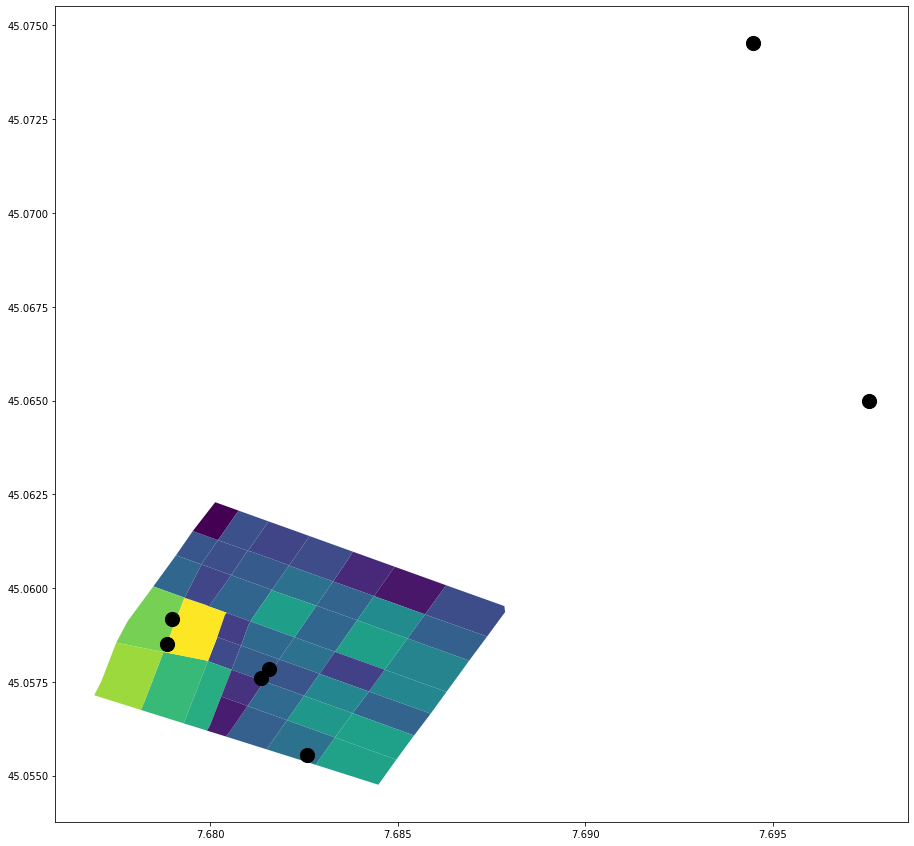

In [ ]:
#Ploting population and sensors
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25,15))




ax.set_aspect('equal')


shapefile.plot(ax=ax, column='NRESID')
sensors_geo.plot(ax=ax, marker='o', color= 'black', markersize=200)


plt.show();

As observed in the chart, there are different population densities as per geographic blocks. Compared to sensors, this representation induces an initial intuition: the population might affect noise levels as well as levels of complaints.

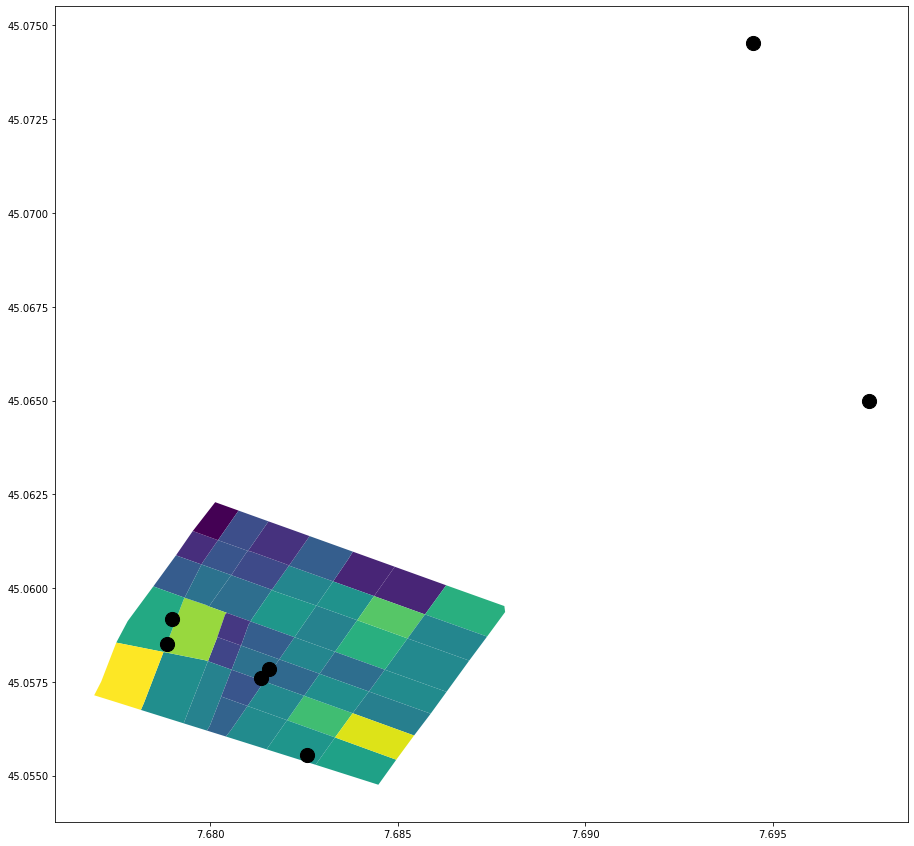

In [ ]:
#Elderly
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25,15))




ax.set_aspect('equal')


shapefile.plot(ax=ax, column='OLT_65_A')
sensors_geo.plot(ax=ax, marker='o', color= 'black', markersize=200)


plt.show();

Additionally, the population is distributed differently in terms of demographic characteristics. This fact has potential for impacting, again, noise levels and complaints. Therefore, this perspective might be incorporated into the subsequent models for outlier detection and complaints prediction.

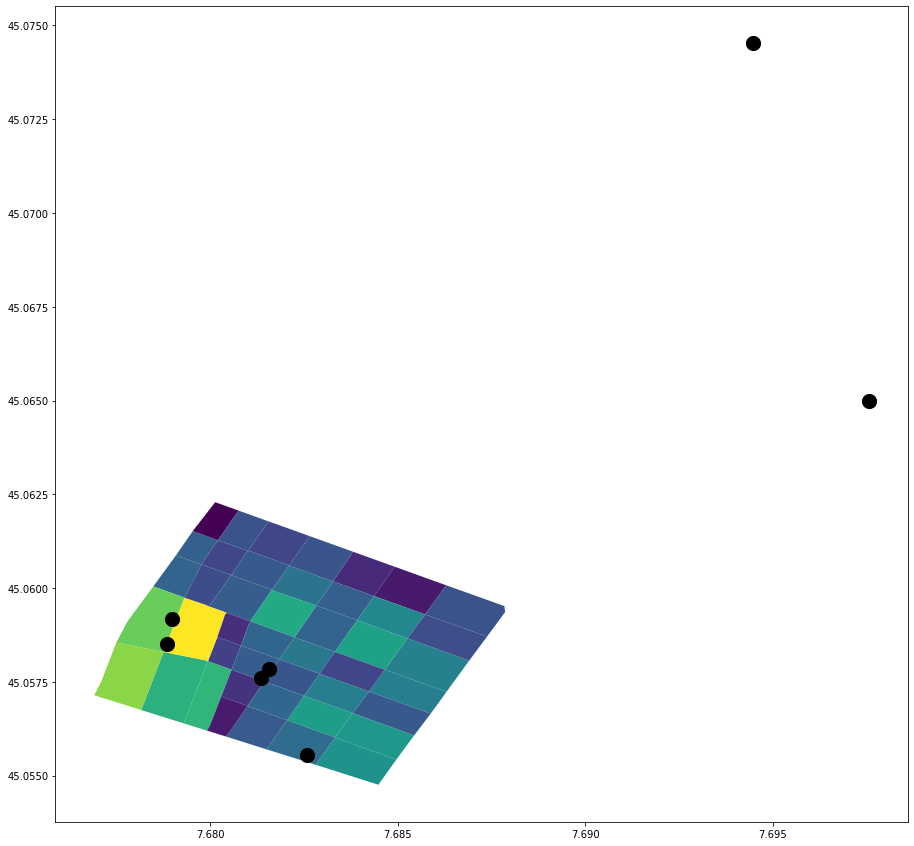

In [ ]:
#Families
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25,15))




ax.set_aspect('equal')


shapefile.plot(ax=ax, column='NFAMIGL')
sensors_geo.plot(ax=ax, marker='o', color= 'black', markersize=200)


plt.show();

Similarly, the distribution of families differs compared to the elderly population. This demographic characteristic might be a key explainable variable.

This set of variables is considered static since it is not expected to change significantly in the short term. From the complaints perspective, we refer to this data as a potential endogenous factor as opposed to exogenous noise levels. It is assumed that the complaints are initialized by neighbors/census registered inhabitants.

### Understanding the businesses database

Businesses are expected to be an endogenous and static factor influencing both noise levels and complaints. 
Here we plot the data and try to relate it to previous assessments. The real impact of these features will be extracted from the modeling section.

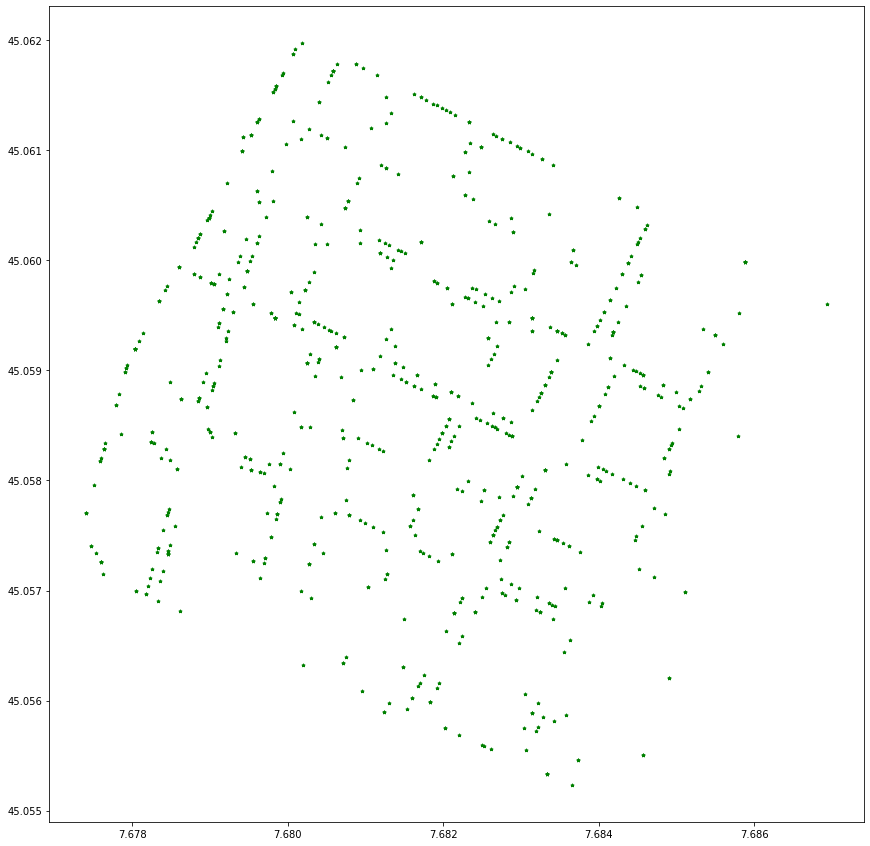

In [ ]:
#Ploting businesses
gdf.plot(marker='*', color= 'green', markersize=10, figsize=(25,15))

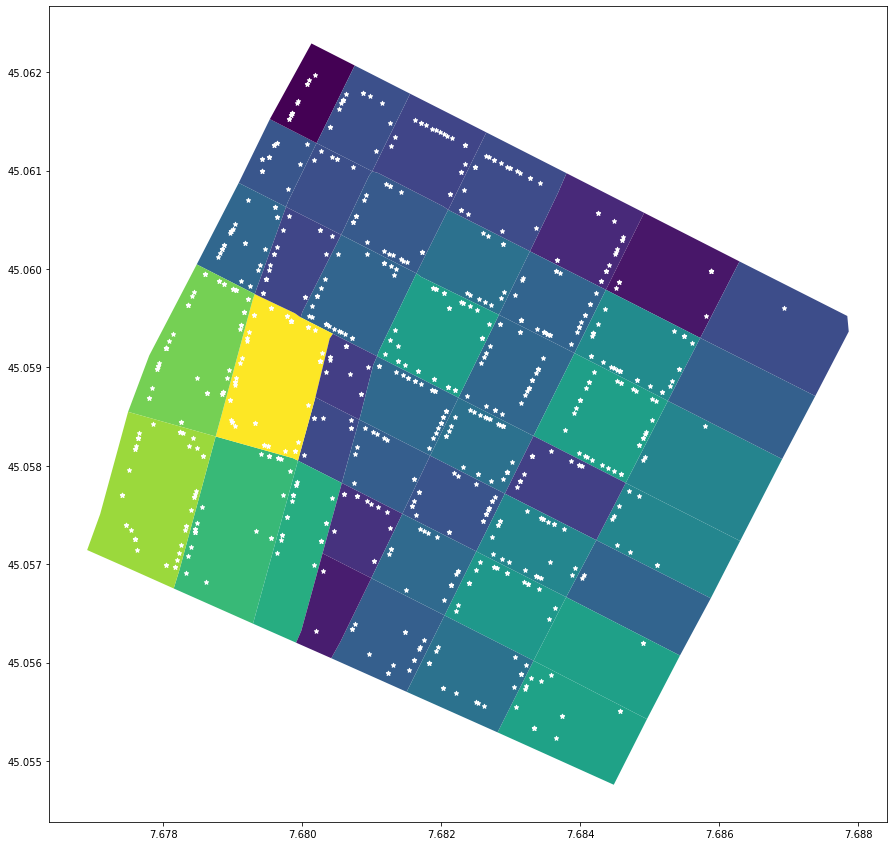

In [ ]:
#Superposing businesses and population data
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25,15))




ax.set_aspect('equal')


shapefile.plot(ax=ax, column='NRESID')
gdf.plot(ax=ax, marker='*', color= 'white', markersize=20)


plt.show();

We observe that the businesses data is located at the edges of geometric blocks indicating that a block is equivalent to a building unit. 

In [ ]:
#Reading and processing sensor data
path = '/content/drive/MyDrive/Finals/Data/noise_sensor_list.csv'
sensors = pd.read_csv(path, ';')
sensors

sensors = sensors.rename(columns={'Lat': 'latitude', 'Long' : 'longitude'})
sensors = sensors.stack().str.replace(',','.').unstack()
sensors['latitude'] = sensors['latitude'].astype(str).astype(float)
sensors['longitude'] = sensors['longitude'].astype(str).astype(float)
sensors


,code,address,latitude,longitude,streaming
0,s_01,Via Saluzzo. 26 Torino,45.059172,7.678986,https://userportal.smartdatanet.it/userportal/...
1,s_02,Via Principe Tommaso. 18bis Torino,45.057837,7.681555,https://userportal.smartdatanet.it/userportal/...
2,s_03,Largo Saluzzo Torino,45.058518,7.678854,https://userportal.smartdatanet.it/userportal/...
3,s_05,Via Principe Tommaso angolo via Baretti Torino,45.057603,7.681348,https://userportal.smartdatanet.it/userportal/...
4,s_06,Corso Marconi. 27 Torino,45.055554,7.682590,https://userportal.smartdatanet.it/userportal/...
5,TTO-001,via Matteo Pescatore 17,45.064990,7.697560,NaN
6,TTO-002,via Reggio 3,45.074520,7.694460,NaN


In [ ]:
sensors_geo = geopandas.GeoDataFrame(
    sensors, geometry=gpd.points_from_xy(sensors.longitude, sensors.latitude))

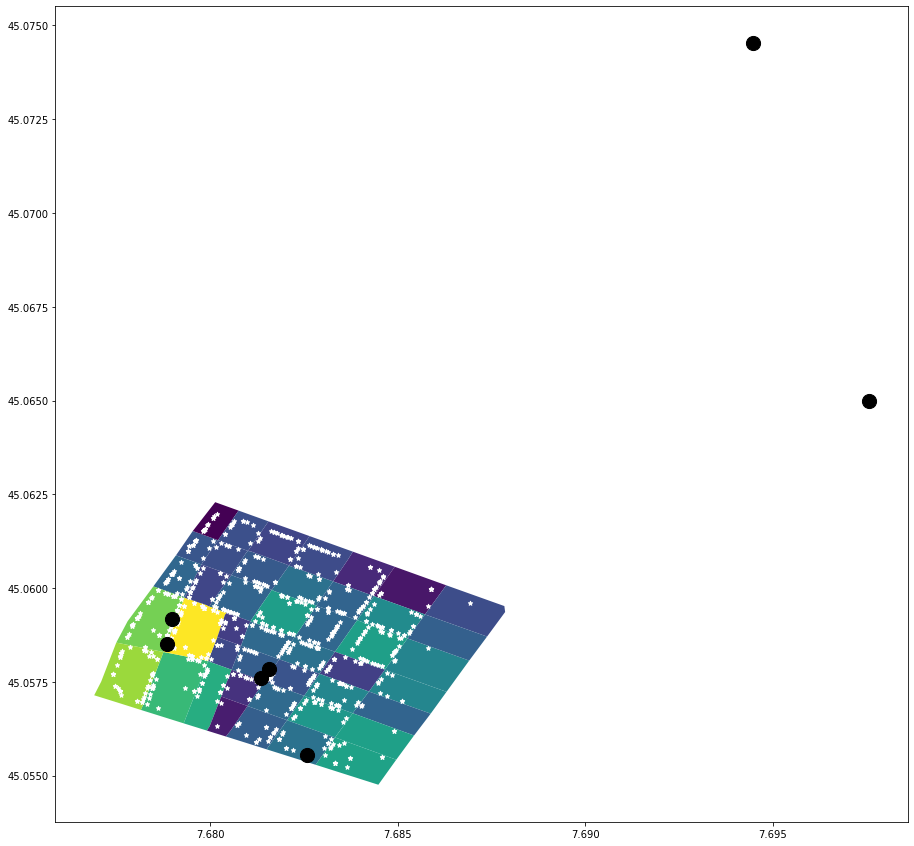

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25,15))




ax.set_aspect('equal')


shapefile.plot(ax=ax, column='NRESID')
gdf.plot(ax=ax, marker='*', color= 'white', markersize=20)
sensors_geo.plot(ax=ax, marker='o', color= 'black', markersize=200)


plt.show();

Combining all input into a map, showcasing how does sensors, population and stablishments relate to each other/interact.

## **First Objective: Noise level prediction** 
Build a model that can predict noise in recreational nightlife, especially peaks of noise outside what is considered normal (outliers). In this section 

### Identify Relevant variables with Lasso algorithm


In [ ]:
FINAL = final_data.merge(business, on = 'sensor', how = 'left').merge(censo, on = 'sensor',how = 'left').drop(['Fecha','Hora','Fecha completa','datatype','datavalue'], axis = 1)

In [ ]:
FINAL['temp'] = FINAL[['month','temp']].groupby(['month'])['temp'].transform(lambda x: x.fillna(x.mean()))
FINAL['rain'] = FINAL[['month','rain']].groupby(['month'])['rain'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
F = FINAL[(FINAL['hora'] <= 6) | (FINAL['hora'] >= 22)].dropna()

In [ ]:
F2 = F.drop(['code','Lat','Long','Data'],axis = 1)
F2

,hora,day,month,year,day_week,rain,temp,Match,noise_level,sensor,holiday,Abierto - COVID,205,207,214,217,99,Abbigliamento,Alimentari,Alimentari annessi ad altra attivita,Articoli per animali,Articoli pr la casa,Articoli sanitari e ortopedici,Audiovisivi,Bibite,Bigiotteria,Calzature,Cartolerie,Casalinghi - Igiene casa e persona,Elettrodomestici e/o ricambi,Elettronica,Enoteca,Extralimentari,Farmacia,Ferramenta,Fiori e piante,Frutta e verdura,Gastronomia,Gelateria,Giocattoli,Librerie,Macelleria,Minimercato,Mista,Mobili,Nessuna,Non alimentari annessi ad altre attivita,Non alimentari generici,Oggetti preziosi,Opere d'arte,Ottica,Panetteria,Panificio,Pasticceria,Pescheria,Phone center,Pizza al taglio,Profumeria,Quotidiani e periodici,Ricambi auto e accessori,Sexy shop,Tabacchi,Telefonia,Tessuti,Vendita al dettaglio di cose antiche ed usate,NRESID,NFAMIGL,NMASCHI,NFEMM,NSTRAN,AN_0_14,AN_15_64,OLT_65_A
0,0,6,1,2016,2,0.044000,8.572387,0.0,61.1,C1,1.0,1.0,0.405731,0.390223,0.327670,0.462568,1.384021,16.171195,23.120083,3.036568,0.643842,1.330908,0.288526,3.345545,12.115266,1.720416,0.468833,2.568124,2.097028,1.054769,4.419825,1.477720,77.020969,1.344821,0.966410,1.643003,0.789471,11.839868,1.165071,0.377511,1.538137,2.291552,0.392000,13.224559,3.048635,88.272684,3.092637,3.479391,1.642570,0.830764,1.045792,2.244424,3.395935,4.761468,0.520592,6.486116,2.241962,5.222709,1.434933,0.749495,0.664442,2.587284,7.978282,0.630630,4.502600,6358.338209,3531.326686,3170.757406,3187.580802,1478.369178,837.896525,4266.293236,1254.148448
1,1,6,1,2016,2,0.044000,8.572387,0.0,57.2,C1,1.0,1.0,0.405731,0.390223,0.327670,0.462568,1.384021,16.171195,23.120083,3.036568,0.643842,1.330908,0.288526,3.345545,12.115266,1.720416,0.468833,2.568124,2.097028,1.054769,4.419825,1.477720,77.020969,1.344821,0.966410,1.643003,0.789471,11.839868,1.165071,0.377511,1.538137,2.291552,0.392000,13.224559,3.048635,88.272684,3.092637,3.479391,1.642570,0.830764,1.045792,2.244424,3.395935,4.761468,0.520592,6.486116,2.241962,5.222709,1.434933,0.749495,0.664442,2.587284,7.978282,0.630630,4.502600,6358.338209,3531.326686,3170.757406,3187.580802,1478.369178,837.896525,4266.293236,1254.148448
2,2,6,1,2016,2,0.044000,8.572387,0.0,52.5,C1,1.0,1.0,0.405731,0.390223,0.327670,0.462568,1.384021,16.171195,23.120083,3.036568,0.643842,1.330908,0.288526,3.345545,12.115266,1.720416,0.468833,2.568124,2.097028,1.054769,4.419825,1.477720,77.020969,1.344821,0.966410,1.643003,0.789471,11.839868,1.165071,0.377511,1.538137,2.291552,0.392000,13.224559,3.048635,88.272684,3.092637,3.479391,1.642570,0.830764,1.045792,2.244424,3.395935,4.761468,0.520592,6.486116,2.241962,5.222709,1.434933,0.749495,0.664442,2.587284,7.978282,0.630630,4.502600,6358.338209,3531.326686,3170.757406,3187.580802,1478.369178,837.896525,4266.293236,1254.148448
3,3,6,1,2016,2,0.044000,8.572387,0.0,50.6,C1,1.0,1.0,0.405731,0.390223,0.327670,0.462568,1.384021,16.171195,23.120083,3.036568,0.643842,1.330908,0.288526,3.345545,12.115266,1.720416,0.468833,2.568124,2.097028,1.054769,4.419825,1.477720,77.020969,1.344821,0.966410,1.643003,0.789471,11.839868,1.165071,0.377511,1.538137,2.291552,0.392000,13.224559,3.048635,88.272684,3.092637,3.479391,1.642570,0.830764,1.045792,2.244424,3.395935,4.761468,0.520592,6.486116,2.241962,5.222709,1.434933,0.749495,0.664442,2.587284,7.978282,0.630630,4.502600,6358.338209,3531.326686,3170.757406,3187.580802,1478.369178,837.896525,4266.293236,1254.148448
4,4,6,1,2016,2,0.044000,8.572387,0.0,47.4,C1,1.0,1.0,0.405731,0.390223,0.327670,0.462568,1.384021,16.171195,23.120083,3.036568,0.643842,1.330908,0.288526,3.345545,12.115266,1.720416,0.468833,2.568124,2.097028,1.054769,4.419825,1.477720,77.020969,1.344821,0.966410,1.643003,0.789471,11.839868,1.165071,0.377511,1.538137,2.291552,0.392000,13.224559,3.048635,88.272684,3.092637,3.479391,1.642570,0.830764,1.045792,2.244424,3.395935,4.761468,0.520592,6.486116,2.241962,5.222709,1.434933,0.749495,0.664442,2.587284,7.978282,0.630630,4.502600,6358.338209,3531.326686,31

For categorical variables it is necessary to make a Label Encoder so that the model knows that they are categorical variables and so the prediction can be better.

In [ ]:
from sklearn import preprocessing
import pandas as pd
le = preprocessing.LabelEncoder()

#sensor
le.fit(F2['sensor'])
F2['sensor'] = le.transform(F2['sensor'])

#holiday
le.fit(F2['holiday'])
F2['holiday'] = le.transform(F2['holiday']) 

#day_week
le.fit(F2['day_week'])
F2['day_week'] = le.transform(F2['day_week'])

#covid
le.fit(F2['Abierto - COVID'])
F2['Abierto - COVID'] = le.transform(F2['Abierto - COVID'])


In [ ]:
X = F2.drop('noise_level', axis = 1)
y = F2['noise_level']

In [ ]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.01)
clf.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1498924.093808462, tolerance: 461.64485532264655
  positive)


Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

The results are shown in the cell below. Variables with a 0 mean that they have little influence on the output variable, in this case the noise level.

In [ ]:
list(zip(F2.columns,clf.coef_))

[('hora', 0.3186192931269454),
 ('day', -0.016550100762661484),
 ('month', -0.07843425605762282),
 ('year', -1.1601343637166648),
 ('day_week', 0.5767537703067281),
 ('rain', 0.45472546130719793),
 ('temp', 0.05437324554426656),
 ('Match', 1.777773784273464),
 ('noise_level', 0.5516957447168382),
 ('sensor', 0.3700258957620939),
 ('holiday', 3.513472119960684),
 ('Abierto - COVID', -0.0),
 ('205', -0.0),
 ('207', -0.0),
 ('214', -0.0),
 ('217', -0.0),
 ('99', 0.0),
 ('Abbigliamento', 0.47207734367174364),
 ('Alimentari', -0.0),
 ('Alimentari annessi ad altra attivita', 0.0),
 ('Articoli per animali', -0.0),
 ('Articoli pr la casa', -0.0),
 ('Articoli sanitari e ortopedici', -0.0),
 ('Audiovisivi', 0.0),
 ('Bibite', -0.0),
 ('Bigiotteria', -0.0),
 ('Calzature', 0.0),
 ('Cartolerie', 0.0),
 ('Casalinghi - Igiene casa e persona', -0.0),
 ('Elettrodomestici e/o ricambi', -0.0),
 ('Elettronica', -0.0),
 ('Enoteca', -0.0998170281934792),
 ('Extralimentari', 0.0),
 ('Farmacia', 0.0),
 ('Ferra

In [ ]:
variables = []
a = list(zip(F2.columns,clf.coef_))
for name, value in a:
  if (value == -0.0) & (value == 0.0):
    variables.append(name)
variables.remove('Abierto - COVID')

In [ ]:
variables.remove('Nessuna')

In [ ]:
C = F

In [ ]:
C = C.drop(variables, axis = 1)

In [ ]:
C = C.drop(['Data','day','year','Lat','Long','code','sensor'], axis = 1)

The following variables are the most relevant for predicting the noise level. These variables are the ones that will be used for the Regression Model and the XGBoost Model. We have train both models because with regression model we have simplicity and explainability and with the XGBoost, we do not have that simplicity but this model provides better accuracies.

In [ ]:
C.columns

Index(['hora', 'month', 'day_week', 'rain', 'temp', 'Match', 'noise_level',
       'holiday', 'Abierto - COVID', 'Abbigliamento', 'Enoteca', 'Nessuna',
       'Tabacchi', 'Vendita al dettaglio di cose antiche ed usate', 'NRESID',
       'NFAMIGL', 'NMASCHI', 'NFEMM', 'NSTRAN', 'AN_0_14', 'AN_15_64',
       'OLT_65_A'],
      dtype='object')

In [ ]:
C.head()

,hora,month,day_week,rain,temp,Match,noise_level,holiday,Abierto - COVID,Abbigliamento,Enoteca,Nessuna,Tabacchi,Vendita al dettaglio di cose antiche ed usate,NRESID,NFAMIGL,NMASCHI,NFEMM,NSTRAN,AN_0_14,AN_15_64,OLT_65_A
0,0,1,2,0.044,8.572387,0.0,61.1,1.0,1.0,16.171195,1.47772,88.272684,2.587284,4.5026,6358.338209,3531.326686,3170.757406,3187.580802,1478.369178,837.896525,4266.293236,1254.148448
1,1,1,2,0.044,8.572387,0.0,57.2,1.0,1.0,16.171195,1.47772,88.272684,2.587284,4.5026,6358.338209,3531.326686,3170.757406,3187.580802,1478.369178,837.896525,4266.293236,1254.148448
2,2,1,2,0.044,8.572387,0.0,52.5,1.0,1.0,16.171195,1.47772,88.272684,2.587284,4.5026,6358.338209,3531.326686,3170.757406,3187.580802,1478.369178,837.896525,4266.293236,1254.148448
3,3,1,2,0.044,8.572387,0.0,50.6,1.0,1.0,16.171195,1.47772,88.272684,2.587284,4.5026,6358.338209,3531.326686,3170.757406,3187.580802,1478.369178,837.896525,4266.293236,1254.148448
4,4,1,2,0.044,8.572387,0.0,47.4,1.0,1.0,16.171195,1.47772,88.272684,2.587284,4.5026,6358.338209,3531.326686,3170.757406,3187.580802,1478.369178,837.896525,4266.293236,1254.148448


### Noise level prediction with Linear Regression

In [ ]:
from sklearn import preprocessing
import pandas as pd
le = preprocessing.LabelEncoder()

#sensor
le.fit(C['month'])
C['month'] = le.transform(C['month'])

#holiday
le.fit(C['holiday'])
C['holiday'] = le.transform(C['holiday']) 

#day_week
le.fit(C['day_week'])
C['day_week'] = le.transform(C['day_week'])

#covid
le.fit(C['Abierto - COVID'])
C['Abierto - COVID'] = le.transform(C['Abierto - COVID'])

#datatype
le.fit(C['Match'])
C['Match'] = le.transform(C['Match'])


In [ ]:
X = C.drop('noise_level', axis = 1)
y = C['noise_level']

In [ ]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.2710769595454291
Root Mean Squared Error: 6.443581055303309


In [ ]:
list(zip(X.columns, reg_all.coef_))

[(0.3302425277872608, 'hora'),
 (-0.007379775699048317, 'month'),
 (0.5865297596565333, 'day_week'),
 (0.450128848488836, 'rain'),
 (0.06455370990099746, 'temp'),
 (1.7216720955136715, 'Match'),
 (0.7381765273916838, 'holiday'),
 (6.3251699874364515, 'Abierto - COVID'),
 (138226262.91726857, 'Abbigliamento'),
 (-68867048.55664228, 'Enoteca'),
 (-1224589412.1182756, 'Nessuna'),
 (-17195955.157281782, 'Tabacchi'),
 (367326415.20827574, 'Vendita al dettaglio di cose antiche ed usate'),
 (2549927119.3179903, 'NRESID'),
 (-1560984289.898306, 'NFAMIGL'),
 (2848560011.100436, 'NMASCHI'),
 (617382722.5935781, 'NFEMM'),
 (112100472.46168378, 'NSTRAN'),
 (-2188285116.7037582, 'AN_0_14'),
 (-3849958048.698456, 'AN_15_64'),
 (-2672961525.212039, 'OLT_65_A')]

The results of the linear regression are good, as the RSME is low. However, the R-squared is not very high, but it is almost 0.3, which means that approximately 30% of the variation of the response variable (noise level) is explained by the relationship with the predictor variables. The above cell shows the coefficient that each variable has in the regression, so those with positive coefficients mean that as they increase there will be more noise, and the negative ones the other way around. 

### Noise level prediction with XGBoost

Given the poor performance of the Linear Regression (LR) model we have tried another one, in this case XGBOOST. XGBOOST is an optimized gradient boostig that is considered to be very flexible and easy to use. However, as always, there is a tradeoff between explainability of the models and their performance. As it is going to be proved below, XGBOOST perforrms better than LR but is a bit more of a black box model than the latter.
In this case, the boosting learner was gbtree. Also, three models have been trained:
+ Case1 : XGBOOST (using all variables)
+ Case2 : XGBOOST (using the variables chosen by the Lasso Regularization method)
+ Case3: XGBOOST with k-fold cross validation (K-fold CV)

For simplicity, this section contains only one model (Case2) because it was found to be the best model out of the three. Between using all the variables and those chosen with Lasso the difference in RMSE was of 0.05 so we chose to present model with less variables because it is a bit simpler and yields almost the same as the other. Regarding k-fold CV, the results were surprinsingly the same as with no CV and the CV model took more time to compute.

In [ ]:
# Import libraries with standard conventions
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
#Read dataframe (saved in csv in an earlier step) and drop NAs
clean_data = pd.read_csv ('Clean_data_noise_level.csv')
clean_data = clean_data.dropna()

In [ ]:
# Divide dataframe into target and variables for the model
y = clean_data['noise_level']
X = clean_data.drop(['noise_level','year','day', 'Lat', 'Long','code'],axis = 1)

In [ ]:
#Encode categorical variables 
ONE_HOT_COLS = ["month", "day_week", 'hora']


for col in ONE_HOT_COLS:
    s = X[col].unique()

    # Create a One Hot Dataframe with 1 row for each unique value
    one_hot_df = pd.get_dummies(s, prefix='%s_' % col)
    one_hot_df[col] = s



    # Merge the one hot columns
    X = X.merge(one_hot_df, on=[col], how="left")

X = X.drop(["month", "day_week", 'hora'],axis = 1)


In [ ]:
#Convert into DMatrix : optimized data structure that XGBoost supports and gives it acclaimed performance and efficiency gains
data_dmatrix = xgb.DMatrix(data=X,label=y)

#Train /test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
               max_depth = 5, alpha = 10, n_estimators = 50, booster='gbtree')

#xg_reg = xgb.XGBRegressor(max_depth=5, n_estimators=100, n_jobs=2,
 #                          objectvie='reg:squarederror', booster='gbtree',
  #                         random_state=42, learning_rate=0.1)

In [ ]:
#Train model
xg_reg.fit(X_train,y_train)


#Predict on test
preds = xg_reg.predict(X_test)

In [ ]:
#Calculate RMSE

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 5.195986


In [ ]:
MSE = mse(y_test, preds)
RMSE = np.sqrt(MSE)
R_squared = r2_score(y_test, preds)

print("\nMSE: ", np.round(MSE, 2))
print()
print("\nRMSE: ", np.round(RMSE, 2))
print()
print("R-Squared: ", np.round(R_squared, 2))


MSE:  27.0


RMSE:  5.2

R-Squared:  0.54


In [ ]:
min(clean_data.noise_level)

28.2

To sum up,
+ RMSE (Linear Regression) = 6.5
+ RMSE (XGBOOST) = 5.2

+ R^2 (Linear Regression) = 0.28
+ R^2 (XGBOOST ) = 0.54

With XGBOOST we have improved the proportion of the variance of the Noise that is explained with our variables. Not only has it improved but it doubled in value, while at the same time improving the RMSE although is a lesser manner.

However, the Mean Squared Error is still very high taking into accoun that the Noise range is of 21.2 - 82.3, which indicates that this model makes mistakes of almost half of the range of the Noise. This was to be expected given the R^2 value, that although it is higher than that obtained with Linear Regression is still fairly low. This may indicate that we need more trees to explain the model or, the most probable one, we need more variables for the model to work properly.


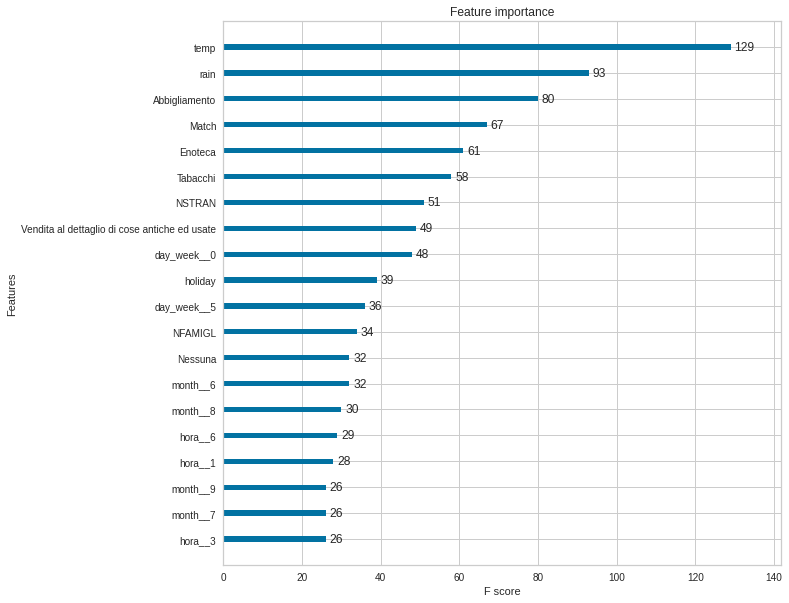

In [ ]:
#Plot variable importance
xgb.plot_importance(xg_reg,  max_num_features=20)
plt.rcParams['figure.figsize'] = [15, 15]
plt.show()

### Outliers Detection

In the two previous sections, a prediction of the noise level has been obtained depending on the available variables. This dataset contains quite a few outliers, and it is interesting to identify them in order to find out which are the causes that can generate higher noise levels than normal. Therefore, an algorithm (isolation random forest) will be used to identify this outliers.

In [ ]:
Outliers_0 = pd.read_csv('/content/drive/MyDrive/Finals/Clean_data_noise_level.csv').dropna()

In [ ]:
Outliers_0

,hora,day,month,year,day_week,rain,temp,Match,noise_level,Lat,Long,holiday,Abierto - COVID,Abbigliamento,Enoteca,Nessuna,Tabacchi,Vendita al dettaglio di cose antiche ed usate,code,NRESID,NFAMIGL,NMASCHI,NFEMM,NSTRAN,AN_0_14,AN_15_64,OLT_65_A
0,0,6,1,2016,2,0.044000,8.572387,0.0,61.1,45.059172,7.678986,1.0,1.0,16.171195,1.477720,88.272684,2.587284,4.502600,s_01,6358.338209,3531.326686,3170.757406,3187.580802,1478.369178,837.896525,4266.293236,1254.148448
1,1,6,1,2016,2,0.044000,8.572387,0.0,57.2,45.059172,7.678986,1.0,1.0,16.171195,1.477720,88.272684,2.587284,4.502600,s_01,6358.338209,3531.326686,3170.757406,3187.580802,1478.369178,837.896525,4266.293236,1254.148448
2,2,6,1,2016,2,0.044000,8.572387,0.0,52.5,45.059172,7.678986,1.0,1.0,16.171195,1.477720,88.272684,2.587284,4.502600,s_01,6358.338209,3531.326686,3170.757406,3187.580802,1478.369178,837.896525,4266.293236,1254.148448
3,3,6,1,2016,2,0.044000,8.572387,0.0,50.6,45.059172,7.678986,1.0,1.0,16.171195,1.477720,88.272684,2.587284,4.502600,s_01,6358.338209,3531.326686,3170.757406,3187.580802,1478.369178,837.896525,4266.293236,1254.148448
4,4,6,1,2016,2,0.044000,8.572387,0.0,47.4,45.059172,7.678986,1.0,1.0,16.171195,1.477720,88.272684,2.587284,4.502600,s_01,6358.338209,3531.326686,3170.757406,3187.580802,1478.369178,837.896525,4266.293236,1254.148448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95298,2,20,11,2019,2,0.203217,11.290667,0.0,60.7,45.055554,7.682590,0.0,1.0,12.694433,1.306148,61.789300,1.194561,3.657303,s_06,5359.107731,2939.092242,2610.642045,2748.465685,940.944543,699.124306,3488.852423,1171.131002
95299,3,20,11,2019,2,0.203217,11.290667,0.0,59.6,45.055554,7.682590,0.0,1.0,12.694433,1.306148,61.789300,1.194561,3.657303,s_06,5359.107731,2939.092242,2610.642045,2748.465685,940.944543,699.124306,3488.852423,1171.131002
95300,4,20,11,2019,2,0.203217,11.290667,0.0,61.8,45.055554,7.682590,0.0,1.0,12.694433,1.306148,61.789300,1.194561,3.657303,s_06,5359.107731,2939.092242,2610.642045,2748.465685,940.944543,699.124306,3488.852423,1171.131002
95301,5,20,11,2019,2,0.203217,11.290667,0.0,61.9,45.055554,7.682590,0.0,1.0,12.694433,1.306148,61.789300,1.194561,3.657303,s_06,5359.107731,2939.092242,2610.642045,2748.465685,940.944543,699.124306,3488.852423,1171.131002


In [ ]:
Outliers = Outliers_0.drop(['code','year','day','Lat','Long'], axis = 1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)

In [ ]:
X = Outliers['noise_level']
y = Outliers.drop('noise_level', axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [ ]:
# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(np.array(X_train).reshape(-1, 1))
y_pred_train = clf.predict(np.array(X_train).reshape(-1, 1))
y_pred_test = clf.predict(np.array(X_test).reshape(-1, 1))

In [ ]:
predictions = clf.predict(np.array(X).reshape(-1, 1))

In [ ]:
Outliers_0['outliers'] = predictions

In [ ]:
Outliers_0['outliers'] = Outliers_0['outliers'].replace(-1,0)

In [ ]:
Outliers['outliers'] = predictions
Outliers['outliers'] = Outliers['outliers'].replace(-1,0)

Meaning of the labels:
 + 1: inliers
 + 0: ouliers

In [ ]:
Outliers['outliers'].value_counts()

1    57118
0    21768
Name: outliers, dtype: int64

CLASSIFICATION OUTLIERS
As we can see the are a lot of ouliers, 25% of the data. Once you have identified the outliers in your data set, it is interesting to be able to predict whether an observation will also be an outlier or not. We are therefore faced with a classification problem. We are going to train a random forest model with the available data, plus the calculated variable that indicates whether it is an outlier or not. This model will allow us to make predictions in the future if we are facing a moment with a lot of noise.

In [ ]:
Outliers.head()

,hora,month,day_week,rain,temp,Match,noise_level,holiday,Abierto - COVID,Abbigliamento,Enoteca,Nessuna,Tabacchi,Vendita al dettaglio di cose antiche ed usate,NRESID,NFAMIGL,NMASCHI,NFEMM,NSTRAN,AN_0_14,AN_15_64,OLT_65_A,outliers
0,0,1,2,0.044,8.572387,0.0,61.1,1.0,1.0,16.171195,1.47772,88.272684,2.587284,4.5026,6358.338209,3531.326686,3170.757406,3187.580802,1478.369178,837.896525,4266.293236,1254.148448,1
1,1,1,2,0.044,8.572387,0.0,57.2,1.0,1.0,16.171195,1.47772,88.272684,2.587284,4.5026,6358.338209,3531.326686,3170.757406,3187.580802,1478.369178,837.896525,4266.293236,1254.148448,1
2,2,1,2,0.044,8.572387,0.0,52.5,1.0,1.0,16.171195,1.47772,88.272684,2.587284,4.5026,6358.338209,3531.326686,3170.757406,3187.580802,1478.369178,837.896525,4266.293236,1254.148448,1
3,3,1,2,0.044,8.572387,0.0,50.6,1.0,1.0,16.171195,1.47772,88.272684,2.587284,4.5026,6358.338209,3531.326686,3170.757406,3187.580802,1478.369178,837.896525,4266.293236,1254.148448,1
4,4,1,2,0.044,8.572387,0.0,47.4,1.0,1.0,16.171195,1.47772,88.272684,2.587284,4.5026,6358.338209,3531.326686,3170.757406,3187.580802,1478.369178,837.896525,4266.293236,1254.148448,1


In [ ]:
from sklearn.model_selection import train_test_split

X=Outliers.drop(['outliers','noise_level'], axis = 1)
y=Outliers['outliers']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8202560527316517


This model has a good accuracy in the test set of 0.82.

In [ ]:
# Finding important values

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

It is also interesting to analyse which variables have been most important in identifying outliers in the classification.

In [ ]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

temp                                             0.225673
hora                                             0.223548
day_week                                         0.182038
month                                            0.090525
Abierto - COVID                                  0.070133
rain                                             0.065644
Match                                            0.032637
Tabacchi                                         0.016282
AN_0_14                                          0.010720
holiday                                          0.010289
NFEMM                                            0.009630
Nessuna                                          0.008951
AN_15_64                                         0.008891
NFAMIGL                                          0.008163
NSTRAN                                           0.007809
Enoteca                                          0.006303
OLT_65_A                                         0.006119
NRESID        

No handles with labels found to put in legend.


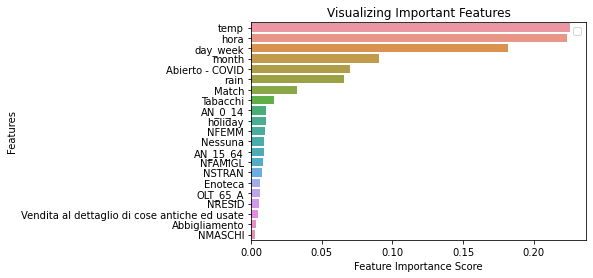

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

The graph above shows the importance of the variables in the ranking. We can see that the most important variables are the followings:
 + temperature and rain: Good weather will mean that there will be more people in the street; higher temperatures and the absence of rain will mean more people on the street
 + hour, day of the week and month: the day of the week will have an influence as the hours studied are more likely to be more crowded on weekends than on weekdays when people are working. The month also has an influence, as months such as December and the summer months are more crowded due to holidays. Finally, the time of day also has an influence.
 + COVID: The COVID situation clearly have a  big impact due to the curfew since people are not allow to stay in the street at certains hours, which makes more difficult to have higher noise levels.
 + Match: on match days it has been detected that there is more noise, which makes sense because after the match people usually go out to celebrate the victories.

## **Second Objective: Complaint prediction**
Study the feasibility of predicting the complaints related to noise levels

The second goal aims to assess the feasibility of predicting noise-related complaints. In order to understand its viability, we have undertaken an unsupervised learning task intending to extract patterns from population profiles that have complained in the past.


To derive the population profiles, we have scaled demographic variables according to their distance to complaint locations. Next, a KNN-clustering has been leveraged to obtain patterns characterizing those profiles/clusters. Finally, the data is interpreted to derive those profiles with a higher propensity to complaining.



In [ ]:
# import pandas as pd
import matplotlib.pyplot as plt
import sys
from numpy import genfromtxt
from sklearn.cluster import DBSCAN

First, we read and pre-process the whole complaints database, formed by the annual complaint databases 

In [ ]:
complaints = pd.read_csv('/content/drive/MyDrive/WDL/Finals/Data/complaints_db.csv', encoding="utf8", sep=',')
complaints.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)
complaints.reset_index(level=0, inplace=True)
complaints = complaints.rename(columns={'lat': 'latitude', 'lng' : 'longitude', 'index':'ID'})

The outlier detection is linked to latitude and longitude values, as well as complaint IDs

In [ ]:
complaints_wo_outliers = complaints[["ID", "latitude", "longitude"]]
complaints_wo_outliers.set_index('ID')

,latitude,longitude
ID,,
0,45.058903,7.684207
1,45.059420,7.681091
2,45.058903,7.684207
3,45.049410,7.671125
4,45.045312,7.665153
...,...,...
692,45.051477,7.678524
693,44.648312,7.491573
694,45.054786,7.679561


Setting the hyperparameters needed, DBSCAN will classify where are the outliers caused by problems with coordinates parsing. 
Once determined, outliers are removed from the complaints database 

In [ ]:
# DBSCAN model with parameters
model = DBSCAN(eps=4, min_samples=5).fit(complaints_wo_outliers)
outlier_df = pd.DataFrame(complaints_wo_outliers)
complaints_wo_outliers = complaints_wo_outliers[model.labels_ != -1]
complaints = pd.merge(complaints_wo_outliers,complaints,on='ID')
complaints.drop(['latitude_y', 'longitude_y'], axis=1, inplace=True)
complaints = complaints.rename(columns={'latitude_x': 'latitude', 'longitude_x' : 'longitude', 'index':'ID'})


The distance between sensors location and complaints coordinates is calculated via the *harvesine* operation. The resulting dataframe will indicate the corrected distance -*log10(1/distance)*- for each complaint and sensor. 

The distance has been corrected with the logarithm of the inverse in order to penalize all those complaints that are further from the sensor location

In [ ]:
# add columns with radians for latitude and longitude in both dataframes
complaints[['lat_radians_complaints','long_radians_complaints']] = (
    np.radians(complaints.loc[:,['latitude','longitude']]))

In [ ]:
#haversine calculation for distance between 2 pairs of coordinates
dist = sklearn.neighbors.DistanceMetric.get_metric('haversine')
dist_matrix = (dist.pairwise
    (complaints[['lat_radians_complaints','long_radians_complaints']],
     sens_location[['lat_radians_sens_location','long_radians_sens_location']])*6371
)
# Note that 6371 is the radius of the earth in km
df_dist_matrix = (
    pd.DataFrame(np.log10(1/dist_matrix),index=complaints['ID'], 
                 columns=sens_location['code'])
)

df_dist_matrix[df_dist_matrix<0] = 0

df_dist_matrix.reset_index(level=0, inplace=True)

df_dist_matrix_trans = df_dist_matrix.transpose()

df_dist_matrix_trans.reset_index(level=0, inplace=True)

new_header = df_dist_matrix_trans.iloc[0] #grab the first row for the header
df_dist_matrix_trans = df_dist_matrix_trans[1:] #take the data less the header row
df_dist_matrix_trans.columns = new_header #set the header row as the df header

df_dist_matrix

code,ID,s_01,s_02,s_03,s_05,s_06,TTO-001,TTO-002
0,0,0.386008,0.620407,0.374067,0.573392,0.405080,0.000000,0.0
1,1,0.775670,0.745319,0.693966,0.692403,0.350945,0.000000,0.0
2,2,0.386008,0.620407,0.374067,0.573392,0.405080,0.000000,0.0
3,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...
623,692,0.067328,0.127157,0.106055,0.144865,0.256072,0.000000,0.0
624,693,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
625,694,0.309960,0.427496,0.378080,0.464368,0.597268,0.000000,0.0
626,695,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [ ]:
sensor_complain = df_dist_matrix.melt(id_vars=["ID"], 
        var_name="Sensor", 
        value_name="Value")
sensor_complain

,ID,Sensor,Value
0,0,s_01,0.386008
1,1,s_01,0.775670
2,2,s_01,0.386008
3,3,s_01,0.000000
4,4,s_01,0.000000
...,...,...,...
4391,692,TTO-002,0.000000
4392,693,TTO-002,0.000000
4393,694,TTO-002,0.000000
4394,695,TTO-002,0.000000


Join data with the complaints database in order to aggregate with distance and complaint type

In [ ]:
result = pd.merge(complaints, df_dist_matrix, how="left", on=["ID"])
result.drop(['longitude', 'latitude', 'lat_radians_complaints', 'long_radians_complaints', 
             'Area', 'Localita', 'Area Verde', 'Ora', 'Circoscrizione'], axis=1, inplace=True)
result

,ID,Categoria criminologa,Sottocategoria Criminologica,Data,s_01,s_02,s_03,s_05,s_06,TTO-001,TTO-002
0,0,Allarme Sociale,Altro,13/01/2016,0.386008,0.620407,0.374067,0.573392,0.405080,0.000000,0.0
1,1,Allarme Sociale,Altro,03/03/2016,0.775670,0.745319,0.693966,0.692403,0.350945,0.000000,0.0
2,2,Allarme Sociale,Altro,30/05/2016,0.386008,0.620407,0.374067,0.573392,0.405080,0.000000,0.0
3,3,Convivenza Civile,Altro,07/01/2016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,4,Convivenza Civile,Altro,22/01/2016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
623,692,Qualit� Urbana,Decoro e degrado urbano,19/10/2016,0.067328,0.127157,0.106055,0.144865,0.256072,0.000000,0.0
624,693,Qualit� Urbana,Decoro e degrado urbano,20/10/2016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
625,694,Qualit� Urbana,Decoro e degrado urbano,02/11/2016,0.309960,0.427496,0.378080,0.464368,0.597268,0.000000,0.0
626,695,Qualit� Urbana,Decoro e degrado urbano,24/11/2016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


As done before with sensor database, census data will be uploaded in order to rescale the effect of this data with the distance between the complaints location and the centroid of the census zone. 

The output dataframe will have the corrected distance values (log10(1/distance) between the centroid and the complaint location

In [ ]:
census = pd.read_csv('/content/drive/MyDrive/WDL/Finals/Data/census_JGL.csv', encoding="utf8", sep=',')
census.drop(['geometry', 'centroid', 'LOCALITA', 'NCIRCO', 'DENCIM', 'DISTRASS', 'Unnamed: 0', 'PARROCCH', 'TIPOSEZ', 'ASL', 'ZONASTAT'], axis=1, inplace=True)

In [ ]:
# add columns with radians for latitude and longitude in both dataframes
census[['lat_radians_census','long_radians_census']] = (
    np.radians(census.loc[:,['latitude','longitude']]))

In [ ]:
#haversine calculation for distance between 2 pairs of coordinates
dist = sklearn.neighbors.DistanceMetric.get_metric('haversine')
dist_matrix = (dist.pairwise
    (census[['lat_radians_census','long_radians_census']],
     complaints[['lat_radians_complaints','long_radians_complaints']])*6371
)
# Note that 6371 is the radius of the earth in km
df_dist_matrix = (
    pd.DataFrame(np.log10(1/dist_matrix),index=census['SEZCENS'], 
                 columns=complaints['ID'])
)

df_dist_matrix[df_dist_matrix<0] = 0

df_dist_matrix = df_dist_matrix.transpose()

#df_dist_matrix.reset_index(level=0, inplace=True)

df_dist_matrix

SEZCENS,326.0,328.0,336.0,338.0,343.0,346.0,356.0,322.0,323.0,324.0,325.0,327.0,352.0,359.0,361.0,329.0,332.0,321.0,334.0,335.0,337.0,340.0,341.0,339.0,345.0,350.0,353.0,360.0,320.0,330.0,342.0,333.0,344.0,347.0,351.0,348.0,354.0,355.0,357.0,358.0,318.0,319.0,331.0,349.0
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.434154,0.724539,1.053192,0.788040,0.825533,0.510062,0.555915,0.784478,0.840255,0.671320,0.364436,0.543451,0.356916,0.427001,0.405806,1.013394,0.370072,0.636511,0.549229,0.736514,1.327434,0.441254,0.550458,0.345119,0.692944,0.594399,0.408950,0.437857,0.500559,1.223472,0.666524,0.441749,0.885845,0.586205,0.285706,0.668848,0.498715,0.542186,0.497523,0.404679,0.345186,0.406893,0.775645,0.695223
1,0.783430,0.888930,0.780144,0.394745,0.747363,0.852170,0.459052,0.587044,0.471702,0.345977,0.664804,0.923329,0.555252,0.455632,0.300965,0.701750,0.741290,0.675929,1.386065,1.166497,0.565555,0.877897,1.169399,0.679926,0.389618,0.371404,0.565966,0.389769,0.686808,0.532308,1.016650,0.928745,0.553395,0.796804,0.494553,0.661693,0.633852,0.561503,0.341498,0.494398,0.563744,0.628682,0.378157,0.515041
2,0.434154,0.724539,1.053192,0.788040,0.825533,0.510062,0.555915,0.784478,0.840255,0.671320,0.364436,0.543451,0.356916,0.427001,0.405806,1.013394,0.370072,0.636511,0.549229,0.736514,1.327434,0.441254,0.550458,0.345119,0.692944,0.594399,0.408950,0.437857,0.500559,1.223472,0.666524,0.441749,0.885845,0.586205,0.285706,0.668848,0.498715,0.542186,0.497523,0.404679,0.345186,0.406893,0.775645,0.695223
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,0.000000,0.000000,0.045011,0.037256,0.089885,0.114533,0.178070,0.000000,0.000000,0.000000,0.000000,0.000000,0.182367,0.240928,0.218673,0.002818,0.007287,0.000000,0.029106,0.039653,0.045177,0.083045,0.074347,0.070452,0.080278,0.119135,0.195928,0.239013,0.000000,0.002990,0.083000,0.016715,0.090030,0.123226,0.160163,0.130533,0.169756,0.177987,0.164127,0.231740,0.000000,0.000000,0.000000,0.130633
693,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
694,0.171801,0.200927,0.270595,0.220595,0.348674,0.407097,0.481055,0.144748,0.136736,0.115187,0.155156,0.188302,0.536423,0.674994,0.461244,0.201971,0.211086,0.143702,0.252923,0.269186,0.256388,0.343178,0.331607,0.309808,0.280203,0.333777,0.583426,0.593740,0.133967,0.191512,0.345961,0.230029,0.328589,0.422966,0.457486,0.425092,0.521639,0.523276,0.394090,0.676745,0.108105,0.120915,0.164156,0.397131


As the census zone does not provide relevant information, the idea is to aggregate the values obtained during the previous step after multiplying by the people that is censed in that zone, corrected by the factors that represent the distance between the complaint location and the centroid


In [ ]:
census.drop(['longitude', 'latitude', 'SUPERF', 
             'lat_radians_census', 'long_radians_census'], axis=1, inplace=True)
census = census.set_index('SEZCENS')
census = census.fillna(0)

In [ ]:
res = df_dist_matrix @ census 
res.reset_index(level=0, inplace=True)
res

,ID,NRESID,NFAMIGL,NMASCHI,NFEMM,NSTRAN,AN_0_14,AN_15_64,OLT_65_A
0,0,6543.985999,3632.039376,3215.131372,3328.854627,1200.783595,842.517363,4271.580477,1429.888160
1,1,7026.914996,3907.054685,3486.074407,3540.840589,1486.028257,914.075128,4672.251084,1440.588784
2,2,6543.985999,3632.039376,3215.131372,3328.854627,1200.783595,842.517363,4271.580477,1429.888160
3,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
623,692,1001.678207,547.223393,488.658220,513.019987,172.716301,131.747994,656.193591,213.736622
624,693,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
625,694,3702.432148,2038.745596,1818.528806,1883.903342,689.822785,483.063099,2435.549418,783.819631
626,695,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Outliers obtained with the previous model, rescaled with the corrected distance to the complaint location

In [ ]:
outliers_sensors = pd.read_csv('/content/drive/MyDrive/WDL/Finals/Data_with_label_outlier.csv', encoding="utf8", sep=',')

outliers_sensors['date'] = pd.to_datetime((outliers_sensors.year*10000+outliers_sensors.month*100+outliers_sensors.day).apply(str),format='%Y%m%d')

outliers_sensors.drop(['Unnamed: 0', 'day_week', 'rain', 'Match', 
             'temp', 'noise_level', 'holiday', 'Abierto - COVID', 'Abbigliamento',
             'Enoteca', 'Nessuna', 'Tabacchi', 'Vendita al dettaglio di cose antiche ed usate', 
             'NRESID', 'NFAMIGL', 'NMASCHI', 'NFEMM', 'NSTRAN', 'AN_0_14', 'AN_15_64', 'OLT_65_A' , 
             'day', 'month', 'year'], axis=1, inplace=True)

outliers_sensors

,hora,Lat,Long,code,outliers,date
0,0,45.059172,7.678986,s_01,1,2016-01-06
1,1,45.059172,7.678986,s_01,1,2016-01-06
2,2,45.059172,7.678986,s_01,1,2016-01-06
3,3,45.059172,7.678986,s_01,1,2016-01-06
4,4,45.059172,7.678986,s_01,1,2016-01-06
...,...,...,...,...,...,...
78881,2,45.055554,7.682590,s_06,1,2019-11-20
78882,3,45.055554,7.682590,s_06,1,2019-11-20
78883,4,45.055554,7.682590,s_06,1,2019-11-20
78884,5,45.055554,7.682590,s_06,1,2019-11-20


In [ ]:
complaints[["day", "month", "year"]] = complaints["Data"].str.split("/", expand = True)

complaints.drop(['Categoria criminologa', 'Sottocategoria Criminologica', 'Circoscrizione', 'Localita', 
             'Area Verde', 'Ora', 'Data', 'lat_radians_complaints', 'long_radians_complaints', 'Area'], axis=1, inplace=True)

complaints['date'] = pd.to_datetime((complaints.year+complaints.month+complaints.day).apply(str),format='%Y%m%d')

complaints.drop(['day', 'month', 'year'], axis=1, inplace=True)

complaints

,ID,latitude,longitude,date
0,0,45.058903,7.684207,2016-01-13
1,1,45.059420,7.681091,2016-03-03
2,2,45.058903,7.684207,2016-05-30
3,3,45.049410,7.671125,2016-01-07
4,4,45.045312,7.665153,2016-01-22
...,...,...,...,...
623,692,45.051477,7.678524,2016-10-19
624,693,44.648312,7.491573,2016-10-20
625,694,45.054786,7.679561,2016-11-02
626,695,44.996812,7.681773,2016-11-24


Merging complaints database with the outliers database will determiny what complaints are coming due to this noise outliers

In [ ]:
outliers_complaints = outliers_sensors.merge(complaints, on='date', how='inner')

outliers_complaints = outliers_complaints.rename(columns={'Lat': 'latitude_sensor', 'Long' : 'longitude_sensor'})

# add columns with radians for latitude and longitude in both dataframes
outliers_complaints[['lat_radians','long_radians', 'lat_radians_sensor', 'long_radians_sensor']] = (
    np.radians(outliers_complaints.loc[:,['latitude','longitude', 'latitude_sensor', 'longitude_sensor']]))

outliers_complaints.drop(['latitude', 'longitude', 'latitude_sensor', 'longitude_sensor', 
                          'lat_radians', 'long_radians', 'lat_radians_sensor', 'long_radians_sensor'], axis=1, inplace=True)

outliers_complaints

,hora,code,outliers,date,ID
0,0,s_01,1,2016-07-06,131
1,0,s_01,1,2016-07-06,171
2,0,s_01,1,2016-07-06,631
3,0,s_01,1,2016-07-06,671
4,1,s_01,1,2016-07-06,131
...,...,...,...,...,...
21645,23,s_06,1,2018-06-05,380
21646,23,s_06,1,2018-06-05,380
21647,23,s_06,1,2018-06-05,380
21648,23,s_06,1,2018-06-05,380


In [ ]:
merged_df = outliers_complaints.merge(sensor_complain, how='inner', left_on=["ID", "code"], right_on=["ID","Sensor"])
merged_df

,hora,code,outliers,date,ID,Sensor,Value
0,0,s_01,1,2016-07-06,131,s_01,0.258997
1,1,s_01,1,2016-07-06,131,s_01,0.258997
2,2,s_01,1,2016-07-06,131,s_01,0.258997
3,3,s_01,0,2016-07-06,131,s_01,0.258997
4,4,s_01,1,2016-07-06,131,s_01,0.258997
...,...,...,...,...,...,...,...
21645,23,s_06,1,2018-06-05,380,s_06,0.451686
21646,23,s_06,1,2018-06-05,380,s_06,0.451686
21647,23,s_06,1,2018-06-05,380,s_06,0.451686
21648,23,s_06,1,2018-06-05,380,s_06,0.451686


In [ ]:
merged_df['mult'] = merged_df['Value'] * merged_df['outliers']
merged_df

,hora,code,outliers,date,ID,Sensor,Value,mult
0,0,s_01,1,2016-07-06,131,s_01,0.258997,0.258997
1,1,s_01,1,2016-07-06,131,s_01,0.258997,0.258997
2,2,s_01,1,2016-07-06,131,s_01,0.258997,0.258997
3,3,s_01,0,2016-07-06,131,s_01,0.258997,0.000000
4,4,s_01,1,2016-07-06,131,s_01,0.258997,0.258997
...,...,...,...,...,...,...,...,...
21645,23,s_06,1,2018-06-05,380,s_06,0.451686,0.451686
21646,23,s_06,1,2018-06-05,380,s_06,0.451686,0.451686
21647,23,s_06,1,2018-06-05,380,s_06,0.451686,0.451686
21648,23,s_06,1,2018-06-05,380,s_06,0.451686,0.451686


In [ ]:
merged_df = merged_df.groupby(['ID', 'date']).sum().reset_index()
merged_df.drop(['date', 'hora', 'Value'], axis=1, inplace=True)

In [ ]:
merged_df

,ID,outliers,mult
0,3,1,0.000000
1,9,32,7.324139
2,17,30,0.000000
3,18,40,3.919104
4,19,31,0.000000
...,...,...,...
477,689,18,0.000000
478,690,43,0.000000
479,692,41,5.589031
480,693,32,0.000000


As in the previous steps, the businesses location will be corrected by the distance factor to the complaints location

In [ ]:
# add columns with radians for latitude and longitude in both dataframes
complaints[['lat_radians_complaints','long_radians_complaints']] = (
    np.radians(complaints.loc[:,['latitude','longitude']])
)
complaints

,ID,latitude,longitude,date,lat_radians_complaints,long_radians_complaints
0,0,45.058903,7.684207,2016-01-13,0.786426,0.134115
1,1,45.059420,7.681091,2016-03-03,0.786435,0.134060
2,2,45.058903,7.684207,2016-05-30,0.786426,0.134115
3,3,45.049410,7.671125,2016-01-07,0.786261,0.133886
4,4,45.045312,7.665153,2016-01-22,0.786189,0.133782
...,...,...,...,...,...,...
623,692,45.051477,7.678524,2016-10-19,0.786297,0.134016
624,693,44.648312,7.491573,2016-10-20,0.779260,0.130753
625,694,45.054786,7.679561,2016-11-02,0.786354,0.134034
626,695,44.996812,7.681773,2016-11-24,0.785343,0.134072


In [ ]:
#haversine calculation for distance between 2 pairs of coordinates
dist = sklearn.neighbors.DistanceMetric.get_metric('haversine')
dist_matrix = (dist.pairwise
    (businesses[['lat_radians_businesses','long_radians_businesses']],
     complaints[['lat_radians_complaints','long_radians_complaints']])*6371
)
# Note that 6371 is the radius of the earth in km
df_dist_matrix = (
    pd.DataFrame(np.log10(1/dist_matrix),index=businesses['Merchandise Type'], 
                 columns=complaints['ID'])
)

df_dist_matrix[df_dist_matrix<0] = 0

df_dist_matrix.reset_index(level=0, inplace=True)

df_dist_matrix

ID,Merchandise Type,0,1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,30,31,32,33,34,35,36,37,38,39,40,...,653,654,655,656,657,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,689,690,692,693,694,695,696
0,Nessuna,0.896479,0.818971,0.896479,0.0,0.0,0.0,0.164489,0.0,0.0,0.136069,0.0,0.0,0.037515,0.494500,0.0,0.815998,0.0,0.037515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.989883,0.0,0.0,0.037515,0.818971,0.987374,0.0,0.0,0.0,0.0,0.0,0.099021,0.0,0.0,...,0.037515,0.0,0.0,0.0,0.0,0.037515,0.494500,0.0,0.000000,0.0,0.037515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.989883,0.0,0.818971,0.0,0.987374,0.0,0.067209,0.0,0.158144,0.0,0.0,0.0,0.494500,0.0,0.0,0.000000,0.067209,0.0,0.310364,0.0,0.0
1,Nessuna,0.732173,0.553248,0.732173,0.0,0.0,0.0,0.034989,0.0,0.0,0.008339,0.0,0.0,0.000000,0.242387,0.0,0.393721,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.475503,0.0,0.0,0.000000,0.553248,0.794535,0.0,0.0,0.0,0.0,0.0,0.000183,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.242387,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.475503,0.0,0.553248,0.0,0.794535,0.0,0.000000,0.0,0.260822,0.0,0.0,0.0,0.242387,0.0,0.0,0.000000,0.000000,0.0,0.129926,0.0,0.0
2,Nessuna,0.864107,0.768968,0.864107,0.0,0.0,0.0,0.092961,0.0,0.0,0.056667,0.0,0.0,0.000000,0.333796,0.0,0.531172,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.615670,0.0,0.0,0.000000,0.768968,1.330696,0.0,0.0,0.0,0.0,0.0,0.031574,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.333796,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.615670,0.0,0.768968,0.0,1.330696,0.0,0.000000,0.0,0.241215,0.0,0.0,0.0,0.333796,0.0,0.0,0.000000,0.000000,0.0,0.198363,0.0,0.0
3,Nessuna,0.859186,0.844323,0.859186,0.0,0.0,0.0,0.109328,0.0,0.0,0.069742,0.0,0.0,0.000000,0.360240,0.0,0.573616,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.653062,0.0,0.0,0.000000,0.844323,1.684645,0.0,0.0,0.0,0.0,0.0,0.039176,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.360240,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.653062,0.0,0.844323,0.0,1.684645,0.0,0.010149,0.0,0.233972,0.0,0.0,0.0,0.360240,0.0,0.0,0.000000,0.010149,0.0,0.217558,0.0,0.0
4,Nessuna,0.853393,0.831084,0.853393,0.0,0.0,0.0,0.105740,0.0,0.0,0.066275,0.0,0.0,0.000000,0.353456,0.0,0.562584,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.641261,0.0,0.0,0.000000,0.831084,1.566298,0.0,0.0,0.0,0.0,0.0,0.036493,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.353456,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.641261,0.0,0.831084,0.0,1.566298,0.0,0.007121,0.0,0.237506,0.0,0.0,0.0,0.353456,0.0,0.0,0.000000,0.007121,0.0,0.212664,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,Nessuna,0.699535,0.794579,0.699535,0.0,0.0,0.0,0.087974,0.0,0.0,0.039645,0.0,0.0,0.000000,0.305763,0.0,0.486147,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.533920,0.0,0.0,0.000000,0.794579,1.039810,0.0,0.0,0.0,0.0,0.0,0.006657,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.305763,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.533920,0.0,0.794579,0.0,1.039810,0.0,0.000000,0.0,0.289870,0.0,0.0,0.0,0.305763,0.0,0.0,0.000000,0.000000,0.0,0.178063,0.0,0.0
535,Mista,0.907746,0.668713,0.907746,0.0,0.0,0.0,0.073116,0.0,0.0,0.044954,0.0,0.0,0.000000,0.308017,0.0,0.489957,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.589279,0.0,0.0,0.000000,0.668713,1.079647,0.0,0.0,0.0,0.0,0.0,0.029674,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.308017,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.589279,0.0,0.668713,0.0,1.079647,0.0,0.000000,0.0,0.233009,0.0,0.0,0.0,0.308017,0.0,0.0,0.000000,0.000000,0.0,0.179645,0.0,0.0
536,Extralimentari,0.749003,0.418458,0.749003,0.0,0.0,0.0,0.008706,0.0,0.0,0.007311,0.0,0

After being corrected, the businesses are aggregated by type

In [ ]:
df_dist_matrix = df_dist_matrix.groupby(['Merchandise Type']).sum()
df_dist_matrix = df_dist_matrix.transpose()
df_dist_matrix.reset_index(level=0, inplace=True)
df_dist_matrix

Merchandise Type,ID,205,207,214,217,99,Abbigliamento,Alimentari,Alimentari annessi ad altra attivita,Articoli per animali,Articoli pr la casa,Articoli sanitari e ortopedici,Audiovisivi,Bibite,Bigiotteria,Calzature,Cartolerie,Casalinghi - Igiene casa e persona,Elettrodomestici e/o ricambi,Elettronica,Enoteca,Extralimentari,Farmacia,Ferramenta,Fiori e piante,Frutta e verdura,Gastronomia,Gelateria,Giocattoli,Librerie,Macelleria,Minimercato,Mista,Mobili,Nessuna,Non alimentari annessi ad altre attivita,Non alimentari generici,Oggetti preziosi,Opere d'arte,Ottica,Panetteria,Panificio,Pasticceria,Pescheria,Phone center,Pizza al taglio,Profumeria,Quotidiani e periodici,Ricambi auto e accessori,Sexy shop,Tabacchi,Telefonia,Tessuti,Vendita al dettaglio di cose antiche ed usate
0,0,1.230367,1.332189,0.791768,1.177498,1.051519,16.909641,22.520744,2.269957,0.297271,1.705308,0.416736,2.380275,7.949832,0.708790,0.809614,1.695087,1.304092,1.473865,5.200245,1.693919,83.003501,0.724651,0.328426,1.868403,2.671702,8.357301,1.320901,1.726571,2.467826,2.868126,1.623080,14.032167,5.555757,84.950465,2.738297,6.526962,3.093315,0.409607,2.403156,1.405824,2.473665,5.196777,0.892464,4.704816,3.958167,6.274012,2.630843,0.270265,0.389322,2.019391,5.053451,0.537323,5.051896
1,1,0.644577,0.616637,0.464983,0.730220,1.287582,19.522766,23.696995,4.112257,0.477955,1.344652,0.339896,3.967313,10.724730,1.354173,0.650257,2.309015,2.278777,1.379134,5.388132,2.132874,90.897634,0.979961,0.599907,2.067339,1.190660,11.932631,1.109961,0.590066,1.866740,2.160065,0.615244,14.192687,3.968426,102.761463,3.448632,4.288181,2.221833,0.816141,1.571839,1.376586,3.431096,5.765221,0.784208,7.963793,3.229827,5.507769,2.327635,0.487999,0.571824,2.403895,7.125674,0.697316,5.299358
2,2,1.230367,1.332189,0.791768,1.177498,1.051519,16.909641,22.520744,2.269957,0.297271,1.705308,0.416736,2.380275,7.949832,0.708790,0.809614,1.695087,1.304092,1.473865,5.200245,1.693919,83.003501,0.724651,0.328426,1.868403,2.671702,8.357301,1.320901,1.726571,2.467826,2.868126,1.623080,14.032167,5.555757,84.950465,2.738297,6.526962,3.093315,0.409607,2.403156,1.405824,2.473665,5.196777,0.892464,4.704816,3.958167,6.274012,2.630843,0.270265,0.389322,2.019391,5.053451,0.537323,5.051896
3,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,692,0.008651,0.009530,0.090102,0.039489,0.143952,2.258979,2.185837,0.198507,0.196397,0.043235,0.238819,0.271871,1.343252,0.029745,0.103139,0.368409,0.223039,0.402777,0.261618,0.173394,9.932225,0.342669,0.117513,0.397815,0.093418,1.466775,0.230823,0.018890,0.165350,0.185949,0.019016,1.590326,0.591587,10.841047,0.610177,0.522240,0.253266,0.001752,0.129239,0.145449,0.613536,0.772556,0.073733,0.627112,0.456982,0.796886,0.315490,0.139519,0.187843,0.176678,0.939850,0.148986,0.707641
624,693,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

Tables union for later clustering model

In [ ]:
db_cluster = res.merge(df_dist_matrix, on='ID', how='inner')
db_cluster = db_cluster.merge(merged_df,  on='ID', how='inner')
db_cluster

,ID,NRESID,NFAMIGL,NMASCHI,NFEMM,NSTRAN,AN_0_14,AN_15_64,OLT_65_A,205,207,214,217,99,Abbigliamento,Alimentari,Alimentari annessi ad altra attivita,Articoli per animali,Articoli pr la casa,Articoli sanitari e ortopedici,Audiovisivi,Bibite,Bigiotteria,Calzature,Cartolerie,Casalinghi - Igiene casa e persona,Elettrodomestici e/o ricambi,Elettronica,Enoteca,Extralimentari,Farmacia,Ferramenta,Fiori e piante,Frutta e verdura,Gastronomia,Gelateria,Giocattoli,Librerie,Macelleria,Minimercato,Mista,Mobili,Nessuna,Non alimentari annessi ad altre attivita,Non alimentari generici,Oggetti preziosi,Opere d'arte,Ottica,Panetteria,Panificio,Pasticceria,Pescheria,Phone center,Pizza al taglio,Profumeria,Quotidiani e periodici,Ricambi auto e accessori,Sexy shop,Tabacchi,Telefonia,Tessuti,Vendita al dettaglio di cose antiche ed usate,outliers,mult
0,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000
1,9,1722.749482,943.321701,842.856280,879.893201,307.312248,226.309438,1129.103315,367.336728,0.068349,0.069344,0.162000,0.103904,0.278774,3.923753,4.256010,0.447188,0.277355,0.160823,0.342130,0.501990,2.298414,0.095600,0.178676,0.553973,0.356946,0.590708,0.696246,0.319191,17.972755,0.513652,0.184721,0.639838,0.224765,2.531362,0.375561,0.080042,0.308507,0.380836,0.080231,2.908002,1.031811,19.231161,0.988841,0.990866,0.477842,0.055970,0.261657,0.278495,0.991394,1.355068,0.143781,1.159137,0.831217,1.428725,0.544256,0.206012,0.274819,0.375807,1.670160,0.232095,1.216905,32,7.324139
2,17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30,0.000000
3,18,689.191589,373.555532,331.614363,357.577227,105.268086,91.129375,444.506474,153.555740,0.000000,0.000000,0.088324,0.017602,0.105357,1.415306,1.043619,0.074641,0.094846,0.016636,0.233315,0.102627,0.680299,0.000000,0.077592,0.236874,0.067892,0.401966,0.135382,0.139705,6.385120,0.217472,0.034497,0.281457,0.065184,0.883629,0.130196,0.006515,0.097431,0.078462,0.004749,0.971523,0.403639,6.521598,0.360768,0.323660,0.208552,0.000000,0.124246,0.065675,0.363076,0.532687,0.044709,0.291730,0.365440,0.507552,0.249300,0.043788,0.106135,0.083863,0.632181,0.093870,0.463091,40,3.919104
4,19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,689,0.000000,0.000000,0.000000,0.000

Clustering model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


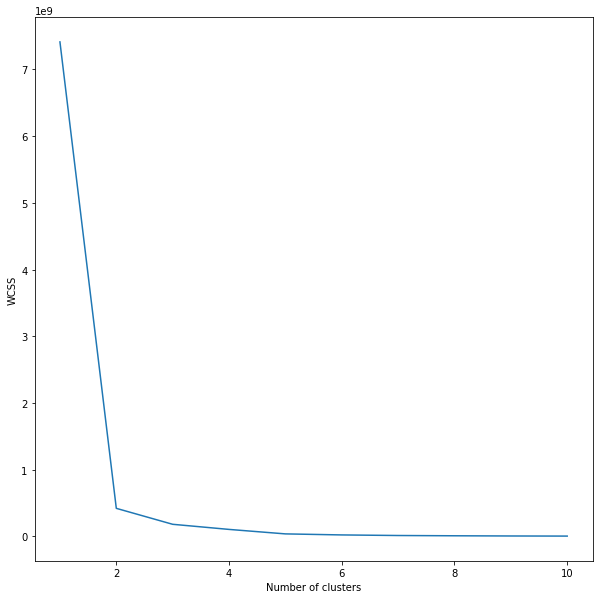

In [ ]:
x = db_cluster.iloc[:,1:]

min_max_scaler = MinMaxScaler()

x = min_max_scaler.fit_transform(df[["A", "B"]])

wcss = []
for i in range(1,11):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(x)
   wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
model = KMeans(n_clusters = 5, init = "k-means++")
label = model.fit_predict(x)
db_cluster['cluster']= model.labels_

In [ ]:
# Initialise the Scaler
scaler = StandardScaler()
# To scale data
x = scaler.fit(x)

In [ ]:
x

,NRESID,NFAMIGL,NMASCHI,NFEMM,NSTRAN,AN_0_14,AN_15_64,OLT_65_A,205,207,214,217,99,Abbigliamento,Alimentari,Alimentari annessi ad altra attivita,Articoli per animali,Articoli pr la casa,Articoli sanitari e ortopedici,Audiovisivi,Bibite,Bigiotteria,Calzature,Cartolerie,Casalinghi - Igiene casa e persona,Elettrodomestici e/o ricambi,Elettronica,Enoteca,Extralimentari,Farmacia,Ferramenta,Fiori e piante,Frutta e verdura,Gastronomia,Gelateria,Giocattoli,Librerie,Macelleria,Minimercato,Mista,Mobili,Nessuna,Non alimentari annessi ad altre attivita,Non alimentari generici,Oggetti preziosi,Opere d'arte,Ottica,Panetteria,Panificio,Pasticceria,Pescheria,Phone center,Pizza al taglio,Profumeria,Quotidiani e periodici,Ricambi auto e accessori,Sexy shop,Tabacchi,Telefonia,Tessuti,Vendita al dettaglio di cose antiche ed usate,outliers,mult
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000
1,1722.749482,943.321701,842.856280,879.893201,307.312248,226.309438,1129.103315,367.336728,0.068349,0.069344,0.162000,0.103904,0.278774,3.923753,4.256010,0.447188,0.277355,0.160823,0.342130,0.501990,2.298414,0.095600,0.178676,0.553973,0.356946,0.590708,0.696246,0.319191,17.972755,0.513652,0.184721,0.639838,0.224765,2.531362,0.375561,0.080042,0.308507,0.380836,0.080231,2.908002,1.031811,19.231161,0.988841,0.990866,0.477842,0.055970,0.261657,0.278495,0.991394,1.355068,0.143781,1.159137,0.831217,1.428725,0.544256,0.206012,0.274819,0.375807,1.670160,0.232095,1.216905,32,7.324139
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30,0.000000
3,689.191589,373.555532,331.614363,357.577227,105.268086,91.129375,444.506474,153.555740,0.000000,0.000000,0.088324,0.017602,0.105357,1.415306,1.043619,0.074641,0.094846,0.016636,0.233315,0.102627,0.680299,0.000000,0.077592,0.236874,0.067892,0.401966,0.135382,0.139705,6.385120,0.217472,0.034497,0.281457,0.065184,0.883629,0.130196,0.006515,0.097431,0.078462,0.004749,0.971523,0.403639,6.521598,0.360768,0.323660,0.208552,0.000000,0.124246,0.065675,0.363076,0.532687,0.044709,0.291730,0.365440,0.507552,0.249300,0.043788,0.106135,0.083863,0.632181,0.093870,0.463091,40,3.919104
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [ ]:
db_cluster_plot = db_cluster[['NRESID' , 'NFAMIGL', 'AN_15_64' , 'OLT_65_A' ,'mult' , 'cluster']]
db_cluster_plot = db_cluster_plot.melt(id_vars=["cluster"], 
        var_name="Feature", 
        value_name="Value")

db_cluster_plot_1 = db_cluster_plot[db_cluster_plot['cluster'] == 0].groupby('Feature').mean().reset_index()
db_cluster_plot_2 = db_cluster_plot[db_cluster_plot['cluster'] == 1].groupby('Feature').mean().reset_index()
db_cluster_plot_3 = db_cluster_plot[db_cluster_plot['cluster'] == 2].groupby('Feature').mean().reset_index()
db_cluster_plot_4 = db_cluster_plot[db_cluster_plot['cluster'] == 3].groupby('Feature').mean().reset_index()
db_cluster_plot_5 = db_cluster_plot[db_cluster_plot['cluster'] == 4].groupby('Feature').mean().reset_index()


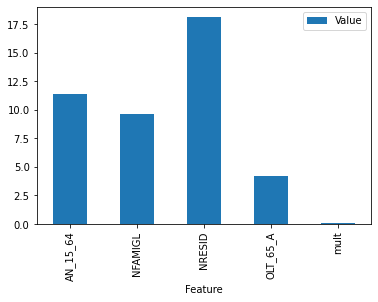

In [ ]:
db_cluster_plot_1.plot(kind='bar',x='Feature',y='Value')

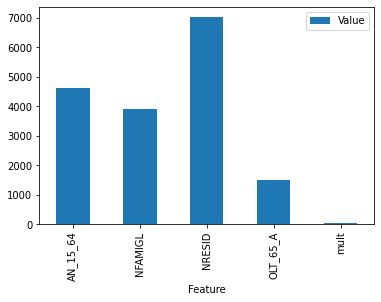

In [ ]:
db_cluster_plot_2.plot(kind='bar',x='Feature',y='Value')

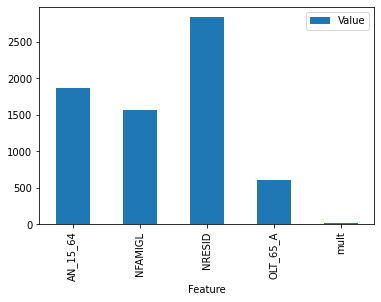

In [ ]:
db_cluster_plot_3.plot(kind='bar',x='Feature',y='Value')

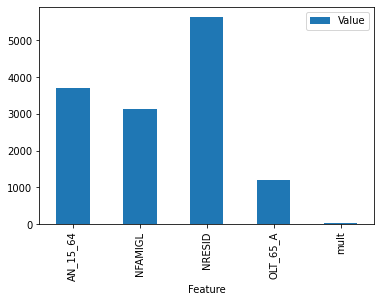

In [ ]:
db_cluster_plot_4.plot(kind='bar',x='Feature',y='Value')

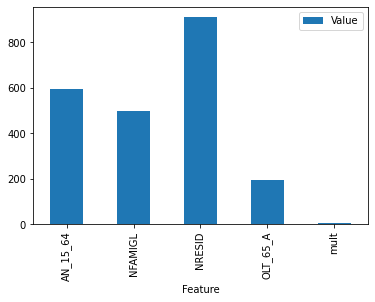

In [ ]:
db_cluster_plot_5.plot(kind='bar',x='Feature',y='Value')

## **Third Objective**
Suggesting a framework of how these models can be integrated into the city’s decision making process and allocation of resources

The third objective is to implement the first and second objectives into a framework that can be used by the city to make deccisions and take actions where needed. Given the good results of the first two parts, the idea of the framework is feasible. On one hand, we have built a model that is able to predict find outliers if our data and then another one that uses this information as target to classify observations as outliers/no-outliers. This model can be used in real time to predict in short term zones where there are going to be high noise levels (always compared to a baseline value). Around this outcome we have built the second part, where said output and the other variables are used to find patterns in the complaints. These patterns can be used to identify critical zones, i.e. demographic profiles where it is more likely that complaints will be filed. A great advantage of this pipeline is that all the data used public, which makes integrating it into a framework feasible. This is because the variables that make the dataset are easily accesible, so the dataset can keep growing with time to include more recent information and enlarge the data used in the model, which in turn could improve model performance. For this reason the model will never become obselete and will keep learning new patterns if there is any change, like COVID. 

Faced with all this, the models can be used together by the city to enable to allocate in the best way possible resources. Moreover, given the time it takes to make inference with out already built models, said models can be integrated into an average computer: the models don't requrie gpu, the inference does't take long nor does it need a lot of power to run... Furthermore, if the dataset (the variables used) keeps growing by adding more informations, the preprocessing done also takes little time.

Fir this reasons, both models can be integrated into a computer with average technical characteristics. Also, one advantage is that Random Forest is not a black box algorithm, that is to say that it is fairly explainable and even can be plotted in order to better visualiza what the model does.

With this, the models can be used one after the other. One could be run in real time to predict in short term when outliers are going to take place. More outliers mean that the state needs to deploy more resources in order to monitor and control the situation (for example, police forces to control situations as there are laws about the number of decibels that take place at night). Also, using the patterns extracted with the help of the second model, demographic profiles where it is more likely that complaints will be filed can be found. In turn, this enables the state using the framework to prioritize those profiles, which is more than likley that these profiles are always almost the same. 


## **Conclusions**
From the preprocessing we have gathered some important insights. First, we have put together a dataset with all the variables that we have found to be important and we have managed to discard some that are not important for the models. Regarding the SIM dataset, we have found that it was not important fot the models, which we found to be an advantage since 80% of the data (comparing to the data available for other variables) was missing and it was complicated to find a way to impute, even though the patterns between years were suppossed to be repetitive between years. Later, with Lasso regularization, we have effectively reduced the number of variables to include in the models. By testing a model with this subset and with all variables we have proven that the subset found with Lasso is optimal since model performance is the same for both cases. Regarding preprocessing we have taken special care into finding a way to take into account distance to the sensors because it is related to noise. For this, we have scaled the variables that have a relation with distance, for example the businesses of the area. It is not the same if a bar in the area is 100 m from the sensor or if there is a bar next to it.

To sum up, we have found and tested a robust pipeline /course of action for this particular case study. Furthermore, we have found a model that is able to predict peaks of high noise levels compared to a value taken as baseline, thus the first objective has been fulfilled. We have tested several models that did not perform as well as intially expected, ruling out these solutions in favor of continuing testing the rest of the ideas, until arriving to the best model. The model chosen is an Isolation Forest followed by a Random Forest. The first one finds observations that are considered to be outliers, then all the observations are labelled as outlier/no-outlier. With this information we run a Random Forest for classification, where the target is to find if an observation is classified as an outlier or not. Not only is the model fast to train and even faster to make inference with but the R^2 is 0.82. This means that the proportion of the variance of the Noise that is explained with our variables is of 82%, which is a very high number. Also, this is an exceptionally good  result given the fact that the dataset is imbalanced for our target variable, that is to say that we are predicting outliers which, by definition are atypical values (not common and thus further from the mean). Another advantage is the fact the variables used in this model come mainly from public information that is easily accesible like, for example, the census or the weather information. Other variables that we have found to be important that were not given, like days when football matches took place or national holidays, are also easily accesible. This makes this solution scalable, which is explained in the next section.

Furthermore, the fact that we have found a robust pipeline for outlier detection is and advantage that was used to fulfill the second objective of this challenge. In particular, the varibale outlier/non-outlier (along with the rest of the variables used in this first model) was used to find patterns in the information about noise complaints. This was done by clustering.

### **Scalability and Impact**
Finally, solving the first two objectives allowed us to fulfill the third one: suggest a framework for integrating our models into the decision making of the city. As explained before, assuming that we acquire all the variables that were used in the models, the solution can be integrated for more neighbourhoods, cities... An important advantage of the presented solutions is the fact that the variables used are easily acquired and are of public domain: census is mandatory in every city,businesses around the area, holidays are set in advanced usually the year before... A priori there seeems to be no reason for not being able to acquiere the necessary information, even weather information can be acquired with at least a week in advance. This allows for the integration of the models in cities, not only in Torino. The models could be used in real time, to predict in short terms the outliers, i.e. times when noise levels will be out of the ordinary, thus allowing the city to better allocate resources (police to control concentrations of people, to help meet noise requirements by law...). 




### **Future Work**
Now picture the following scenario: imagine you could have access to any type of data that could help you solve this challenge even better. What would that data be and how would it improve your solution? 🚀


The models we have built for this case are good, efficient and fast. However, as always, there is no perfect solution as there is room for improvement. Given more time to develop the solution we could search more in depth for other datasets in order to use them as variables. With this we could test model performance to keek improving the proposed solution.

Another thing that could be done to improve the model, and it would be a good idea in any case, is to improve the quaility of the variables that we already have and that are used in (and are important to) the model. We have found missing values is some of the data and althoug we have handled this exceptions it would be goog to improve them. For example, there are some missing values in the wether so we could extract the information from another source to analyse if it is more complete.